<a href="https://colab.research.google.com/github/SimplyDifficult/ML-for-Wireless/blob/main/10.%20UCB_20_dim_user_case_BOGP_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
P_max = 30 #in dBm

In [2]:
var = 20
number_of_cells = 4

In [3]:
!sudo add-apt-repository ppa:octave/stable
!sudo apt update
!sudo apt install octave

 The latest version of GNU Octave built for all supported Ubuntu releases. GNU Octave is normally distributed with Ubuntu, this PPA is for you if you have a need to use a newer version of Octave than what you can already get from your installed version of Ubuntu.

Simply follow the instructions below to add this PPA to your system and install the octave package. If it's not that easy or you encounter any errors, contact the team and let us know.

Much credit goes to the Debian Octave Group who maintain the official Debian packages that this work is derived from. Without their efforts to bring Octave packaging to such a high level of quality in Debian and Debian derivatives, this PPA would not be here.
 More info: https://launchpad.net/~octave/+archive/ubuntu/stable
Press [ENTER] to continue or Ctrl-c to cancel adding it.

Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubu

In [4]:
!wget https://www.dropbox.com/s/llve9s3hfamwyni/function_uncorrelated_rayleigh_fading_channel_model.m
!wget https://www.dropbox.com/s/d1ytzzfpxsrpbcv/main_bitchanged.m -O /content/main.m
!wget https://www.dropbox.com/s/v3y2xe56qodthnm/function_SE.m
!wget https://www.dropbox.com/s/5p0j4qdqist7ibm/main_individual_transmit_case_for_Test_phase_bitchanged.m -O /content/main_individual_transmit_case_for_Test_phase.m

--2021-09-24 06:10:58--  https://www.dropbox.com/s/llve9s3hfamwyni/function_uncorrelated_rayleigh_fading_channel_model.m
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/llve9s3hfamwyni/function_uncorrelated_rayleigh_fading_channel_model.m [following]
--2021-09-24 06:10:58--  https://www.dropbox.com/s/raw/llve9s3hfamwyni/function_uncorrelated_rayleigh_fading_channel_model.m
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca47a43a742e62ffcff83cedc5e.dl.dropboxusercontent.com/cd/0/inline/BWwJJf4c_RuE37JTBWWCzeIXHMzTNfkYBcvUvPXXC1qkNHGHm1iFcIUPL6fPj46y4Wch2FNgAINmwrB1FrjrTb8zOUzRNJvq2XBIt8HkWJdN3mTvBf6z_6n8yFrX0q8CKeQFWfZQA3V9QVYKGVBSQBMe/file# [following]
--2021-09-24 06:10:59--  https://uca47a43a742e62ffcff83cedc5e.dl

In [5]:
!wget https://www.dropbox.com/s/utf73kdk09gjvsu/RR.mat
!wget https://www.dropbox.com/s/52gyqiq137mo2bb/SE.mat

--2021-09-24 06:11:03--  https://www.dropbox.com/s/utf73kdk09gjvsu/RR.mat
Resolving www.dropbox.com (www.dropbox.com)... 162.125.67.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.67.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/utf73kdk09gjvsu/RR.mat [following]
--2021-09-24 06:11:04--  https://www.dropbox.com/s/raw/utf73kdk09gjvsu/RR.mat
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc00f15b2076dbd0a922ab1cef5a.dl.dropboxusercontent.com/cd/0/inline/BWwDQ2lB7qja4AU4nXVM9hJEhM5HpUl2NYv_OSlFlGmfOy4S8F2pC2-OHleCA-ROHt-BkBlhsYWPFFv3d16_Uaq7d7wr4LKolF44d0FILlonHr7hkVG_5KItpkiXQU1Jc1ls6ZGsCK-6vZ7f4CDNpgwL/file# [following]
--2021-09-24 06:11:04--  https://uc00f15b2076dbd0a922ab1cef5a.dl.dropboxusercontent.com/cd/0/inline/BWwDQ2lB7qja4AU4nXVM9hJEhM5HpUl2NYv_OSlFlGmfOy4S8F2pC2-OHleCA-ROHt-BkBlhsYWPFFv3d16_Uaq7d7wr4LKolF44d0FIL

In [6]:
from numpy import arange
from numpy import vstack
from numpy import argmax
from numpy import asarray
from numpy.random import normal
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from warnings import catch_warnings
from warnings import simplefilter
from matplotlib import pyplot
from scipy.optimize import minimize
import numpy as np
from scipy.io import loadmat, savemat
import numpy as np
from google.colab import files
import cv2
from scipy.optimize import dual_annealing

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
#### Objective function
import random
def objective(tr_array):
  tr_in_mW = np.power(10,tr_array/10.0)
  savemat("transmit.mat", {"transmit":(tr_in_mW)})
  !octave -W main.m
  SE = loadmat('SE.mat')
  return np.sum(SE["SE"])

In [9]:
#surrogate or approximation for the objective function
def surrogate(model, X):
	#catch any warning generated when making a prediction
	with catch_warnings():
		#ignore generated warnings
		simplefilter("ignore")
		return model.predict(X, return_std=True)

In [10]:
def UCBobjective(Xsamples, X, model, beta):
  Xsamples = Xsamples[np.newaxis,:]
  mu, std = surrogate(model, Xsamples)
  mu = mu[:, 0]
  sigma = beta
  probs = mu + sigma * std
  return -probs[0]

In [11]:
#optimize the acquisition function
def opt_acquisition(X, y, model, iteration):
  #Do it 5 times
  r_min, r_max = -31.0, P_max  
  bounds = []
  for ti in range(var):
    bounds = bounds + [[r_min, r_max]]
  min_result = 9999999999999.0
  min_answer = 0
  if iteration<180:
   beta = 5*np.exp(((-1)*(10+np.log(5))*iteration)/(180*0.43))
  else:
   beta = 0.0000000001
  
  for i in range(2):
    result = dual_annealing(UCBobjective, bounds, args=(X,model,beta))
    if(result.fun<min_result):
      min_result = result.fun
      min_answer = result['x']    
  return min_answer

In [12]:
import random
def objective_FPA(tr_array):
  tr_in_mW = np.power(10,tr_array/10.0)
  savemat("transmit.mat", {"transmit":(tr_in_mW)})
  !octave -W /content/main_individual_transmit_case_for_Test_phase.m
  SE = loadmat('SE.mat')
  return np.sum(SE["SE"])

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
X = np.load("/content/drive/MyDrive/trainingx_BOGP_5.npy")
y = np.load("/content/drive/MyDrive/trainingy_BOGP_5.npy")
y_FPA = np.load("/content/drive/MyDrive/grad_trainingyFPA_BOGP_5.npy")

FileNotFoundError: ignored

x_next is [-14.93496857  12.7187585  -30.98521294  -9.01516094  19.67648362
 -22.1491388  -23.69741846  19.0800978  -27.11605702 -16.48750129
  17.00851904 -14.40581053  16.85309178  23.75043978  17.64507747
 -16.23497231  16.78083015 -17.51143909 -27.968148   -27.436258  ]
f()=0.000239, actual=27.368
0


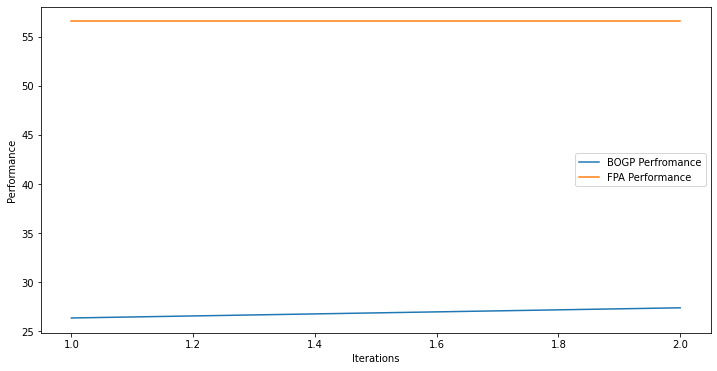

x_next is [ 29.99929024 -30.99517482  29.99378613  29.9948895  -30.99594151
  29.99624471  29.99279258 -30.99730535  29.99073949  29.99558293
 -30.99850807  29.9970139  -30.96543888 -30.99362259 -30.99985192
  29.98833373 -30.99631713  29.99209587  29.96509454  29.9958943 ]
f()=26.839773, actual=43.446
1


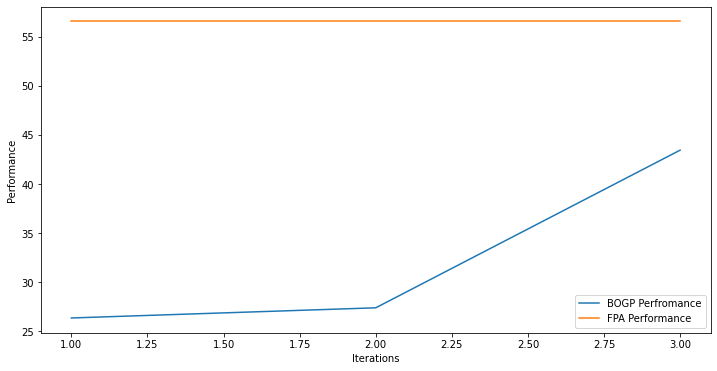

x_next is [-31. -31.  30. -31. -31. -31.  30. -31.  30.  30. -31. -31. -31. -31.
 -31.  30. -31. -31.  30.  30.]
f()=34.159130, actual=28.818
2


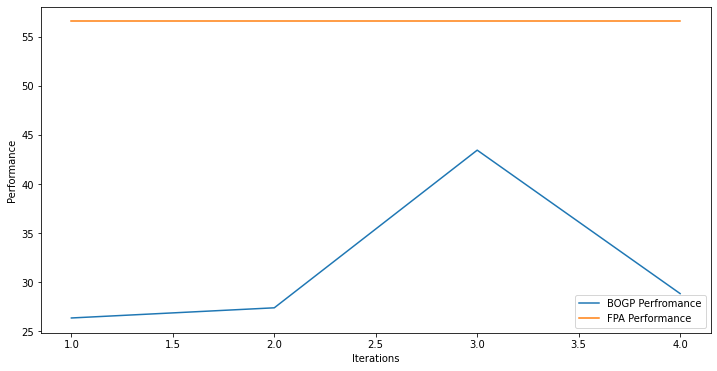

x_next is [ 30.  30.  30.  30. -31.  30.  30. -31.  30. -31. -31.  30. -31. -31.
 -31. -31. -31.  30.  30.  30.]
f()=34.249122, actual=39.883
3


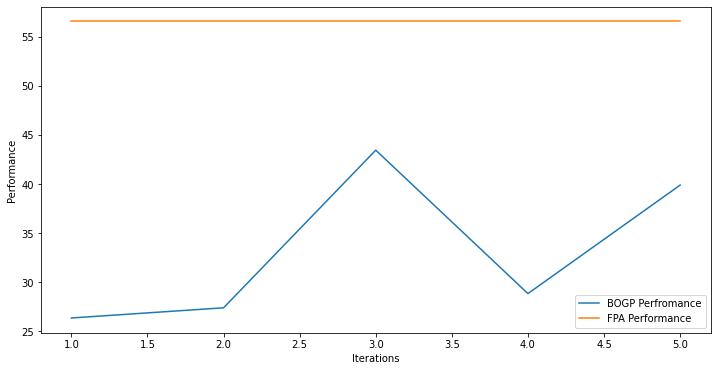

x_next is [-23.05425933  17.54560359  -1.88940366 -27.65162743 -10.43463427
 -23.24854575  16.39490638 -11.71219217  -0.4778116  -17.3329028
   3.68860808  -3.18203284  -7.33409899 -16.34764899  -3.43516852
  17.5077539   12.45049144  -9.65196009  24.93062223  11.12556628]
f()=32.792535, actual=20.512
4


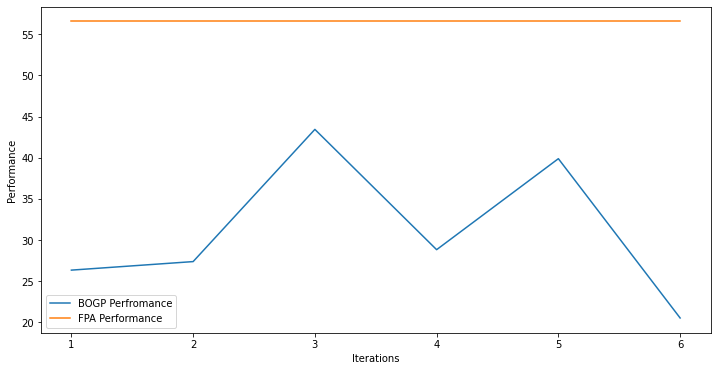

x_next is [ 29.91413712 -30.96994416  29.93856228  29.99844604 -30.99511633
  29.98902393  29.9604122  -30.94205125  29.94348474  29.91938446
 -30.98292825  29.97669165 -30.90684848 -30.96814898 -30.94048388
 -30.97440775 -30.98806583  29.99139644  29.92198828  29.96571626]
f()=30.648245, actual=39.862
5


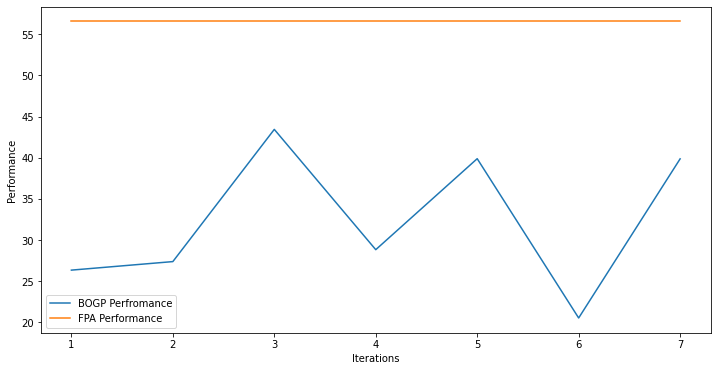

x_next is [ 30. -31.  30.  30. -31.  30. -31. -31.  30.  30. -31.  30. -31.  30.
 -31.  30. -31.  30. -31. -31.]
f()=39.962922, actual=34.985
6


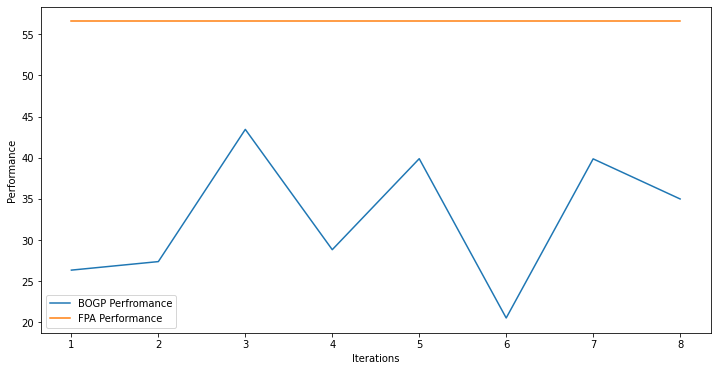

x_next is [ 29.9723569  -30.97967605  29.99181885  29.98597294 -30.99807893
  29.99614569  29.92841714 -30.92520493  29.99377381  29.9437386
 -30.97068006  29.98960237 -30.93868721 -30.97531985 -30.99991384
 -30.9401916  -30.99427063  29.99808995  29.99838978  29.98001374]
f()=32.401295, actual=39.839
7


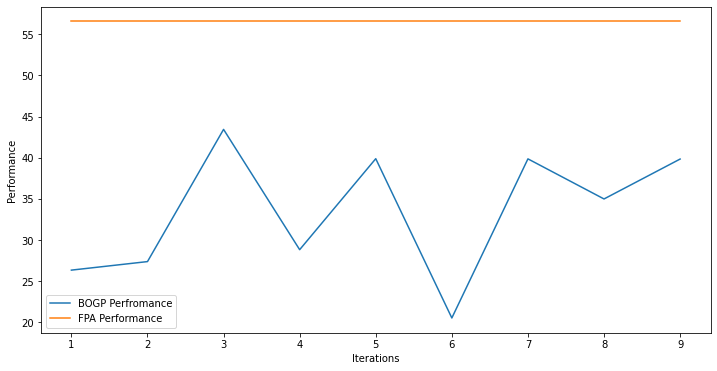

x_next is [ 29.99999996 -30.99999991 -30.99991845  29.99999991 -30.99999986
  29.99999996  29.99999995 -30.99997628 -30.99929192 -30.99996107
 -30.99999989  29.99999991 -30.99999989 -30.99994695 -30.99999984
  29.9998541  -30.99999985  29.99999995 -30.99999987  29.99999982]
f()=39.858590, actual=37.119
8


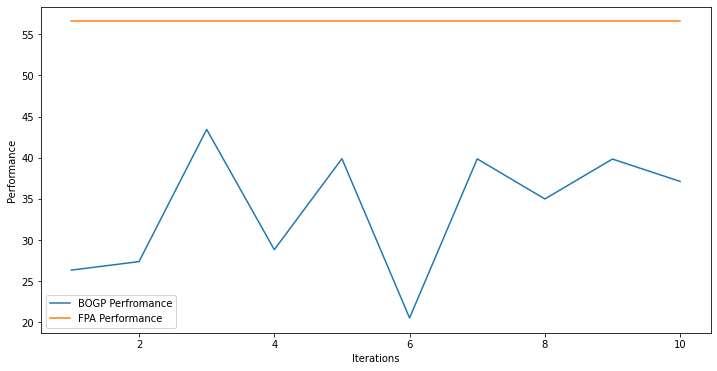

x_next is [ 29.99999751  29.99984651  29.99999987  29.9999999  -30.99952158
  29.99999997  29.99976155 -30.99992995  29.99996289  29.99958975
 -30.99999922  29.99977307 -30.99995324 -30.99991817 -30.99999951
  29.9999948  -30.99999938  29.99999992 -30.99987305  29.9999511 ]
f()=40.986177, actual=41.928
9


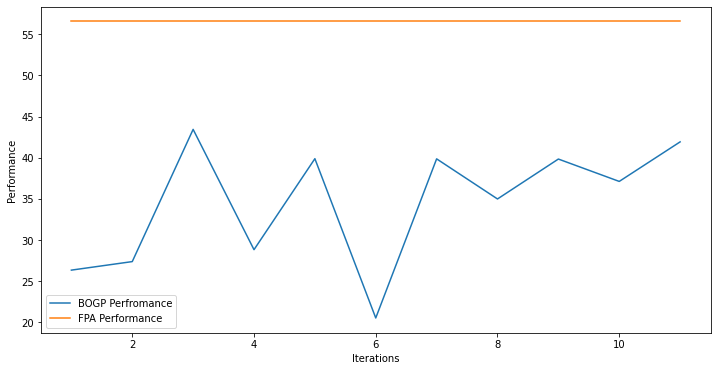

x_next is [ 30.  30.  30.  30.  30.  30.  30.  30.  30.  30. -31.  30. -31. -31.
 -31.  30. -31.  30.  30.  30.]
f()=41.649318, actual=49.395
10


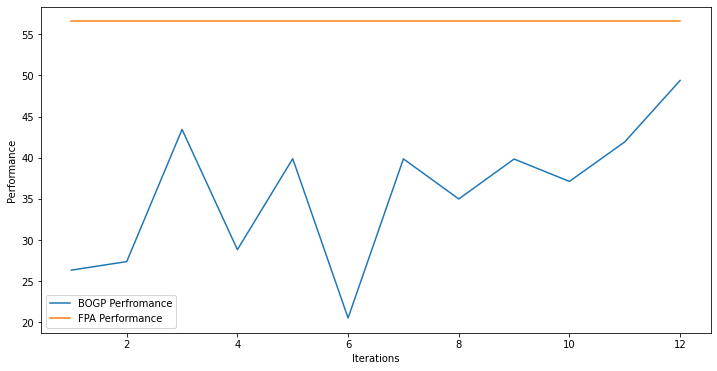

x_next is [ 29.99999994  29.99992259 -30.99988076  29.99999995  29.99999992
  29.99999991  29.99993524  29.99999992  29.99998302  29.99990236
 -30.99997044  29.99999989 -30.99999959 -30.99981752 -30.99998399
  29.99999992 -30.99973313  29.9999999   29.99980941  29.99999998]
f()=47.496102, actual=49.097
11


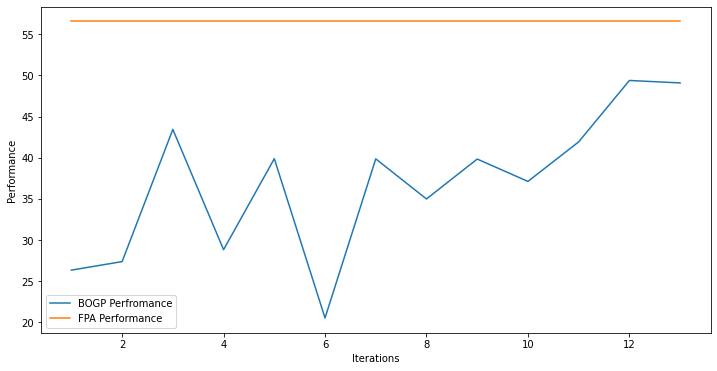

x_next is [ 30.          30.          13.77616745  30.          30.
  30.          30.          30.          30.          30.
 -31.          30.          30.         -31.         -31.
  30.         -31.          30.          30.          30.        ]
f()=46.944229, actual=52.357
12


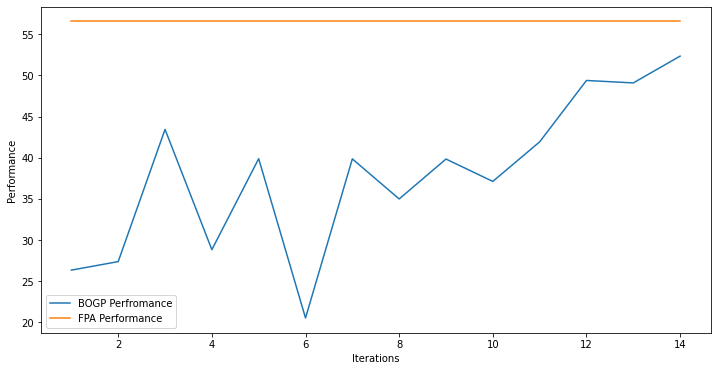

x_next is [ 29.99992333  29.99999948 -30.9999481   29.99999976  29.99999972
  29.99997767  29.99999944  29.99980525  29.99999978  29.99999887
 -30.99998928  29.99999914  29.99999945 -30.99983438 -30.99999831
  29.99999907 -30.99975846  29.99999949  29.99982898  29.99999949]
f()=51.930190, actual=52.349
13


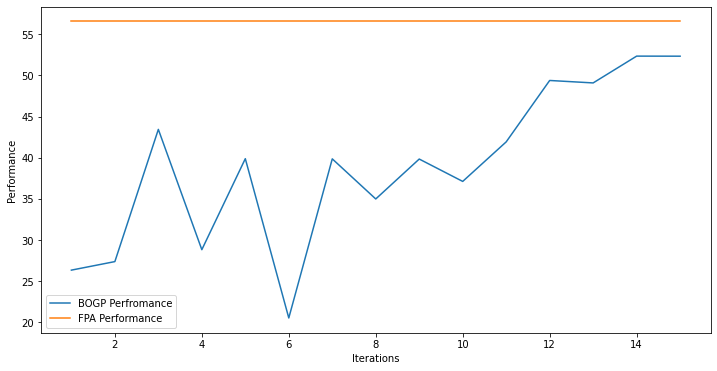

x_next is [ 29.99986343  29.99999834  -8.47205847  29.99999825  29.99967826
  29.99999848  29.99999916  29.99999725  29.99999835  29.9999987
 -30.99973173  29.99999835  29.99996816 -30.99989091 -30.99979604
  29.99999807 -30.99990232  29.99943739  29.99987978  29.99999785]
f()=52.420615, actual=52.349
14


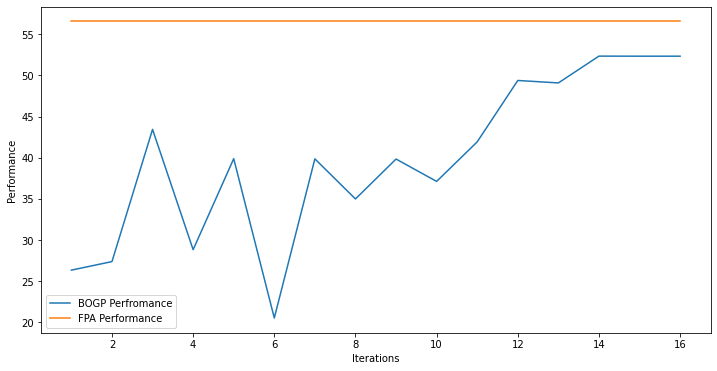

x_next is [ 29.9999952   29.99957621  29.99999734  29.99999792  29.99984751
  29.99984229  29.99999777  29.9999966   29.99999458  29.99999732
 -30.99996875  29.99999871  29.99999733 -30.99992055 -30.99980013
  29.99996954 -30.99989081  29.9999975   29.99956031  29.99986402]
f()=52.306796, actual=52.646
15


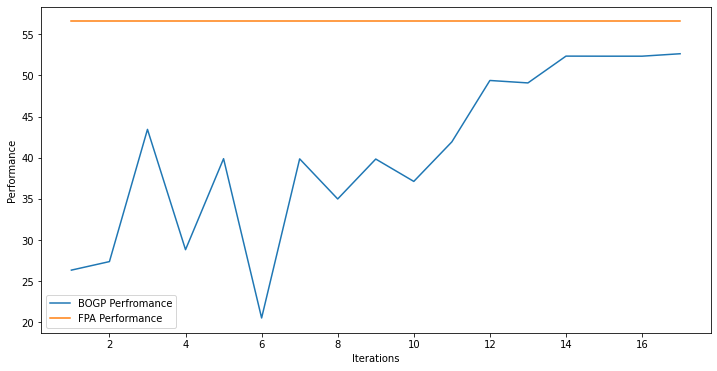

x_next is [ 29.99994442  29.99999379  29.99977861  29.99992644  29.99999637
  29.9999957   29.99999407  29.99999344  29.99996639  29.99986398
 -30.99957299  29.99984485  29.99997247 -30.99981538 -30.99974327
  29.9999831  -30.99959034  29.99999818  29.9999904   29.99999518]
f()=52.644943, actual=52.646
16


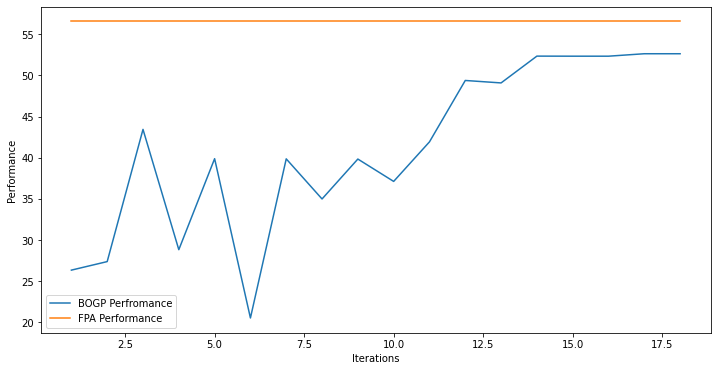

x_next is [ 29.99999659  29.99962253  29.99998894  29.99999567  29.99999773
  29.99991559  29.99998557  29.99998678  29.99997639  29.9997383
 -30.99999912  29.9999257   29.99981267 -30.99940668 -30.99997435
  29.99997779 -30.99985853  29.99994185  29.99978414  29.99988058]
f()=52.646086, actual=52.646
17


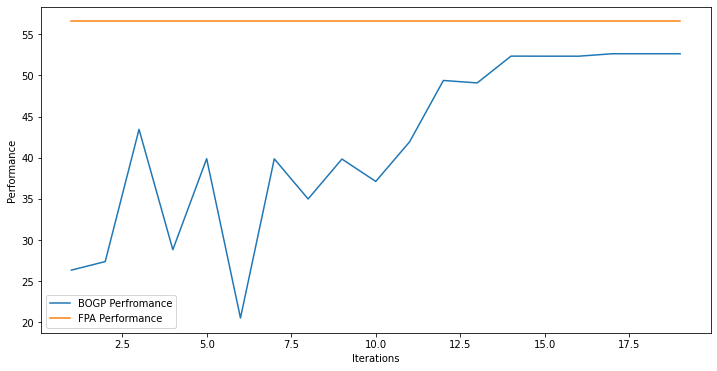

x_next is [ -6.36278954  29.99940043  29.99472755  29.99856991  29.99773809
  29.99849593  29.99965493  29.99805215  29.99612777  29.99580296
 -30.99942962  29.99996476  29.99790994 -30.97231074  29.93974872
  29.99686054 -30.99927712  29.99947786  29.99668841  29.99901511]
f()=52.674219, actual=50.329
18


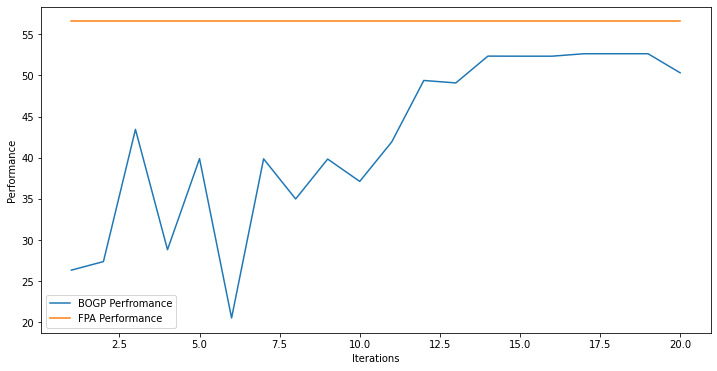

x_next is [ 15.63922211  29.99587806  29.97815388  29.99811529  29.99531979
  29.99505222  29.99944293  29.9988952   29.99481597  29.99908731
 -30.99824528  29.99054117  29.99752192 -12.3991333  -30.99544447
  29.9962849  -30.99795222  29.99860282  29.99961596  29.99962564]
f()=52.471640, actual=51.327
19


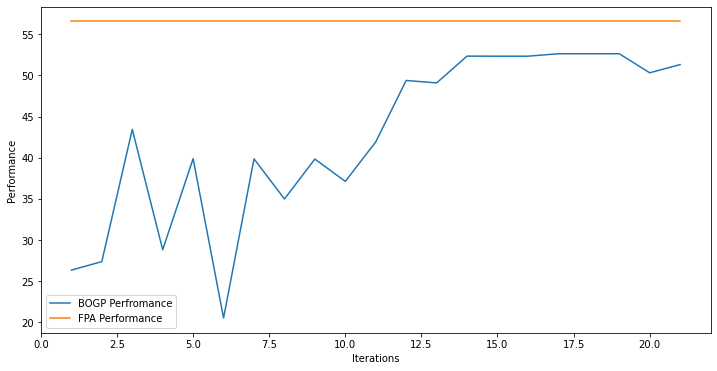

x_next is [ 29.99557394  29.98824554  29.96657855  29.99567765  29.99653871
  29.99246594  29.99398737  29.98905232  29.97771505  29.99782504
 -30.99396337  29.97564817  29.99735846 -30.99416986 -14.08621119
  29.99483594 -30.99145054  29.99687962  29.99725435  29.99944587]
f()=52.612862, actual=52.638
20


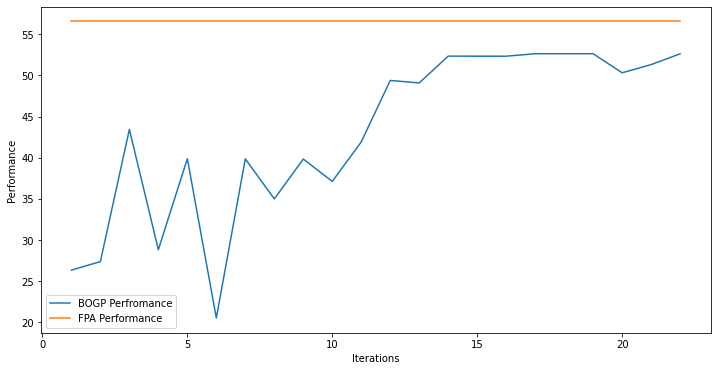

x_next is [ 29.99997686  29.99998986  29.99999372  29.99999029  29.9999951
  29.99998921  29.99950729  29.9999927   29.99999534  29.99999587
 -30.99994941  29.99998757  29.99999436 -30.99993112 -22.73271801
  29.99999445 -30.99998567  29.9999926   29.99999482  29.99972946]
f()=52.651807, actual=52.646
21


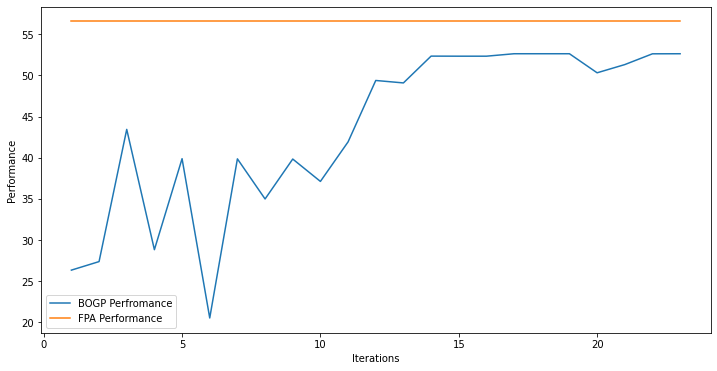

x_next is [ 29.99998625  29.99943127  29.99968767  29.99995932  29.99999282
  29.99992625  29.99997678  29.99999498  29.99971058  29.99986496
 -30.99997967  29.99998808  29.99969744 -30.99988898 -27.06919098
  29.99995095 -30.99997457  29.99995308  29.99969567  29.99999109]
f()=52.646814, actual=52.646
22


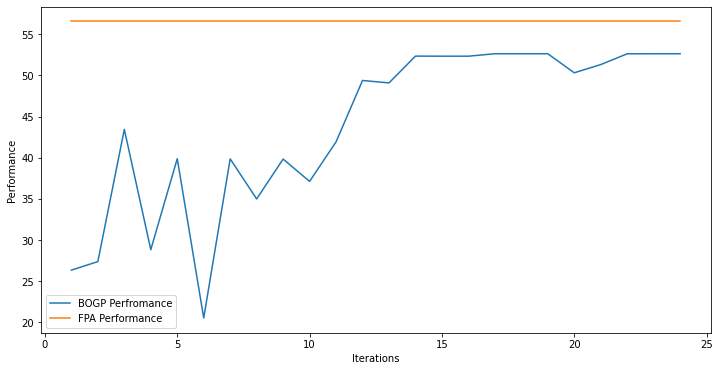

x_next is [ 29.97693287  29.97153163  29.98353738  29.9990071   29.98882207
  29.99185275  29.99751772  29.9575364   24.37615242  29.98048338
 -30.99656525  29.9875563   29.99857939 -30.99197747 -23.18691614
  29.98831405 -30.98754205  29.9837947   29.99979191  29.99313374]
f()=52.597042, actual=52.277
23


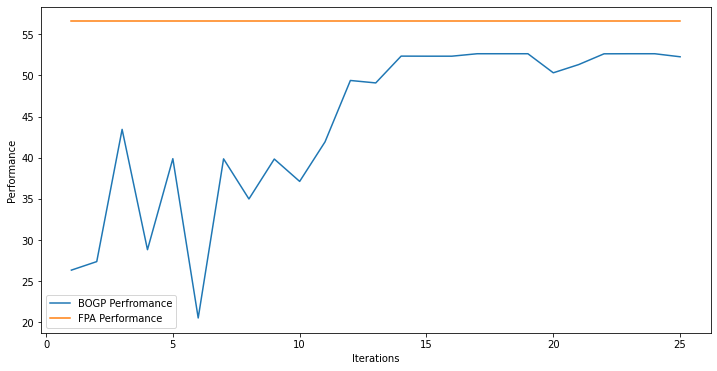

x_next is [ 29.96598468  29.99011061  29.97899504  29.99895664  29.98991615
  29.98774642  29.98443951  29.98336319  29.98687477  29.99311473
 -30.97844592  29.94581259  29.99987238 -30.95566954 -19.15685129
  29.95567088 -30.98329527  29.95042238  29.95404233  29.93782116]
f()=52.632670, actual=52.627
24


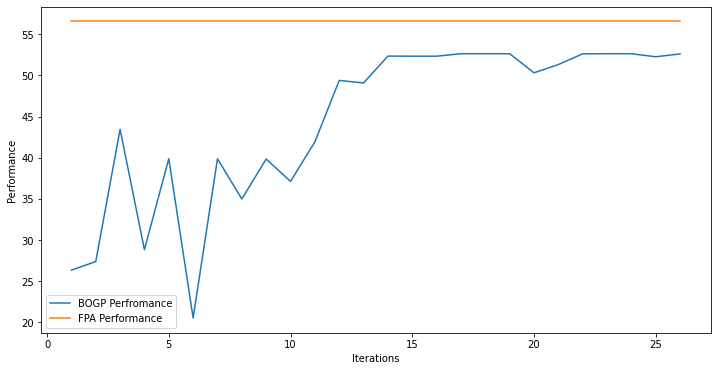

x_next is [ 29.99969265  29.99412822  17.88191957  29.99904842  29.9999749
  29.99973937  29.99795089 -17.81010828  29.99672819  29.89664142
 -30.99899506 -11.0006599   29.99980074 -30.99443614   4.00439269
  29.99972964 -30.9995682   29.99829526  29.99840449  29.99613714]
f()=53.365186, actual=50.266
25


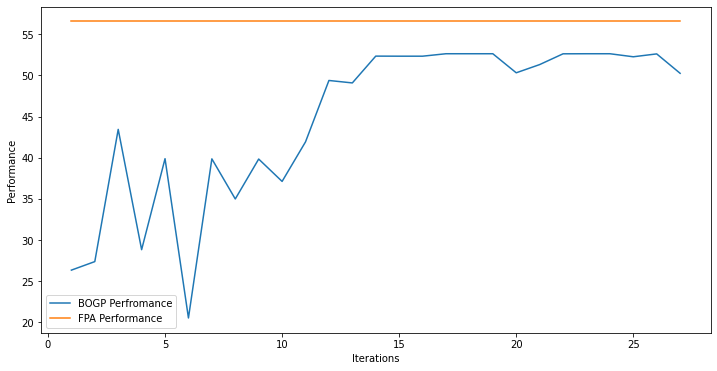

x_next is [ 29.99303628  29.99966258  29.99848601  29.99898597  29.99500633
  29.99880742  29.99564941  29.9987744   29.99814704   3.68737031
 -30.99584332  29.96069675  29.99685152 -28.19045196 -21.93177494
  29.99996382 -30.97945237  29.99616939  29.99690936  29.99616021]
f()=53.080145, actual=52.798
26


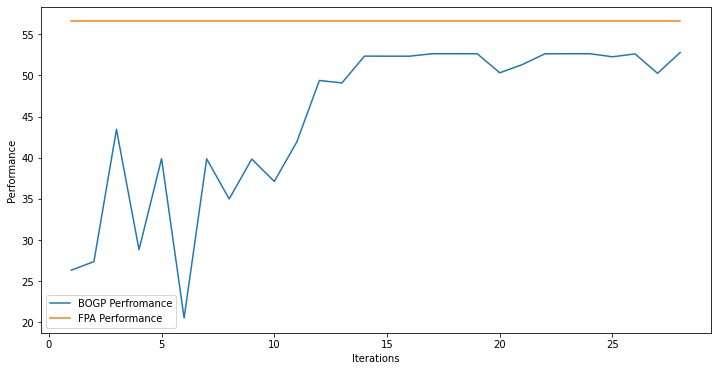

x_next is [ 29.99993337  29.99999996  29.99991773  30.          29.99999999
  29.99999998  30.          29.99999998  29.99999998   4.71328531
 -30.99999992  29.99993712  30.         -30.99990857 -22.59282104
  30.         -30.99999977  29.99999999  29.99999999  29.99997586]
f()=52.904233, actual=52.954
27


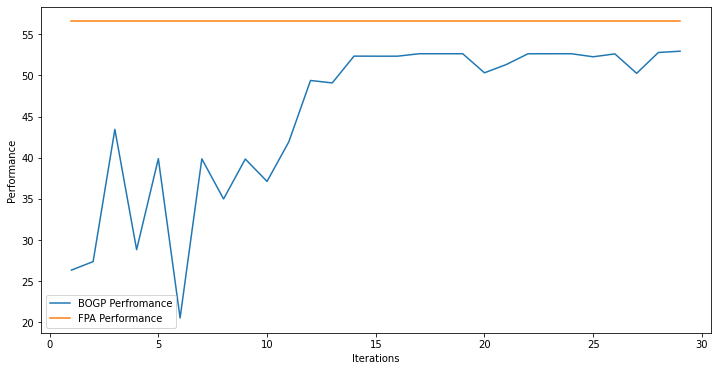

x_next is [ 29.99999699  29.99987499  29.99987568  29.99992212  29.99999674
  29.99999699  29.99985438  29.99992864  29.99999645 -22.37194368
 -30.99999146  29.99979909  29.99999664 -30.99988615 -30.99998812
  29.99995119 -30.99973685  29.99993029  29.99994596  29.99992986]
f()=53.057077, actual=51.984
28


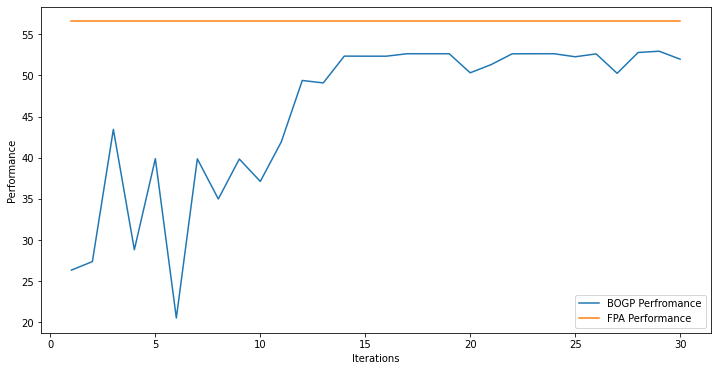

x_next is [ 29.99936581  29.9995355   29.99486883  29.99754237  29.99470858
  29.99048539  29.99663749  29.95121108  29.99534612   9.1398127
 -30.99916061  29.98115199  29.98956394 -30.99721767 -21.40221991
  29.98974149 -30.99955517  29.99413536  29.99857827  29.97510588]
f()=52.970902, actual=53.764
29


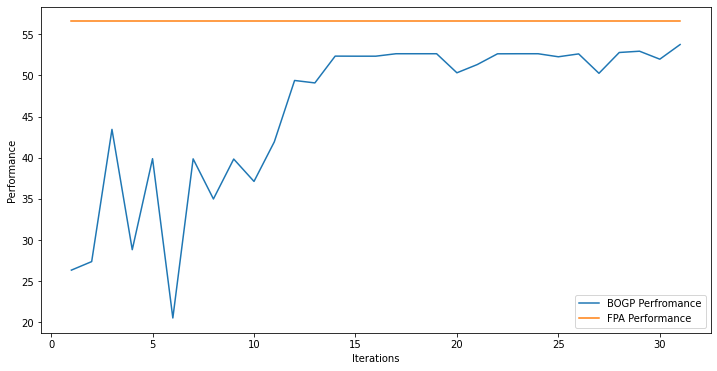

x_next is [ 30.          29.99999998  30.          30.          30.
  30.          30.          30.          30.          10.13561519
 -31.          29.99999999  30.         -31.         -17.64872653
  30.         -31.          30.          30.          30.        ]
f()=53.217139, actual=53.984
30


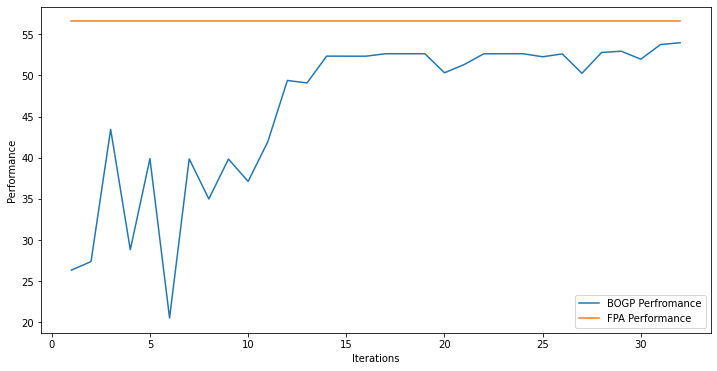

x_next is [ 30.          30.          29.99999998  30.          30.
  30.          30.          30.          30.           7.67845927
 -31.          30.          30.         -31.          -7.04145556
  30.         -31.          30.          30.          30.        ]
f()=53.543975, actual=53.478
31


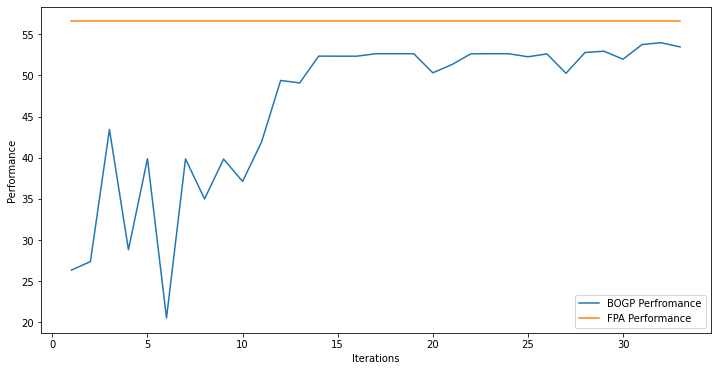

x_next is [ 30.          30.          29.99999999  30.          30.
  30.          30.          30.          30.           8.52876626
 -31.          30.          30.         -31.          -9.61070805
  30.         -31.          30.          30.          30.        ]
f()=53.505145, actual=53.648
32


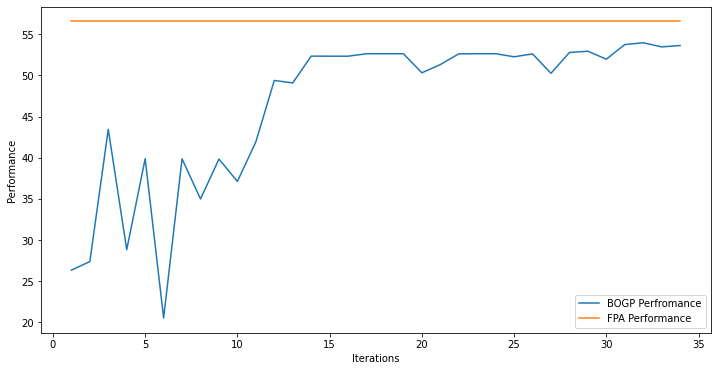

x_next is [ 29.9998252   29.99655383  29.32980962  29.99988646  29.99796846
  29.99818676  29.99932277  27.82598998  29.99881824  14.80957175
 -30.99650601  28.54321967  29.08887123 -30.99662071 -18.26557483
  29.99304325 -30.99555938  29.99772952  29.99894847  29.99549463]
f()=54.247373, actual=54.347
33


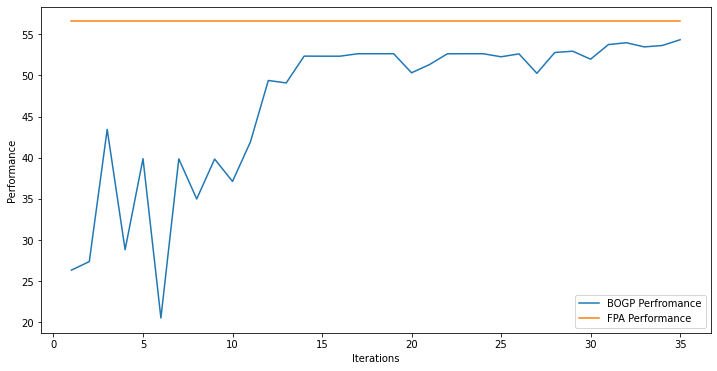

x_next is [ 29.99116096  29.99916313  28.8662751   29.99924477  29.99563878
  29.99918475  29.99895851  25.16774522  29.99952614  15.25066327
 -30.99879942  27.33780125  28.19891967 -30.98949905 -17.9575042
  29.99831842 -30.99529159  29.99967499  29.99600164  29.998866  ]
f()=54.381236, actual=53.815
34


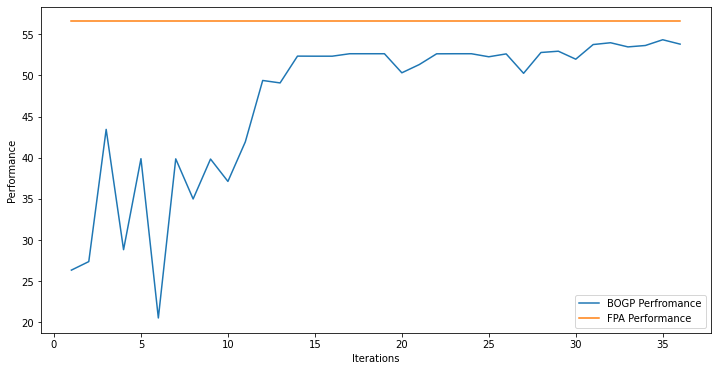

x_next is [ 28.43146231  30.          28.88969619  30.          30.
  30.          30.          23.47784854  30.          13.45021538
 -31.          25.74419641  30.         -31.         -15.9956058
  30.         -31.          30.          30.          30.        ]
f()=53.972313, actual=53.686
35


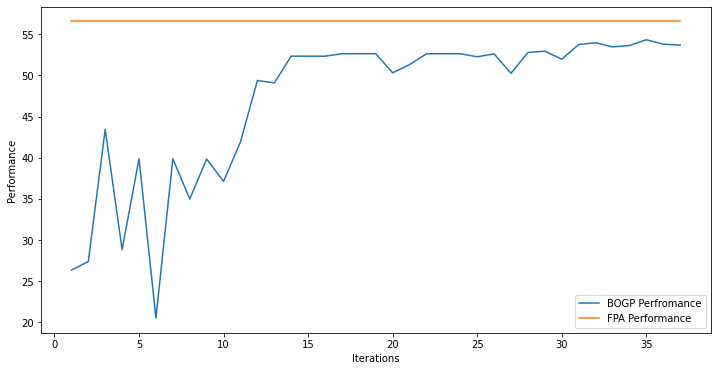

x_next is [ 28.83796731  29.99923416  14.75701936  29.99998794  29.999788
  29.99998039  29.99997638  29.99955869  29.99991443   9.09104747
 -30.99974208 -19.24629061  29.999751   -30.99940975 -18.79975557
  29.99992571 -30.99985374  29.99988139  29.9998261   29.99987628]
f()=56.386836, actual=52.716
36


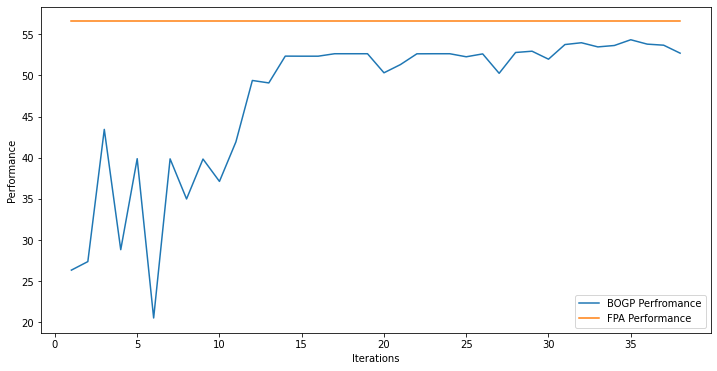

x_next is [ 30.          30.          28.34929127  30.          30.
  30.          30.          26.88518681  30.          12.78863634
 -31.          23.45152573  30.         -31.         -15.37089865
  30.         -31.          30.          30.          30.        ]
f()=53.843726, actual=53.476
37


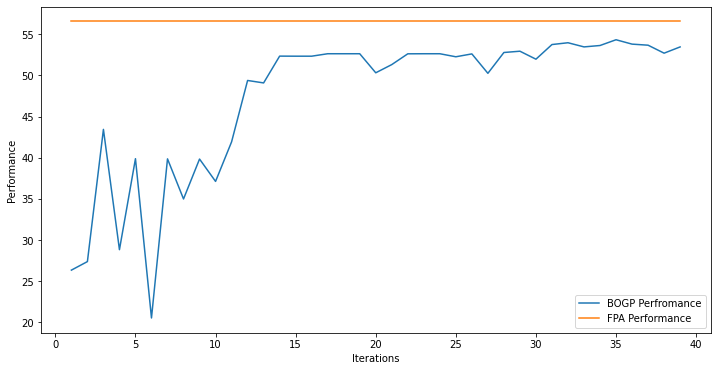

x_next is [ 22.54972285  29.99998099  28.62412856  29.99999212  29.9998834
  29.99990138  29.99999867  29.9997658   29.99985813  16.22176982
 -30.99878881  29.99978739  29.99989193 -30.99971256 -17.65177665
  29.99968525 -30.9993229   29.99979871  29.99997985  29.99955208]
f()=54.952305, actual=55.161
38


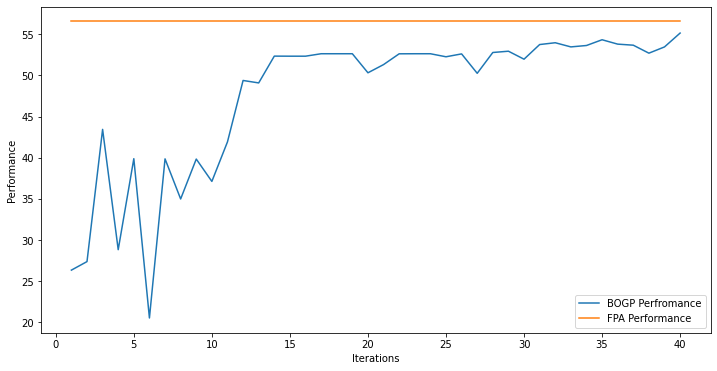

x_next is [ 29.99999971  29.99999985  29.99999804  29.99999991  29.99999978
  29.99999965  29.99999978  29.99999973  29.99999951  29.99996746
 -30.99999198  29.99999968  29.99999976 -30.99999924 -30.99950023
  29.99969446 -30.99999936  29.99999961  29.99998503  29.99999973]
f()=53.267198, actual=52.646
39


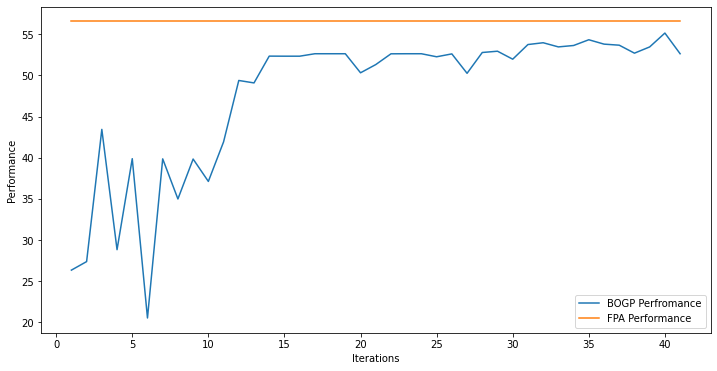

x_next is [ 18.81329264  29.99663051  27.97972151  29.99871942  29.99950522
  29.99958978  29.99992711  29.99900424  29.99973179  15.79676093
 -30.64640407  29.99648438  29.99845242 -30.99933343 -17.43376786
  29.99878776 -28.6286964   29.99785366  29.99978292  29.99751689]
f()=55.221615, actual=54.388
40


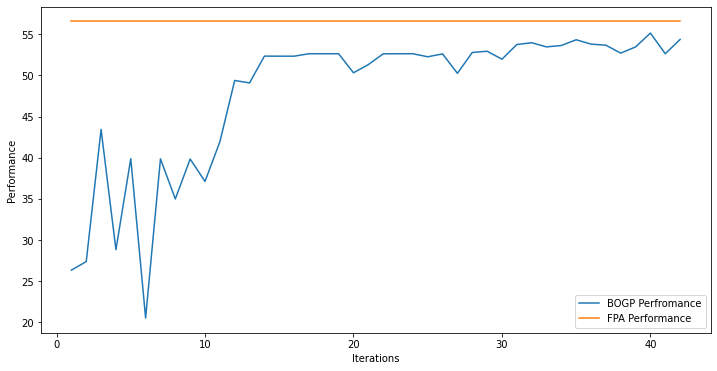

x_next is [ 23.25236022  29.99907945  28.90774826  29.99920063  29.99984222
  29.99981279  29.99974482  29.99826101  29.99870684  16.609068
 -28.5546933   29.99848125  29.99947422 -30.99615826 -18.11102367
  29.99922814 -30.9999922   29.99991367  29.99900807  29.99842743]
f()=55.212533, actual=55.321
41


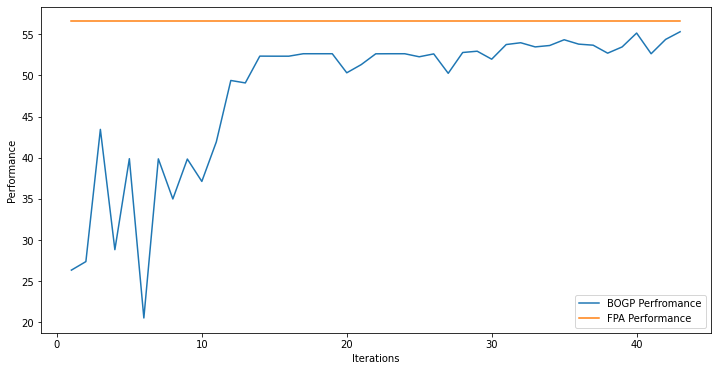

x_next is [ 22.9441628   29.99846337  28.79200774  29.99911117  29.99703874
  29.9997143   29.99901687  29.99417627  29.99700301  16.7535721
 -24.58311524  29.99952037  29.99960512 -30.9943562  -18.42808879
  29.9985508  -30.99987549  29.99433204  29.99779352  29.99898276]
f()=55.389847, actual=55.297
42


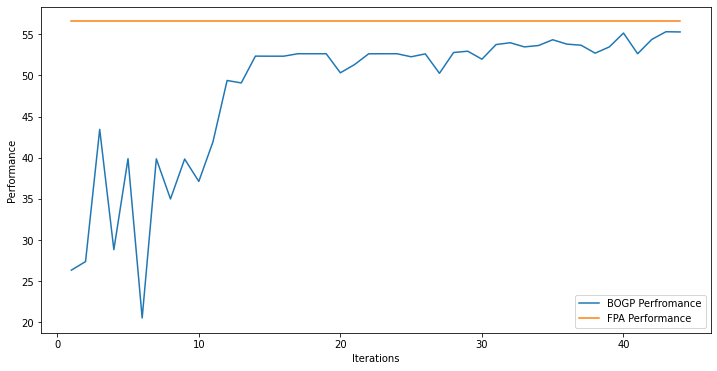

x_next is [ 23.54071626  29.99967736  29.31020443  29.99898374  29.99370417
  29.9972543   29.99701935  29.99350508  29.99934916  16.76069076
 -27.10202611  29.99644854  29.99878997 -30.99820572 -18.3850242
  29.99802981 -30.99882782  29.99637396  29.99986245  29.99699494]
f()=55.342193, actual=55.394
43


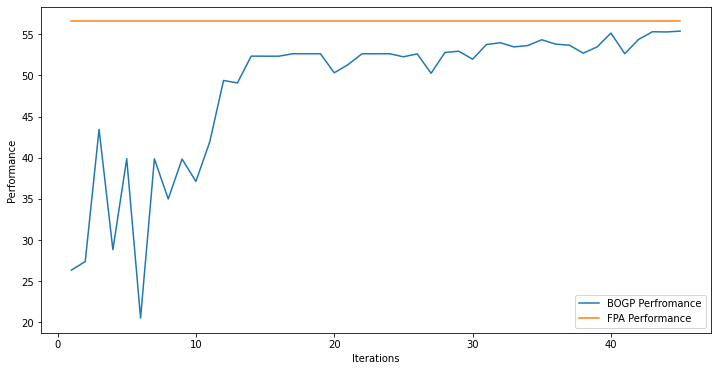

x_next is [ 23.76036857  29.99745808  29.9992881   29.99901855  29.99968234
  29.99862994  29.9996187   29.99746644  29.99870021  16.94135264
 -26.81664985  29.99914293  29.99805994 -30.99793511 -18.76617882
  29.99997266 -30.99978616  29.99995401  29.99899187  29.99988425]
f()=55.440819, actual=55.475
44


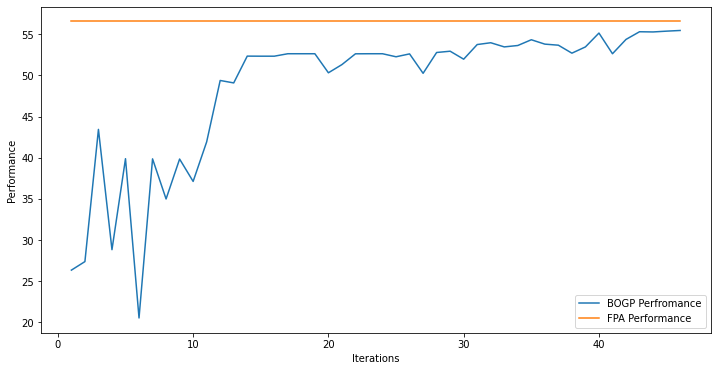

x_next is [ 23.54576342  30.          30.          29.99999998  30.
  30.          30.          30.          30.          17.18340428
 -26.68060044  30.          30.         -30.99943236 -19.5367309
  30.         -31.          29.99999998  30.          29.99999993]
f()=55.482678, actual=55.481
45


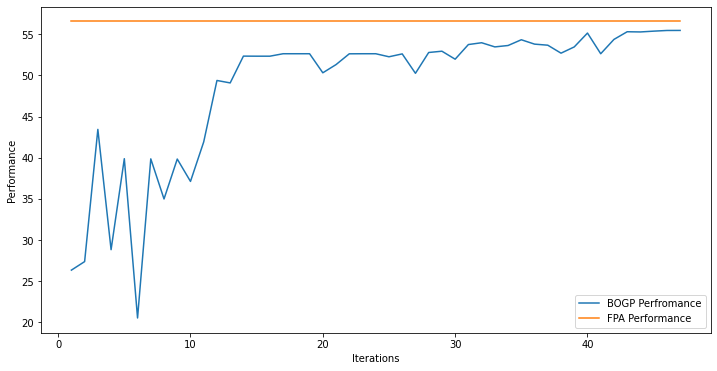

x_next is [ 23.3806931   29.99999998  29.99999996  29.99999998  29.99999999
  30.          29.99999997  29.99999998  29.99999996  17.12196248
 -26.72125146  29.99999995  29.99999996 -30.9999997  -19.42671367
  30.         -31.          29.99999999  30.          29.99999999]
f()=55.481997, actual=55.455
46


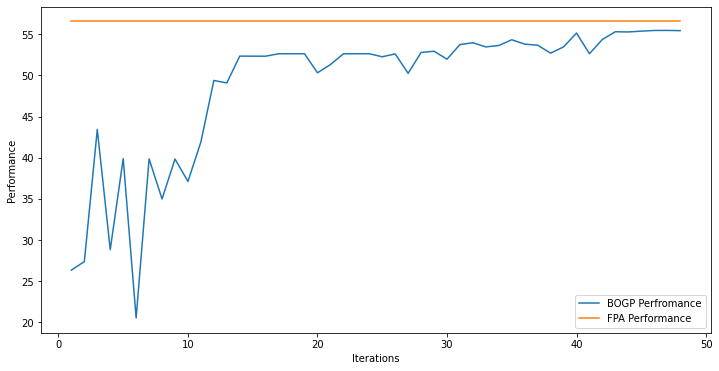

x_next is [ 26.2746247   29.99962977  29.99825769  29.99751697  29.99957334
  29.99995988  29.99936029  29.99998504  29.99978528  17.87108789
 -25.07767338  29.99982753  29.99960695 -30.99811736 -20.49564337
  29.99829577 -30.99980666  29.998004    29.99981678  29.99807913]
f()=55.668647, actual=55.723
47


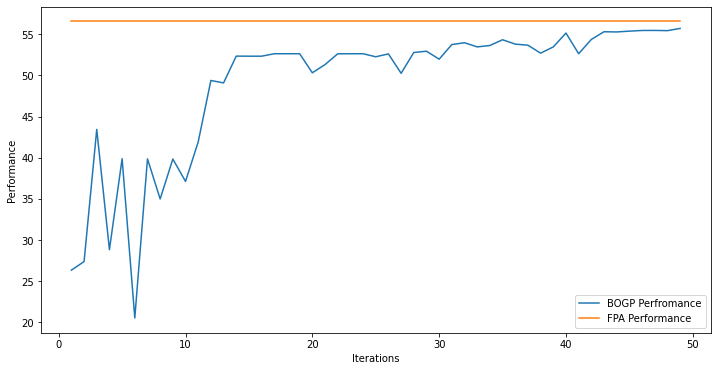

x_next is [ 26.8702516   29.99917704  29.99982351  29.99895335  29.99774283
  29.99982033  29.99865145  29.99970872  29.99943938  17.96200523
 -23.92004611  29.99939176  29.99947532 -30.99549111 -21.12285849
  29.99918286 -30.99982692  29.99995969  29.99948435  29.99932932]
f()=55.736067, actual=55.724
48


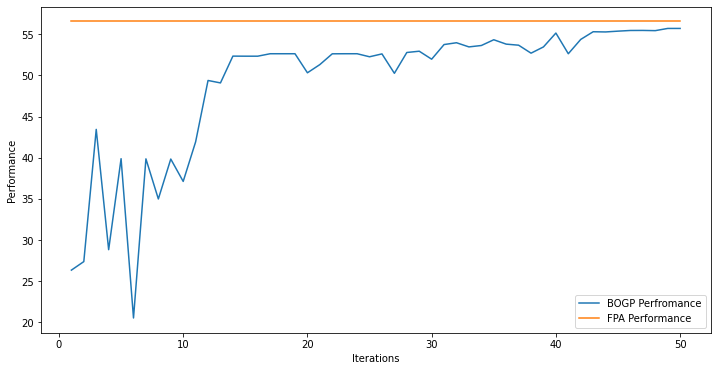

x_next is [ 26.64091494  29.98498189  29.99999995  30.          29.99999999
  30.          29.99999997  29.99999995  29.99999997  18.04830566
 -24.67938783  29.99999997  29.99999996 -30.99908135 -20.70012968
  29.99999996 -30.99986495  30.          29.99999996  29.99999997]
f()=55.728364, actual=55.733
49


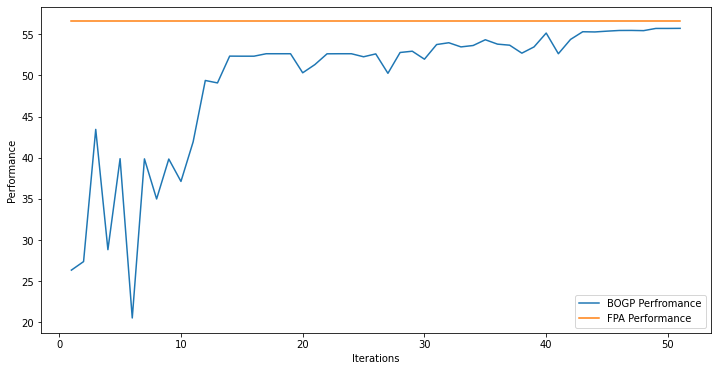

x_next is [ 26.80733897  29.82097218  29.99925587  29.99880178  29.99972578
  29.99992582  29.99828774  29.99913733  29.99987855  18.27201126
 -24.58330306  29.99968597  29.99994277 -30.99447985 -20.56702904
  29.99926158 -30.99979934  29.99785262  29.99970687  29.99978462]
f()=55.735240, actual=55.718
50


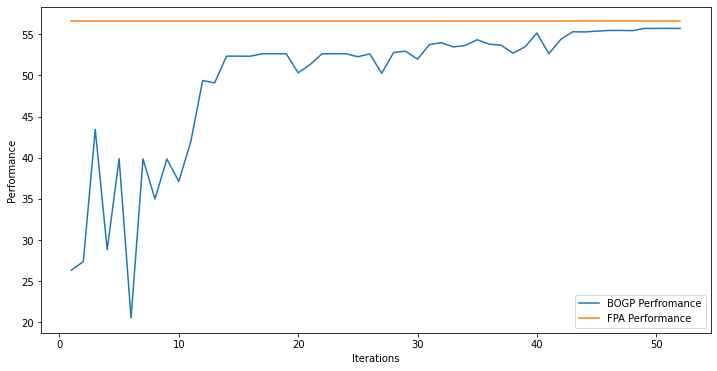

x_next is [ 26.79718829  29.99999948  29.99567167  29.99999951  29.99921664
  29.99984421  29.99999967  29.99993302  29.9990376   18.10755895
 -24.73347497  29.99924546  29.99955714 -30.98582048 -20.82501848
  29.9993844  -30.9999998   29.99903873  29.99999956  29.99926448]
f()=55.734745, actual=55.738
51


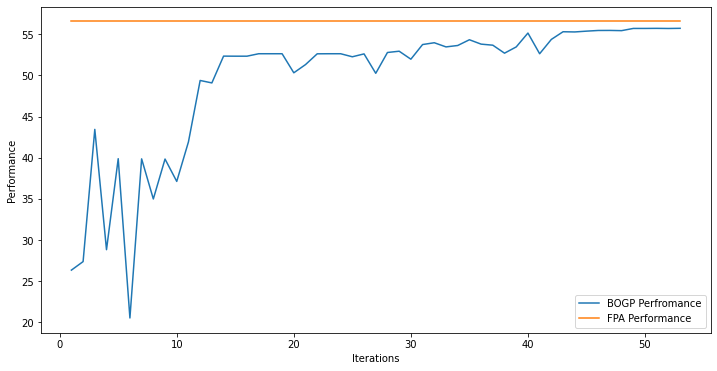

x_next is [ 26.92474185  30.          29.99985828  29.99999639  30.
  30.          29.99999998  29.99996357  30.          18.1573753
 -24.88441573  29.99999929  29.99998116 -30.94673479 -21.04099825
  30.         -31.          30.          29.99999336  29.99989025]
f()=55.739920, actual=55.739
52


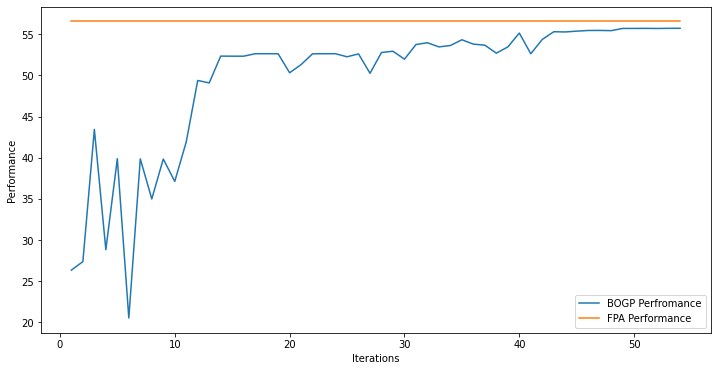

x_next is [  6.49601172 -13.56679392 -23.57161258  24.76904268  -3.18257566
  -3.77610372   0.91568205 -30.93302521 -14.28764478   0.80311773
 -14.12111428   7.72868176  23.9198419  -24.78106533  10.79913267
  -8.80583467 -28.46038478  15.76991334  14.46785325 -18.62053673]
f()=49.565174, actual=29.737
53


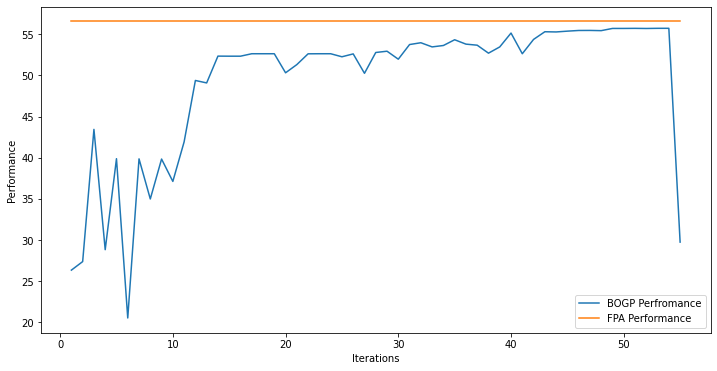

x_next is [ 26.9463628   30.          29.99937072  30.          30.
  29.99999999  30.          30.          30.          18.15802446
 -24.84186091  30.          30.         -30.9864405  -20.90526512
  30.         -30.99999997  29.99999998  29.99990268  30.        ]
f()=55.739348, actual=55.738
54


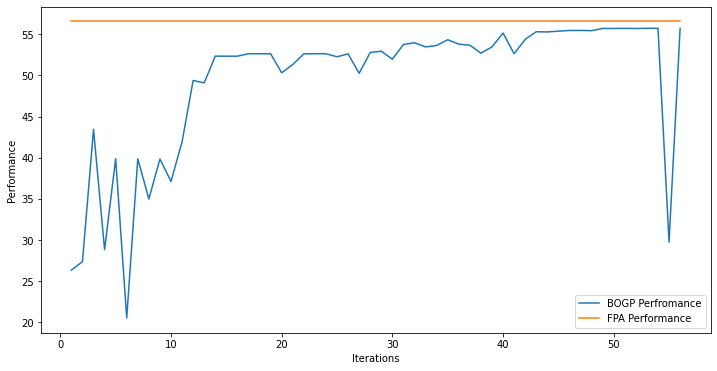

x_next is [ 26.84214227  29.99974268  29.99978363  29.99980012  29.99973277
  29.99892414  29.99984715  29.99987173  29.99907799  18.23868586
 -24.79837681  29.99954377  29.99996158 -30.68990169 -21.03533315
  29.99988722 -30.9998023   29.99952246  29.99946728  29.99905479]
f()=55.740447, actual=55.748
55


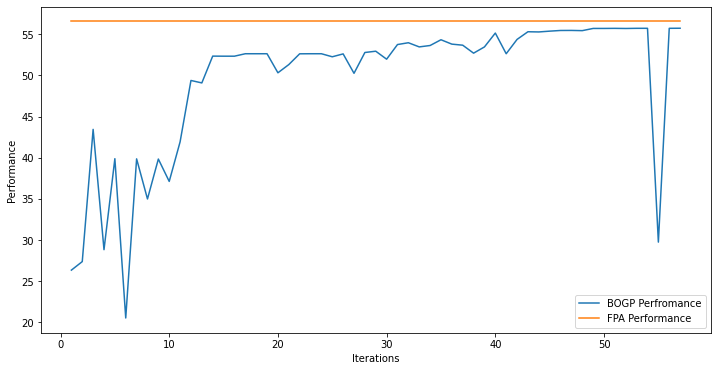

x_next is [ 26.93499701  29.9999999   29.99980532  29.99999959  29.99981095
  29.99999826  30.          29.99999912  29.99999736  18.28918065
 -24.66036336  29.99999903  29.99969191 -29.74807405 -20.83565766
  29.99999882 -30.99999994  29.99999888  29.99769531  29.99989155]
f()=55.761846, actual=55.750
56


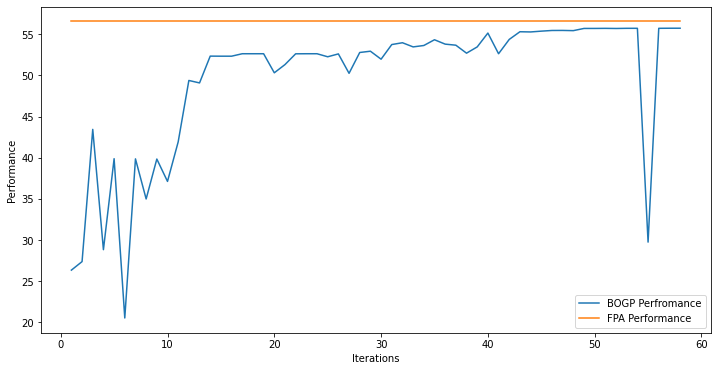

x_next is [ 26.81189403  29.99985923  29.99986916  29.99971755  29.99984483
  29.99977672  29.99943679  29.99991731  29.99986422  18.49084751
 -24.73181961  29.99971957  29.99966478 -30.20888093 -20.93237248
  29.99987031 -30.99982696  29.9996958   29.99901271  29.99978008]
f()=55.754999, actual=55.768
57


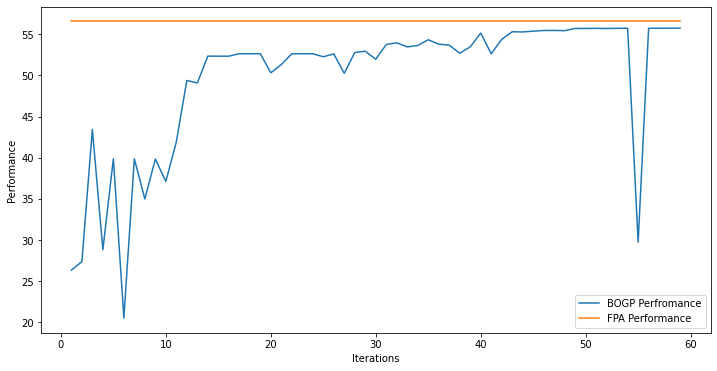

x_next is [ 26.52389624  29.99999996  29.99999995  29.99999197  29.99999236
  29.9999936   29.99999998  30.          29.99999994  19.4607349
 -24.37810002  29.99999995  29.99999989 -30.16884183 -21.05332076
  30.         -31.          29.99999998  29.76633156  29.99993471]
f()=55.794864, actual=55.864
58


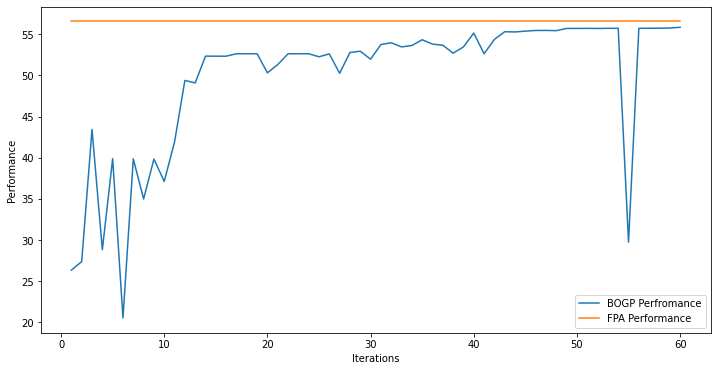

x_next is [ 26.21224929  29.99990302  29.99996625  29.99987297  29.99986591
  29.9998697   29.99983811  29.99992773  29.99982567  18.51116071
 -16.55377749  29.99986061  29.9999367  -30.1110083  -22.86406296
  29.99995251 -30.99979788  29.99953062  12.44052837  29.99976092]
f()=56.595148, actual=54.656
59


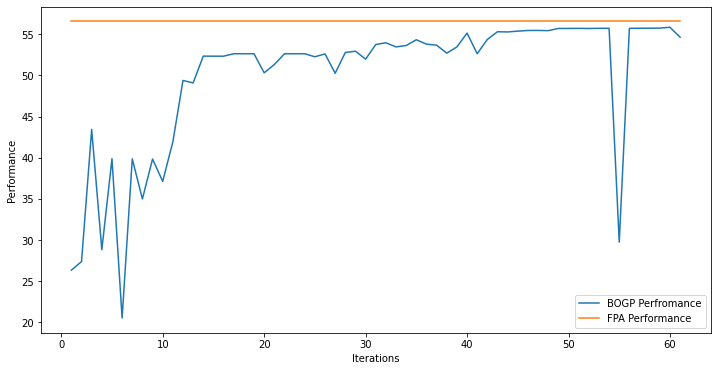

x_next is [ 26.25946064  29.99999999  29.99999999  30.          30.
  29.99999999  30.          30.          30.          20.2544632
 -23.35121306  30.          30.         -30.00042536 -21.31739137
  30.         -30.99999981  29.9999992   26.92890762  29.99999999]
f()=56.004666, actual=56.269
60


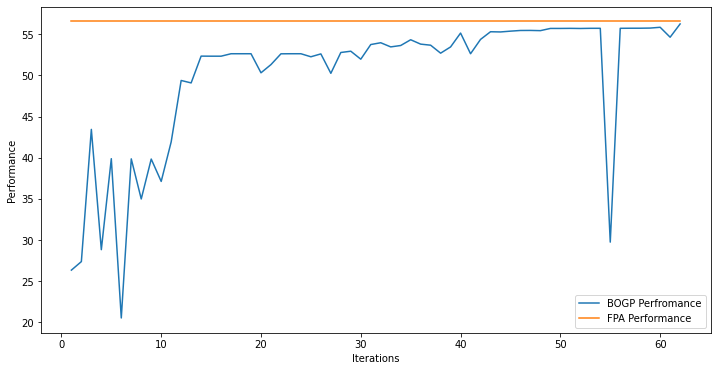

x_next is [ 26.18802229  30.          30.          30.          30.
  30.          30.          30.          30.          19.97113837
 -23.66966129  30.          30.         -29.97619223 -21.03055285
  30.         -31.          30.          24.42457805  30.        ]
f()=56.373089, actual=56.418
61


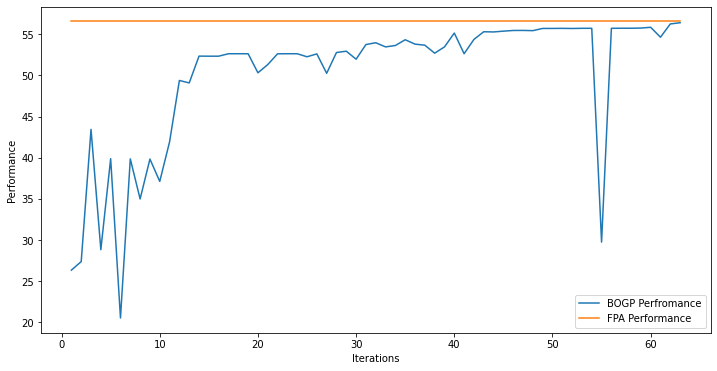

x_next is [ 26.1251898   29.99984111  29.99996579  29.99971425  29.99987094
  29.99985177  29.99978955  29.99993979  29.99995234  19.79413218
 -24.04532977  29.99994409  29.9999748  -29.98383461 -20.80912716
  29.99979109 -30.99981931  29.99969738  23.81986012  29.99970069]
f()=56.425071, actual=56.424
62


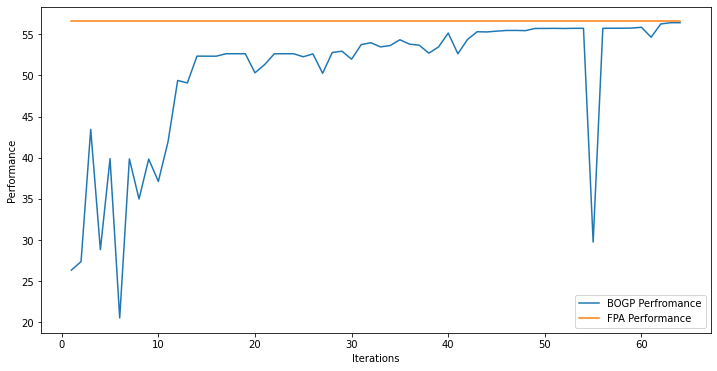

x_next is [ 26.14867469  29.99998214  29.99988426  29.99998476  29.9992582
  29.99997548  29.99998396  29.99981164  29.9999811   19.82009086
 -23.96833297  29.99986591  29.99980982 -29.97999257 -20.85103691
  29.99998126 -30.99986305  29.99998537  23.87480181  29.99998571]
f()=56.423726, actual=56.423
63


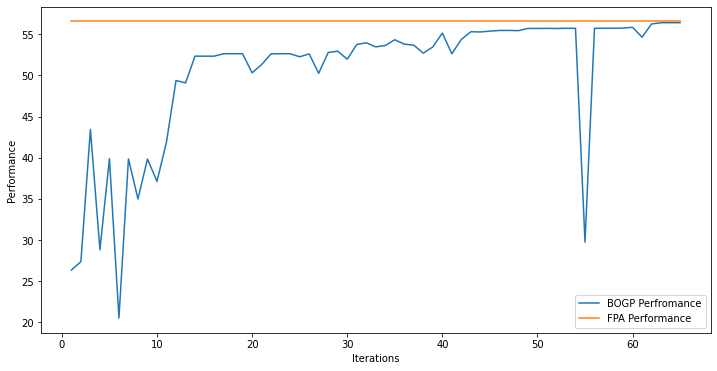

x_next is [ 26.0786863   30.          30.          29.99999997  30.
  29.99999998  29.99999999  30.          29.99999999  19.79369011
 -24.09740419  30.          29.99999999 -30.00657992 -20.77542968
  30.         -30.99999998  29.99999997  23.89670009  29.99999999]
f()=56.423949, actual=56.424
64


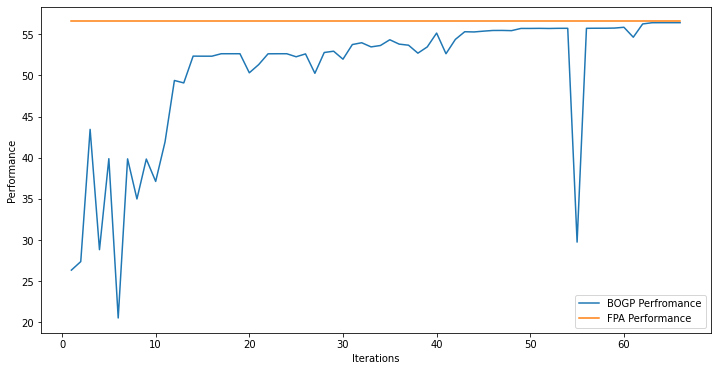

x_next is [ 26.07210595  29.99999988  29.9999953   29.99988877  29.99999902
  29.99999973  29.99953583  29.99981786  29.99999491  19.79592161
 -24.10234257  29.9998701   29.99999999 -30.01453918 -20.76657678
  29.99959447 -30.99999984  29.99999466  23.90300712  29.99993915]
f()=56.423950, actual=56.424
65


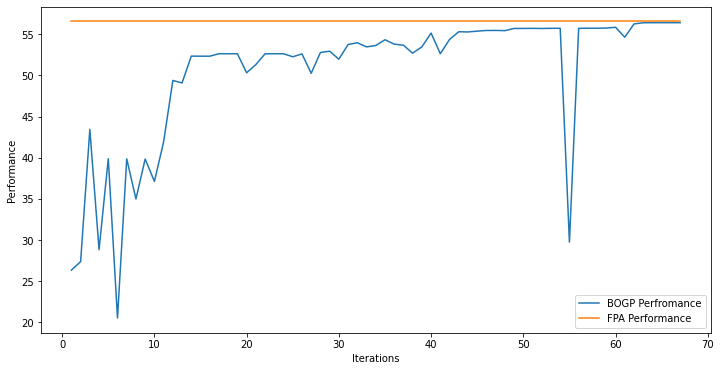

x_next is [ 26.04396237  29.99999909  29.99999923  29.99999916  29.99999977
  29.99999926  29.99999975  29.99999904  29.99999914  19.8997782
 -23.99896388  29.99999911  29.99999979 -30.23934424 -20.53517721
  29.99999899 -30.99999739  29.99976759  23.82830172  29.99998466]
f()=56.426013, actual=56.425
66


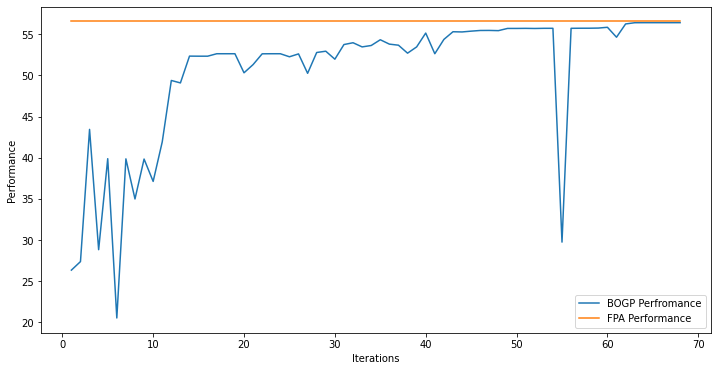

x_next is [ 26.04286887  29.99979859  29.99987467  29.99987394  29.99978452
  29.99998386  29.99999207  29.99983429  29.99992062  19.89179227
 -24.01869175  29.99994778  29.99956002 -30.22589461 -20.61770134
  29.99999379 -30.99995725  29.99992166  23.83590885  29.99998881]
f()=56.425415, actual=56.425
67


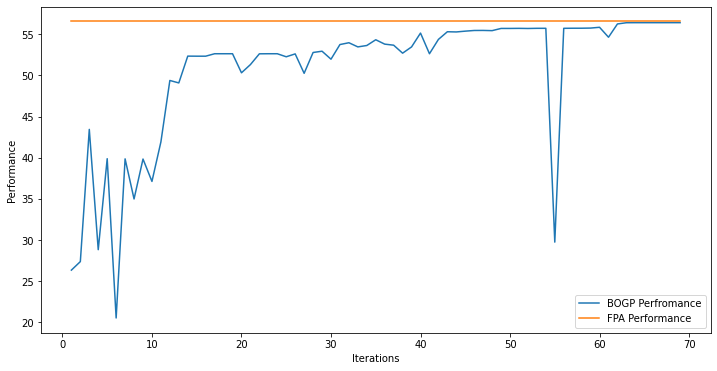

x_next is [ 26.04088535  29.99999926  29.99972043  29.99956546  29.9999079
  29.99992748  29.99972047  29.99986242  29.99983659  19.88798629
 -24.01887712  29.99921175  29.99995879 -30.2171896  -20.59639477
  29.99987771 -30.99996522  29.99999179  23.8477753   29.99990658]
f()=56.425378, actual=56.425
68


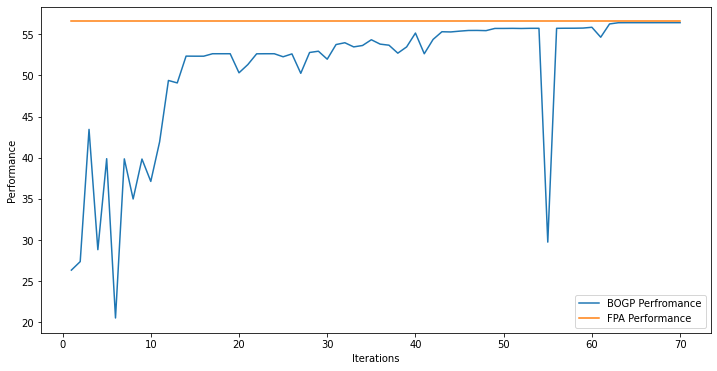

x_next is [ 17.41072519  29.99335344 -30.9787494   29.96995974  29.99840099
  29.99712947  29.95368768  29.99339352  29.99821397 -10.74319892
 -30.99067249 -30.99041214  29.99077011 -30.98035406 -30.91609254
  29.98183301 -30.9974075   29.93883009   6.42671122  29.99939892]
f()=55.507339, actual=46.795
69


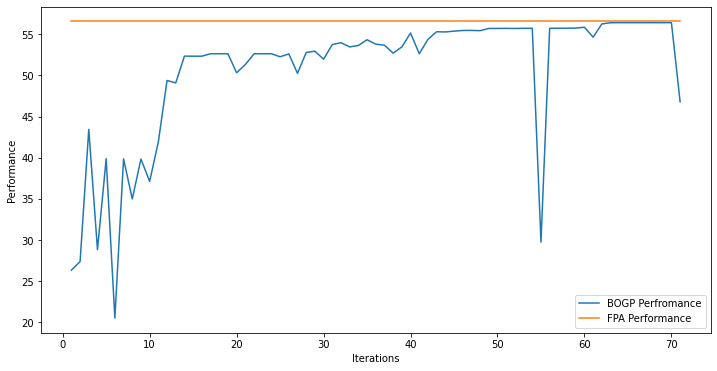

x_next is [ 26.02651516  29.99977338  29.9998733   29.99991303  29.99974862
  29.99995892  29.9999186   29.99985246  29.99976049  19.8680733
 -23.99228355  29.99992491  29.99985415 -30.17407602 -20.57273909
  29.9997923  -30.99999329  29.99976219  23.86479203  29.99966823]
f()=56.425495, actual=56.425
70


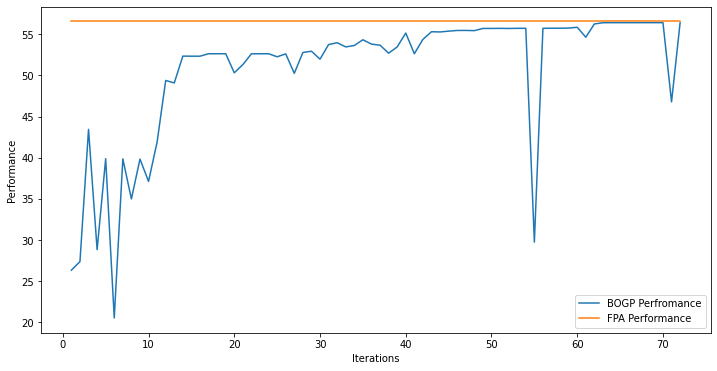

x_next is [ 26.15800594  29.99995435  29.99990473  29.99992834  29.99999243
  29.99974814  29.99980851  29.99998747  29.99944465  19.89130883
 -24.07062415  29.99992534  29.999994   -30.21717624 -20.57204701
  29.9997882  -30.99977285  29.99992891  23.90134395  29.99985038]
f()=56.425829, actual=56.424
71


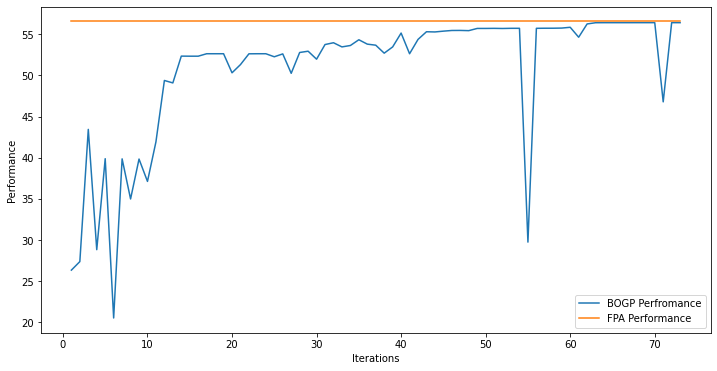

x_next is [ 25.76801769  29.99999348  29.99976552  29.99980904  29.99995145
  29.9999007   29.99950553  29.99999178  29.99994514  20.16273668
 -24.07676981  29.99998871  29.99998968 -30.04382908 -20.60780948
  29.99998398 -30.99997939  29.99990678  23.74426073  29.99985045]
f()=56.429039, actual=56.426
72


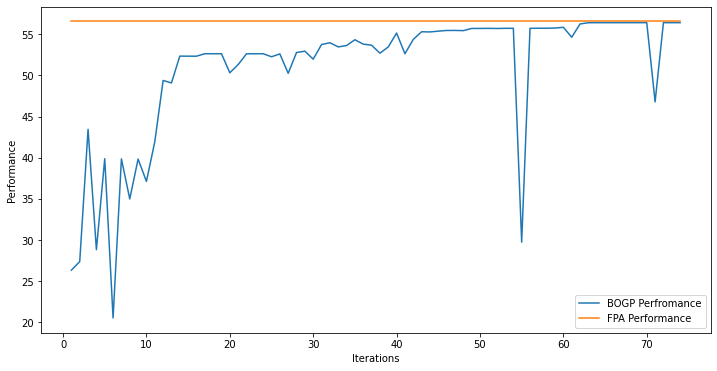

x_next is [ 25.80252023  29.99984468  29.99978842  29.99942931  29.99999525
  29.99999641  29.99740293  29.99998647  29.99992045  19.99580378
 -24.08411725  29.99999845  29.99920383 -30.19440684 -20.58347237
  29.99975857 -30.99993027  29.9999672   23.77627277  29.99999403]
f()=56.426920, actual=56.427
73


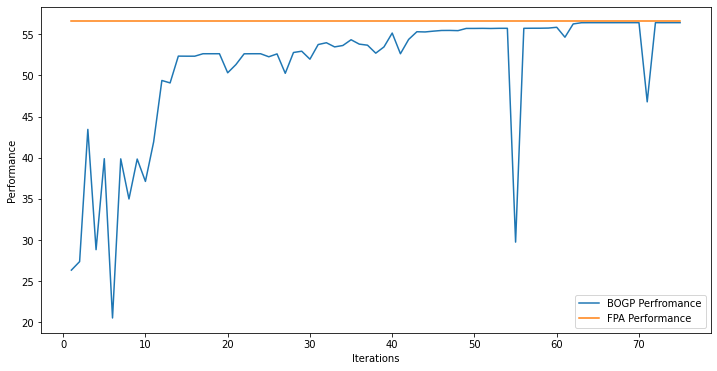

x_next is [ 25.84538226  30.          29.99998355  29.9999398   30.
  30.          29.99999993  29.99999998  29.99993125  20.03136718
 -24.04128149  29.99999243  30.         -30.14109702 -20.61517709
  30.         -30.99999998  29.99999999  23.78423012  29.99999997]
f()=56.426794, actual=56.427
74


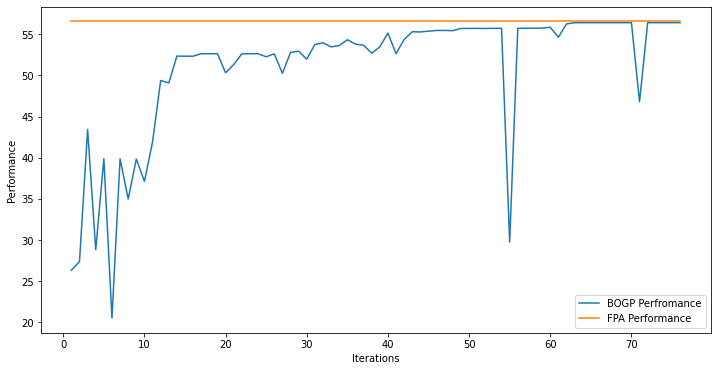

x_next is [ 25.85018107  29.99999371  29.99998599  29.99976655  29.99997283
  29.99995208  29.99989191  29.99993665  29.99994587  20.0410468
 -24.02813549  29.99996939  29.99992404 -30.13472852 -20.63413119
  29.9999653  -30.99996031  29.99962115  23.78947495  29.99999436]
f()=56.426811, actual=56.427
75


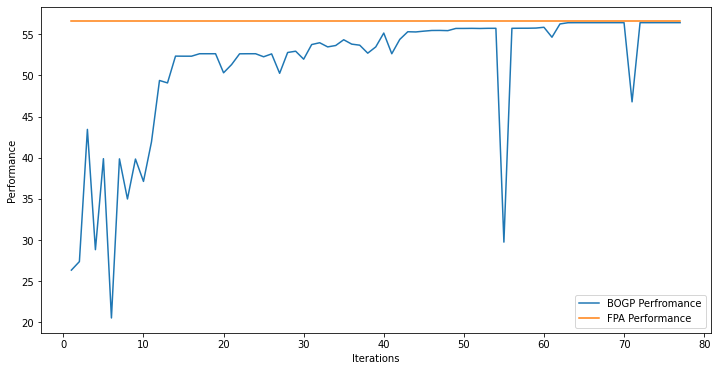

x_next is [ 25.82394579  29.99999854  29.99980031  29.91299459  29.99994384
  29.99994516  29.52735622  29.99990453  29.99994729  20.06360685
 -23.95566191  29.99994104  29.99997266 -30.14622264 -20.74049859
  29.99980529 -30.99986462  29.99992094  23.81715074  29.99977694]
f()=56.430368, actual=56.400
76


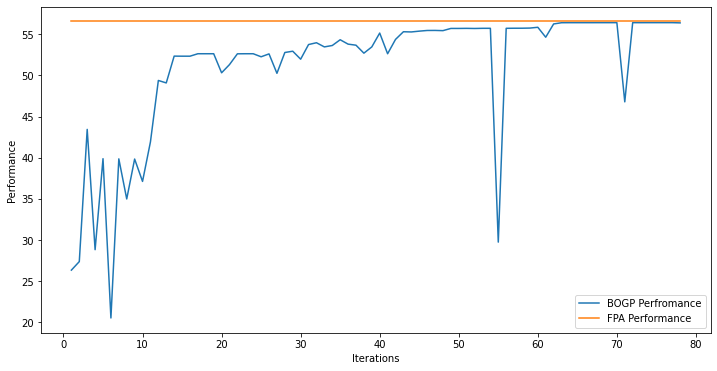

x_next is [ 25.78782313  29.99999999  29.99990636  29.90073691  29.99993738
  29.99996666  29.99999996  29.99987938  29.99985558  20.07703656
 -23.96658723  29.99999994  29.99999253 -30.16742137 -20.77903127
  29.99997623 -30.99999838  29.99991664  23.84457386  29.99999995]
f()=56.427578, actual=56.479
77


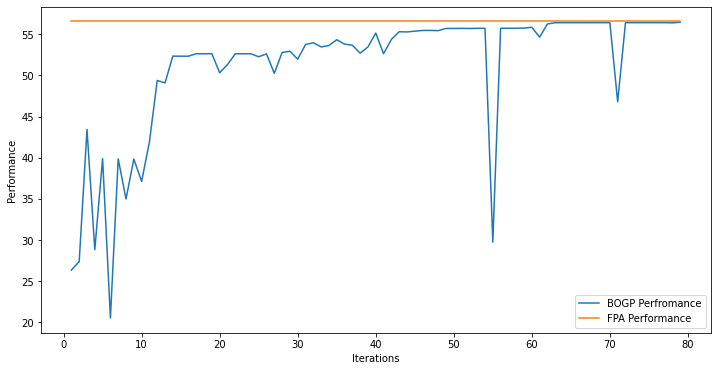

x_next is [ 25.96854387  29.99999908  27.69124252 -30.99983994  29.9999595
  29.99999858  29.99999964  29.99999917  29.99995779  12.51761194
 -28.2173042   29.99972334  29.99999815 -30.99991597 -20.97840431
  29.99999816 -30.99990455  29.99968802  18.69339892  29.99999864]
f()=66.761640, actual=53.615
78


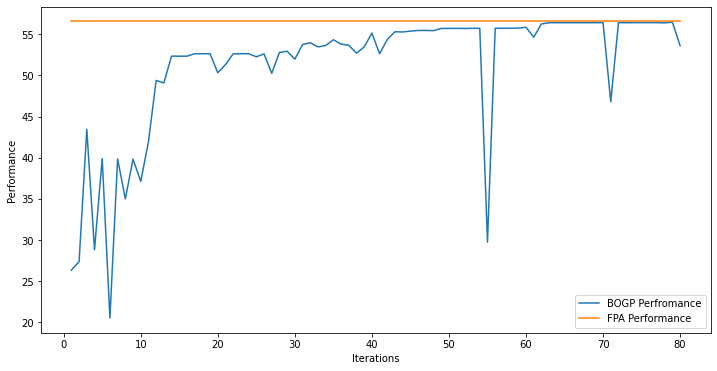

x_next is [ 24.61798597  29.9999977   29.99988259   8.995325    29.99991823
  29.99993482  29.99985071  29.99999847  29.9999983   19.10550596
 -23.33551156  29.99999768  29.9999695  -30.3427415  -20.03371261
  29.99995754 -30.99992359  29.99996932  22.18877865  29.99998626]
f()=60.583132, actual=56.261
79


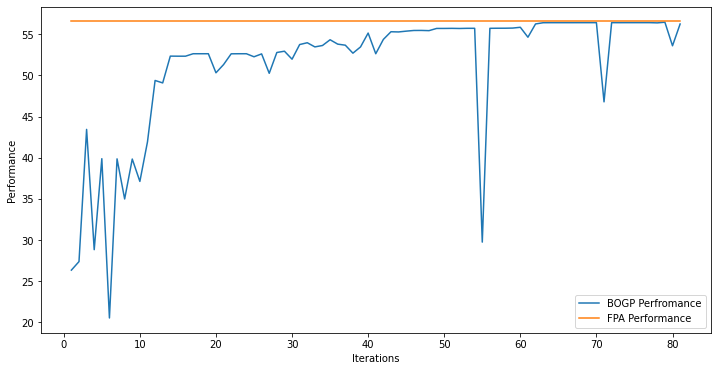

x_next is [ 25.85708275  29.99999605  29.99997452  21.94711942  29.99999604
  29.99999655  29.99999773  29.99999624  29.99999743  19.8015527
 -24.06111939  29.99999579  29.99998687 -30.13887112 -21.01529179
  29.99999563 -30.99999049  29.99999832  23.59143312  29.99998212]
f()=58.220351, actual=58.417
80


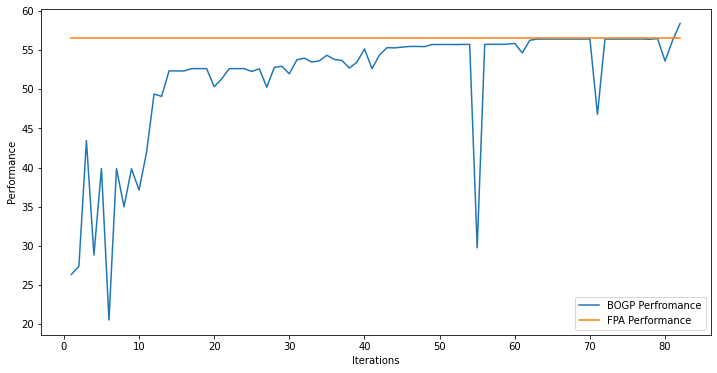

x_next is [ 25.94001412  29.99988144  29.99993546  21.54730621  29.99993436
  29.99999904  29.9999995   29.99987947  29.99981389  19.7708659
 -24.1430808   29.9999535   29.99997602 -30.10458924 -21.1273481
  29.99997138 -30.9999377   29.99999955  23.57511308  29.99991279]
f()=58.420772, actual=58.406
81


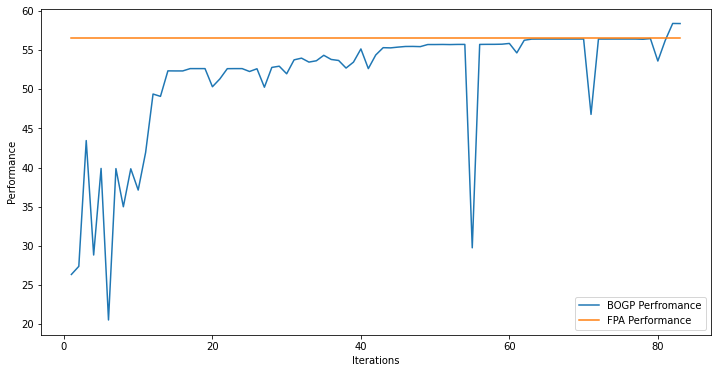

x_next is [ 29.98222758  29.99382499  29.96676948 -30.99298332  29.99395451
  29.99632626  29.99562341  29.99063473  29.99962656 -30.98710388
 -30.98070837 -30.99741911  29.97701683  29.93008959  29.99938634
  29.99892367 -30.99993069  29.99915368  29.64371024 -30.99090042]
f()=61.557636, actual=48.320
82


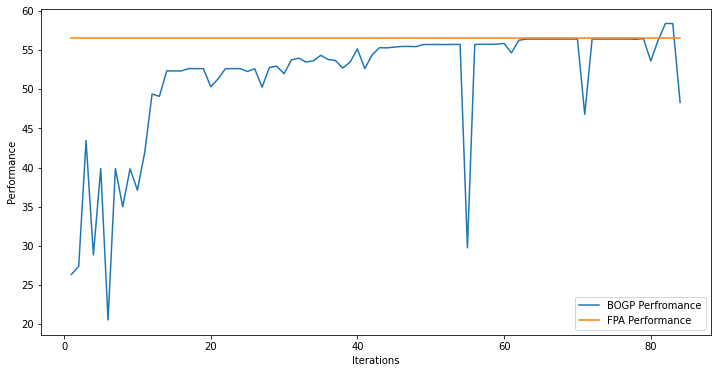

x_next is [ 25.64920856  29.99999999  29.99999995  22.01431069  29.99999996
  30.          30.          29.99999997  29.99999998  19.88442012
 -23.8298255   29.99999998  29.99999999 -30.21993237 -20.57962297
  29.9998306  -30.99999999  29.99999998  23.59293693  29.99980098]
f()=58.422588, actual=58.417
83


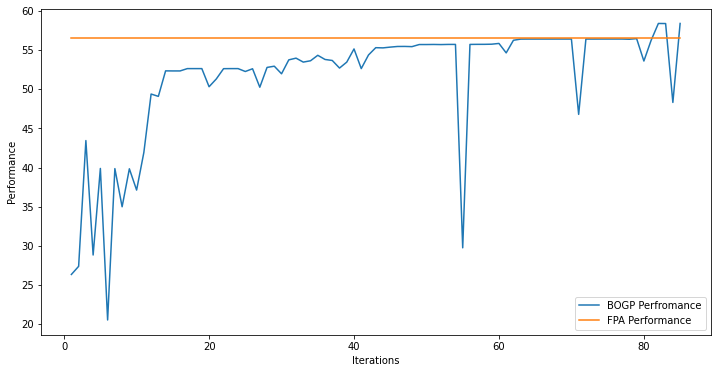

x_next is [ 25.72551674  30.          29.99999999  22.08748414  29.99999999
  29.99999999  30.          29.99999999  29.99999999  19.8396448
 -23.93121685  30.          29.99999998 -30.18307487 -20.85398807
  29.99987315 -30.99999999  29.99999998  23.59767071  29.99999999]
f()=58.418777, actual=58.418
84


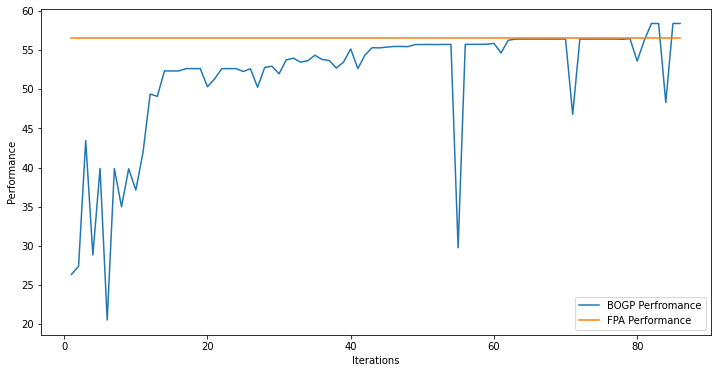

x_next is [ 25.80873924  30.          29.99999999  22.07933919  29.99999995
  29.99999999  30.          29.99999999  29.99999997  19.83072657
 -24.0011281   30.          30.         -30.16557323 -20.74693321
  29.99999995 -30.99999999  29.99999997  23.58968205  29.99990274]
f()=58.418760, actual=58.418
85


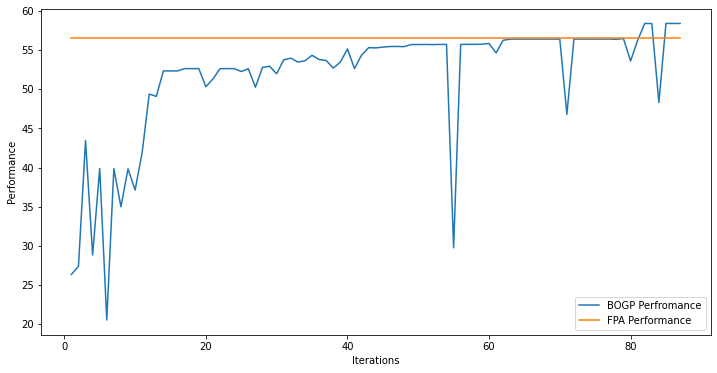

x_next is [ 25.78809835  29.99999932  29.99976523  22.06851176  29.99989493
  29.99996065  29.99983566  29.99998757  29.99997487  19.84617249
 -23.96345867  29.99995894  29.99999408 -30.17748404 -20.7899903
  29.99990365 -30.9998567   29.99999743  23.59609947  29.99954807]
f()=58.418414, actual=58.418
86


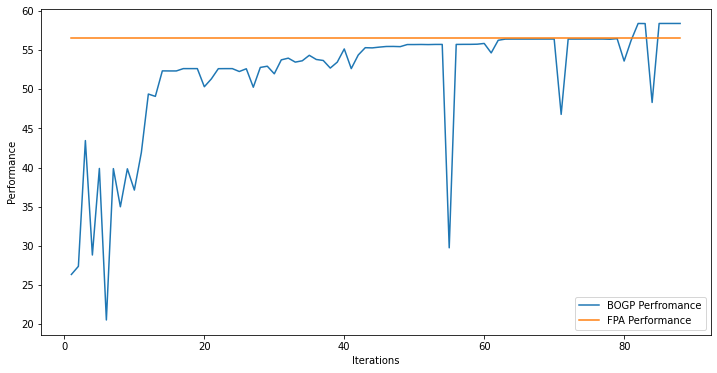

x_next is [ 23.45068093  30.           4.82463252   3.73622349  21.81405038
  30.          30.          20.51276395  29.99999999   6.86325044
 -31.           8.55504355  16.13583773 -24.17588431 -14.53115022
  27.46852479 -31.          30.          18.91740799  21.3425798 ]
f()=58.042365, actual=49.293
87


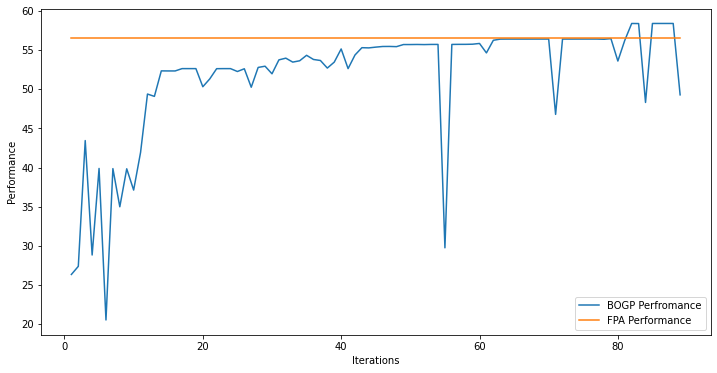

x_next is [ 25.70249985  29.99991301  29.99999616  22.07021251  29.99999946
  29.99993619  29.99999941  29.99999788  29.99999802  19.80033438
 -24.06227282  29.99985292  29.99972339 -30.17965412 -20.76716054
  29.99999874 -30.99987794  29.99988163  23.56478847  29.99994472]
f()=58.418683, actual=58.418
88


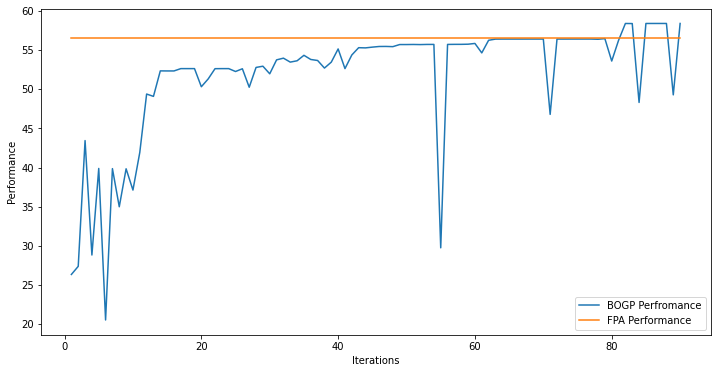

x_next is [ 25.80940154  29.99987062  29.99982262  22.08595574  29.99979008
  29.99998564  29.99982251  29.99956148  29.99993202  19.7341556
 -23.887173    29.99967831  29.99998549 -30.02084237 -20.77371389
  29.99994932 -30.9999342   29.99999799  23.61791331  29.99997014]
f()=58.419256, actual=58.418
89


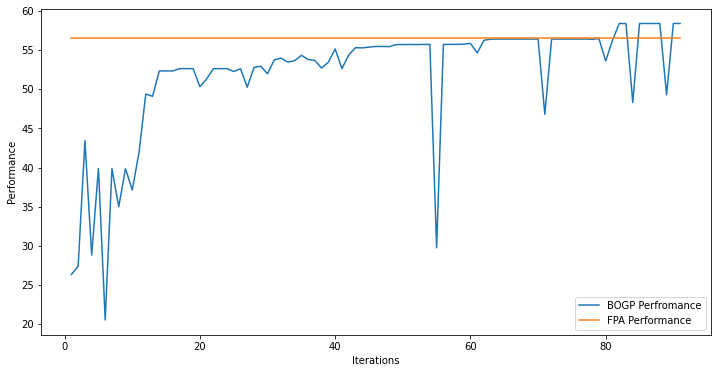

x_next is [ 25.82575067  29.99999999  29.99999223  22.11149363  29.99999999
  30.          29.99999999  29.99984611  29.99998338  19.76171582
 -23.91851506  29.99999999  29.99999999 -30.14479271 -20.78284458
  29.99999993 -30.99999997  29.99999999  23.59950454  29.99999995]
f()=58.418696, actual=58.419
90


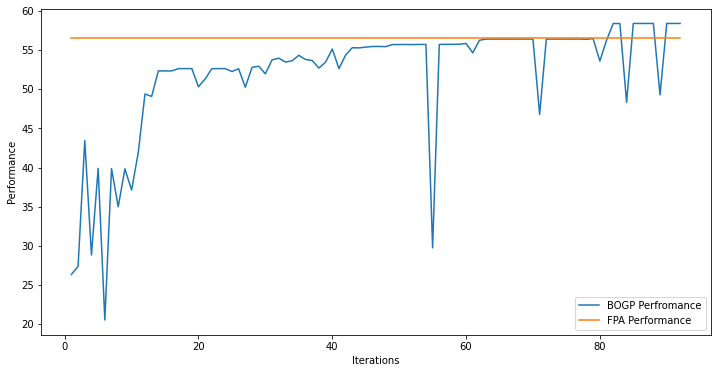

x_next is [ 25.81208555  29.99999966  29.99999944  22.112138    29.99999994
  29.99999981  29.99999964  29.99999928  29.99999972  19.7993912
 -23.93001621  29.99999918  29.99999962 -30.10111215 -20.78302842
  29.99999953 -30.99999759  29.99999974  23.61031748  29.99999992]
f()=58.418640, actual=58.419
91


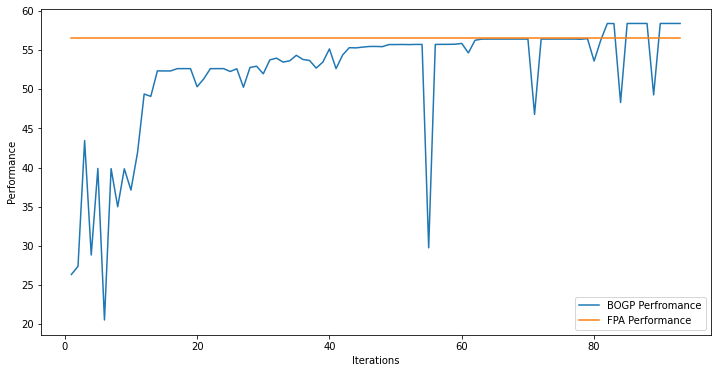

x_next is [ 28.09914739   4.44360852  -6.18614049  12.20402428  25.62812845
 -30.39797522 -24.04954004  20.74431899   8.56065744   2.52880464
 -19.45661339  -7.64824708   5.27315204  14.41062297 -15.99558495
 -26.74947295 -17.06390567  -3.49762163  -4.66800411 -26.29898724]
f()=52.017504, actual=29.322
92


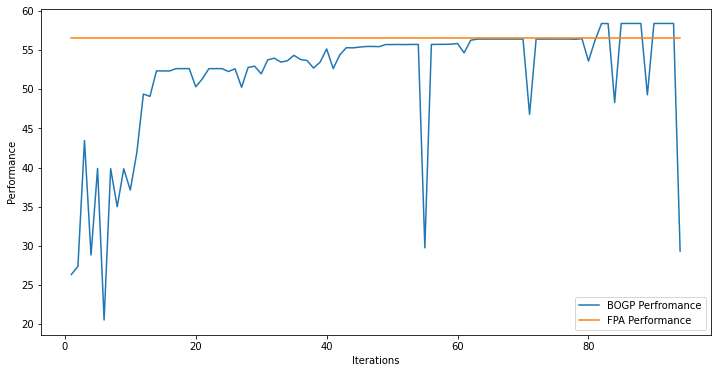

x_next is [ 25.81068674  29.99999857  29.99999862  22.12130023  29.99999858
  29.99999835  29.99999944  29.99999668  29.99999939  19.80631185
 -23.93158103  29.99999947  29.99994553 -30.09384098 -20.78747443
  29.99988083 -30.99978054  29.99999911  23.61498469  29.99999782]
f()=58.418639, actual=58.419
93


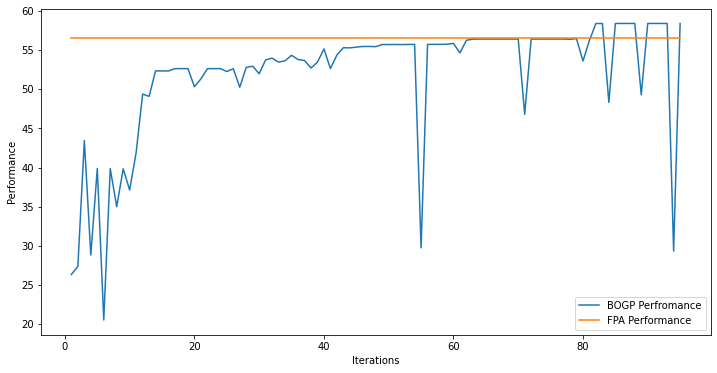

x_next is [ 25.79830667  30.          29.99999989  22.12556784  29.9999218
  29.99999999  30.          29.99999999  29.99999999  19.75513024
 -24.03013677  29.99999999  29.99999999 -30.21606679 -20.7608261
  29.99999999 -30.99999994  29.99999998  24.25240742  29.99999995]
f()=58.428816, actual=58.413
94


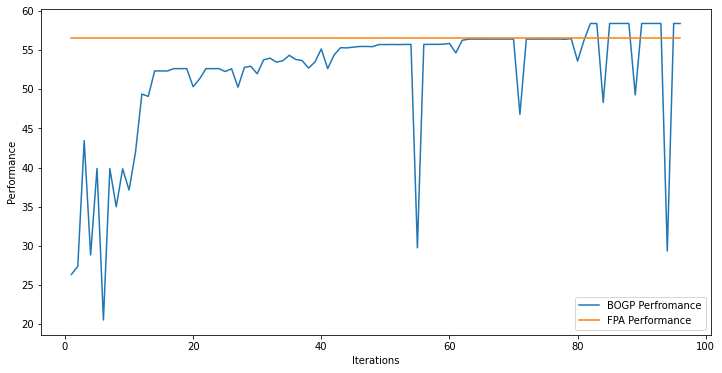

x_next is [ 25.85253705  30.          29.99999997  22.25779288  29.99999999
  29.99999996  30.          29.99999998  29.99999999  19.84810474
 -23.94025193  29.99999999  29.99999998 -30.08083858 -20.83943366
  29.99999994 -30.99999994  29.99999998  23.73858871  29.99999992]
f()=58.420017, actual=58.419
95


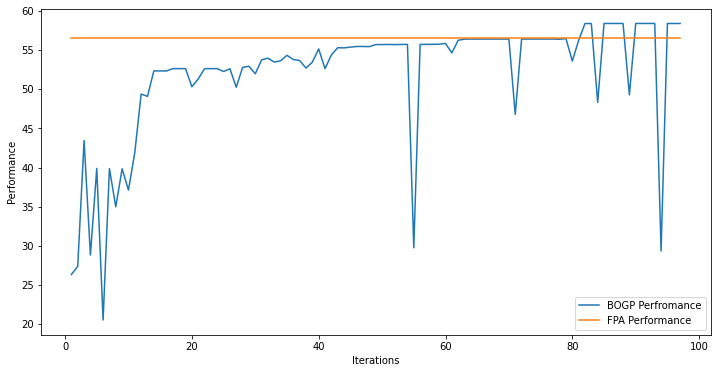

x_next is [ 25.81700273  29.99999892  29.99998677  22.21266626  29.99999943
  29.99999946  29.99999961  29.99990267  29.99944658  19.8310246
 -23.95087439  29.99999931  29.99987399 -30.07991655 -20.81362655
  29.99997848 -30.99989154  29.99959233  23.66955873  29.9999994 ]
f()=58.419317, actual=58.419
96


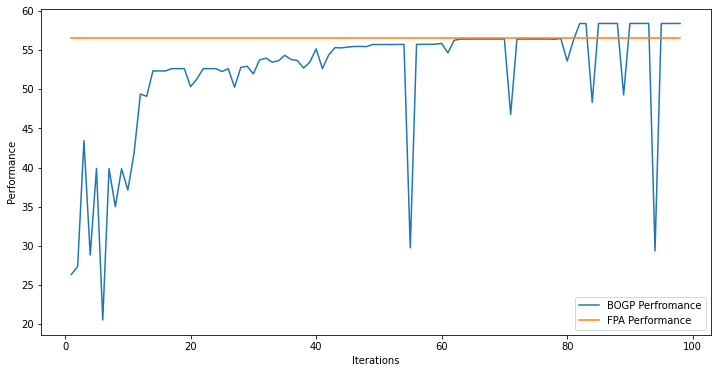

x_next is [ 29.99949697  29.99696416  29.99980896  29.99555342  29.9979336
  29.99773394  29.99706275  29.99836418  29.99726105  29.99637732
 -30.99570577  29.99420358  29.99971534 -30.99854732 -30.98649625
  29.9990582  -30.9961831   29.99888414  29.99721269  29.99935962]
f()=52.046389, actual=52.648
97


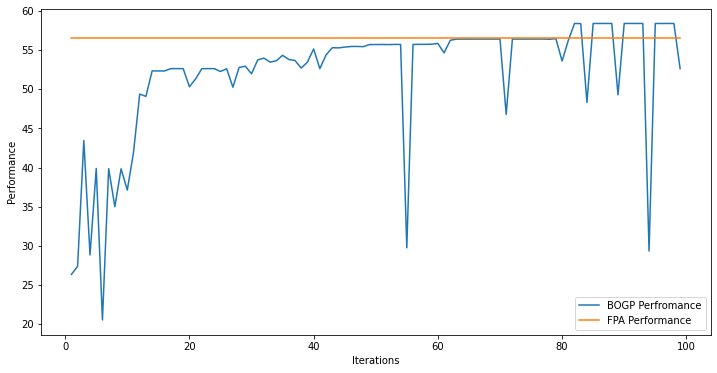

x_next is [ 25.84618951  29.99986885  29.99999927  22.18192274  29.99999944
  29.99997523  29.99999944  29.99985634  29.99999948  19.84363829
 -23.91357026  29.99999951  29.99982989 -30.11093757 -20.81395875
  29.64883434 -30.9999924   29.99999956  23.69433159  29.99999841]
f()=58.421372, actual=58.533
98


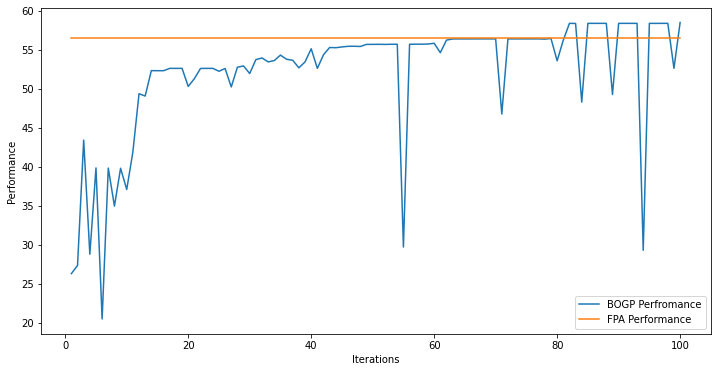

x_next is [ 25.61121788  29.99999996  29.99999985  13.85025455  29.99999995
  29.99999992  29.99999995  29.99999992  29.9999999   16.32390097
 -24.00383301  29.99999994  29.99999994 -30.60450861 -19.52938634
   3.6395924  -30.99988338  29.99999997  21.18253964  29.99999993]
f()=60.389651, actual=55.579
99


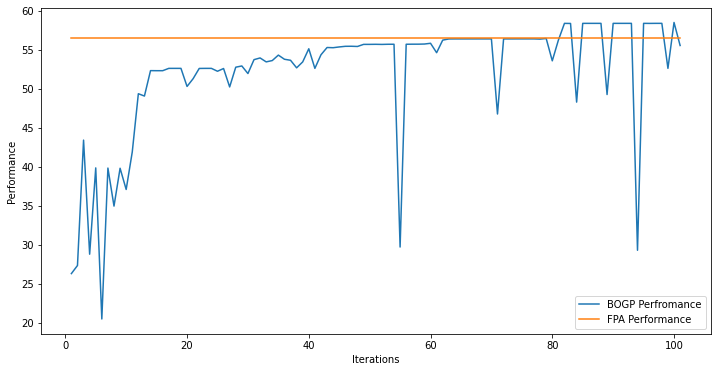

x_next is [ 25.76598152  29.99993192  29.9999285   21.36663755  29.99999943
  29.99989132  29.99999982  29.99999953  29.99999966  19.80262088
 -23.76924708  29.99980333  29.9999995  -30.06037801 -20.79095302
  23.57518788 -30.99979102  29.99994286  23.54670151  29.99999965]
f()=59.384780, actual=59.257
100


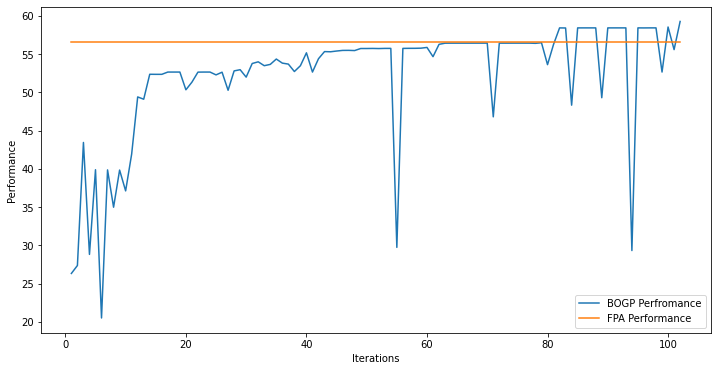

x_next is [ 25.76058826  29.99999994  29.99990843  21.50393202  29.99999996
  29.99999973  29.99999999  29.99999993  29.99999988  19.75157631
 -23.83509882  29.99999992  29.99999992 -30.09071989 -20.77045493
  24.27627854 -30.99999913  29.99999948  23.57595849  29.99999958]
f()=59.266065, actual=59.273
101


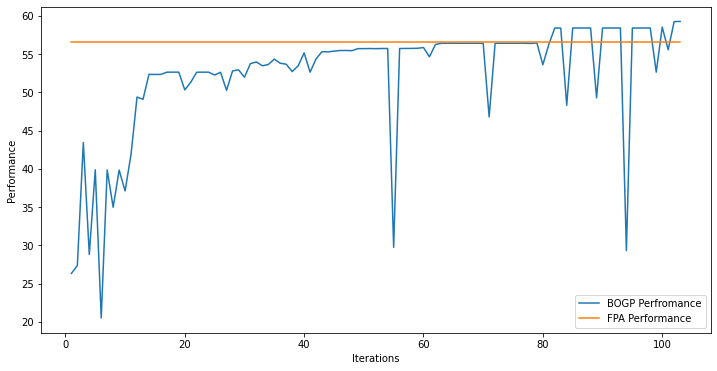

x_next is [ 29.99992069  29.99991029  29.99996655  29.99984925  29.99984686
  29.99984344  29.99998886  29.99994101  29.99975303  29.99993636
 -30.99986723  29.99989574  29.99969558 -30.99981038 -30.99983886
  29.99976381 -30.99974145  29.99967199  29.99999053  29.99989757]
f()=52.290042, actual=52.646
102


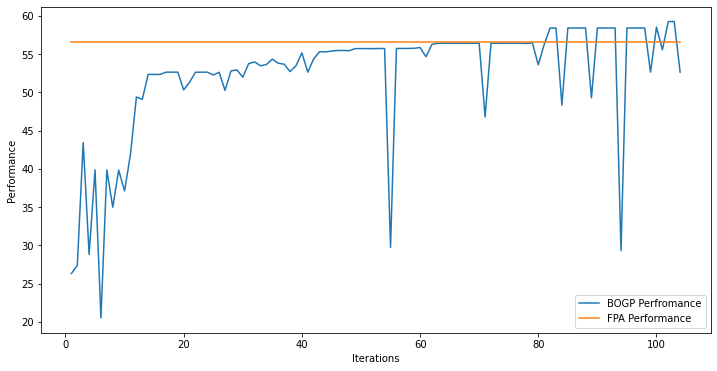

x_next is [  2.69369246 -12.03786055  -9.50597065 -16.47113912  11.57448443
   4.18424092   3.74002527  24.20471161  -0.8685098   23.53966543
  16.14324012 -15.72423729  -3.59568282   8.19545687  16.47335331
 -21.69758625   0.74280397  28.46754664   7.81882732   7.83260894]
f()=52.293576, actual=31.719
103


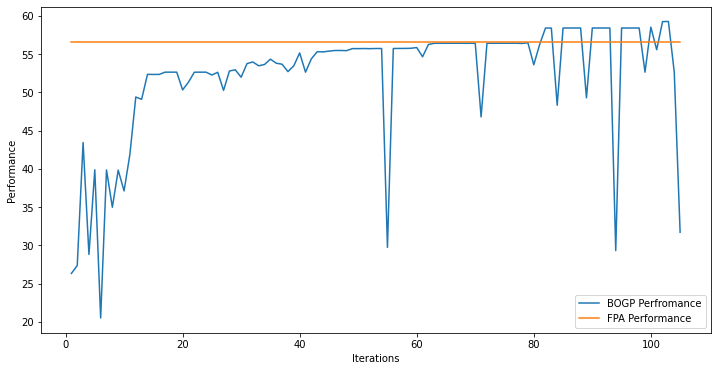

x_next is [ 25.77669514  29.99999998  29.99999989  21.57122296  29.99999999
  29.99999999  30.          29.99999994  29.99999997  19.72456766
 -23.88177716  29.99960796  29.99999993 -30.08604864 -20.724633
  24.4587953  -30.99999982  29.99999999  23.55548889  29.99999995]
f()=59.274124, actual=59.270
104


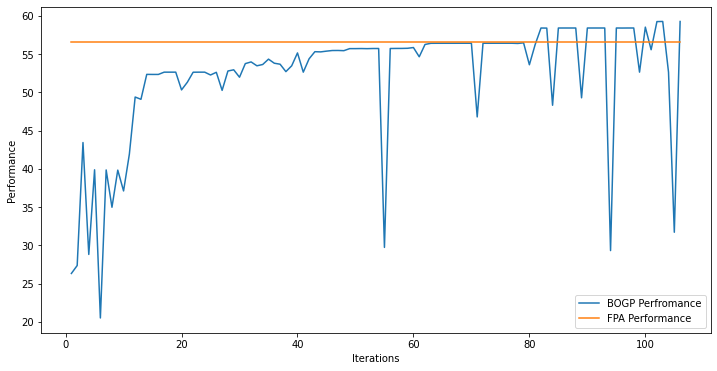

x_next is [ 25.66215203  29.99996871  29.99988153  21.34887522  29.9999998
  29.99990818  29.99990739  29.9997352   29.9999994   19.84929855
 -23.55805483  29.99998028  29.99985169 -30.18395365 -21.1644633
  24.35666465 -30.99959571  29.99999972  23.78939768  29.99999962]
f()=59.280341, actual=59.289
105


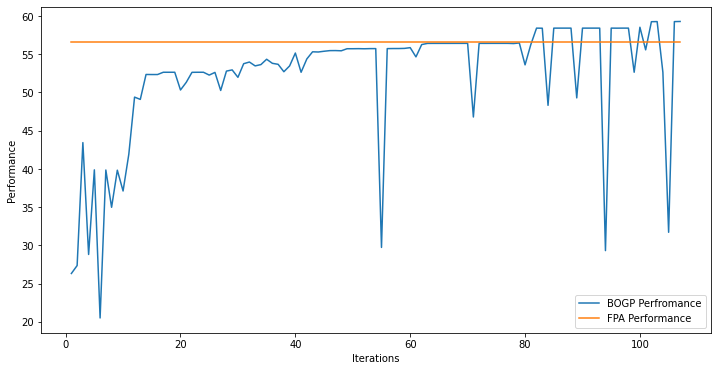

x_next is [ 25.59537726  30.          29.99999994  21.31318105  30.
  30.          30.          29.9999998   29.99999994  19.84123691
 -23.39583352  29.99999997  29.99999983 -30.23843539 -21.431382
  24.37602961 -30.99999993  30.          23.88184185  29.99999998]
f()=59.291458, actual=59.291
106


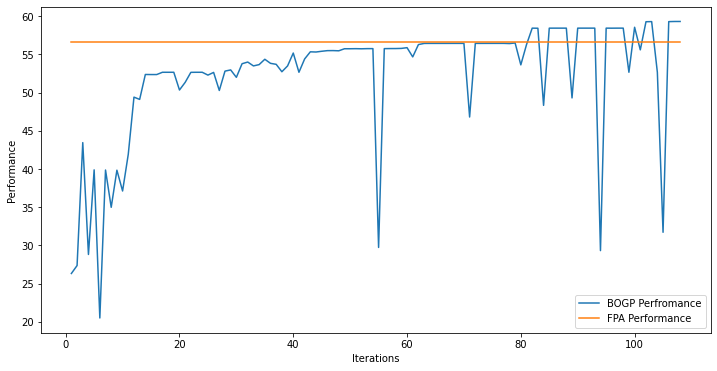

x_next is [ 25.65094349  29.99999999  29.99997469  21.30733089  29.99999999
  29.99999998  30.          29.99998627  29.99978985  19.90827828
 -23.36646946  29.99999999  29.99999997 -30.22821306 -21.44097845
  24.37374405 -30.99993534  30.          23.9035083   30.        ]
f()=59.291598, actual=59.291
107


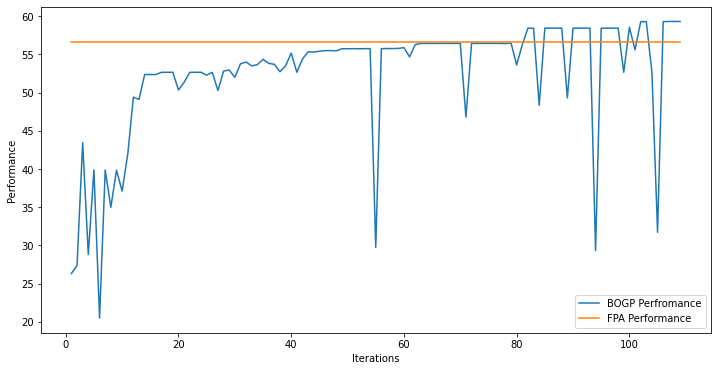

x_next is [ 25.62956581  29.99999998  29.99999987  21.30515919  29.99999999
  29.99999999  30.          29.99999991  29.99999998  19.89042999
 -23.37956985  29.99999983  29.99999998 -30.23408009 -21.43666474
  24.37281865 -30.99999979  29.99999998  23.8983261   29.99999996]
f()=59.291505, actual=59.292
108


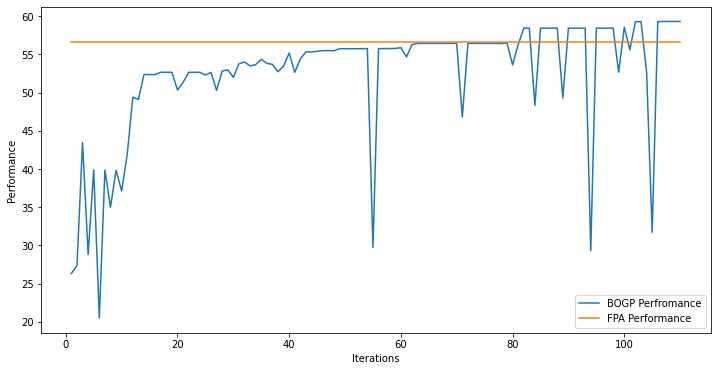

x_next is [-30.72078341   4.67389022  27.33329035  19.66118511  12.91492867
  19.53368022   1.69855886 -20.91540807  12.0895009  -18.52589654
  -0.99067723  20.19403911 -22.0740571   28.50710437   5.91413547
  22.08253124 -11.63960743   5.74746642  25.73091737 -23.65332804]
f()=52.423964, actual=33.569
109


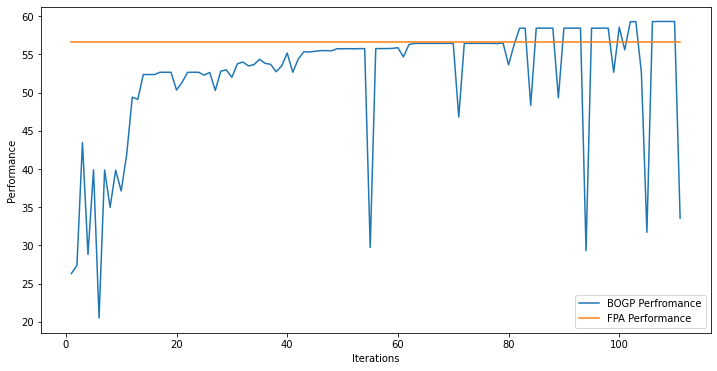

x_next is [ 25.38124539  29.99999996  29.99985025  21.15525174  29.99999996
  29.99999994  29.99999996  29.99999983  29.99999984  20.11693299
 -23.64723012  29.99999979  29.9999999  -30.46059451 -21.43023676
  24.32197398 -30.99996359  29.99999992  24.01685802  29.99985305]
f()=59.298522, actual=59.294
110


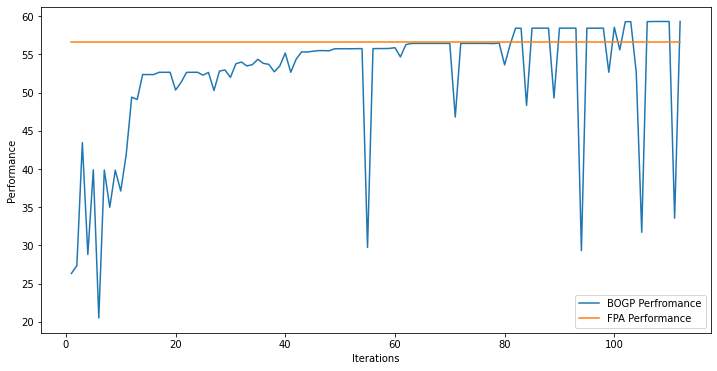

x_next is [  3.23393174  15.70585132  -2.33775876  -7.16811296   5.55444273
 -19.34833396   2.3352932   28.60045105   4.73020185  21.4347572
  27.41213846 -29.55300924  -2.63911054 -15.97112397  11.09170894
 -28.27894393  18.87894662 -18.20157819  17.81242303  21.35136843]
f()=52.316514, actual=32.209
111


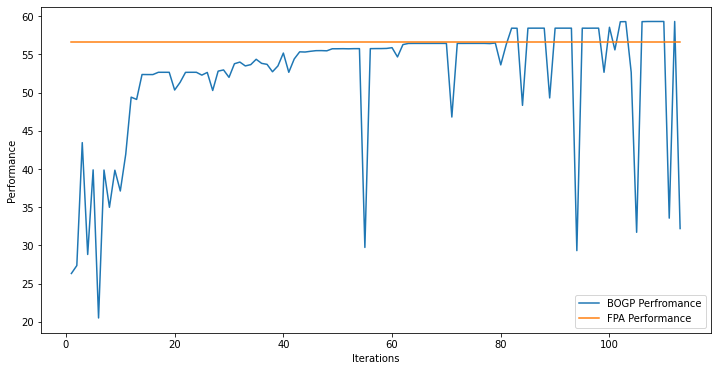

x_next is [ 20.25003537   2.84821064 -22.49487781 -12.16416344 -22.67775817
 -30.52027649  -6.53464523  -3.92866498  -7.89818177   5.3354204
 -10.01637735 -13.30791543 -16.09365598 -30.4756495  -20.76606272
 -12.43878061 -27.75496678   0.03510281  -8.09087852 -29.92304787]
f()=51.683671, actual=16.303
112


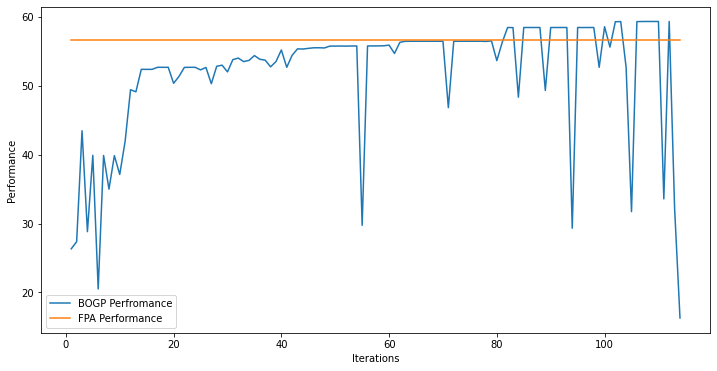

x_next is [ 25.44709863  29.99999999  29.99995517  21.12285643  29.99999999
  29.99999999  30.          29.99994184  29.99994246  20.03492428
 -23.51048944  29.99996136  29.99995842 -30.31894775 -21.37042723
  24.34289007 -30.99999987  29.99999998  24.00029595  29.99979983]
f()=59.295493, actual=59.300
113


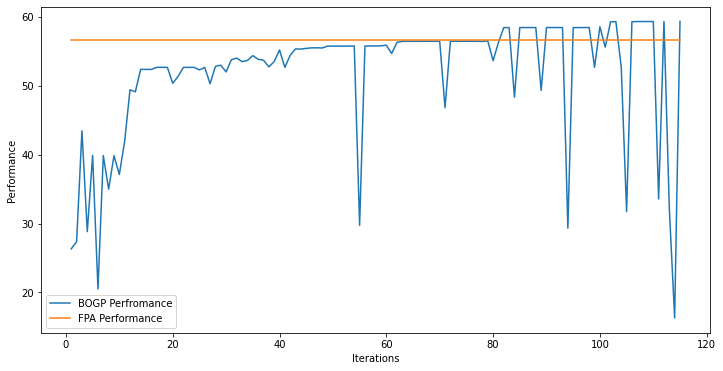

x_next is [ 27.5511423    3.34336189  20.65335087  -4.52052186 -21.14770098
 -25.32701778  -7.94709379 -22.82047599 -25.68607601   7.60990552
 -30.15623405 -17.2052437    2.09054535 -28.8771636  -15.95347608
  17.26501225   3.52354445  23.66269409  19.68281688   1.90350828]
f()=51.886898, actual=31.646
114


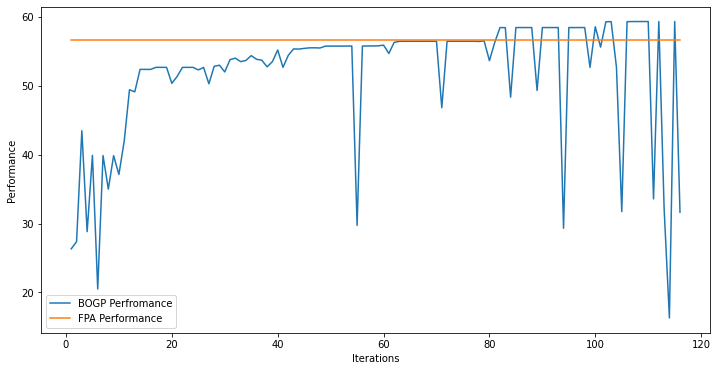

x_next is [ 25.1880696   29.99999997  29.99959153  20.77193377  29.99998611
  29.99999996  29.99999999  29.99989313  29.99999995  20.05104133
 -23.2482192   29.99999997  29.99984649 -29.94259304 -21.03569631
  24.27828744 -30.99994097  30.          24.28412808  29.99999997]
f()=59.314395, actual=59.312
115


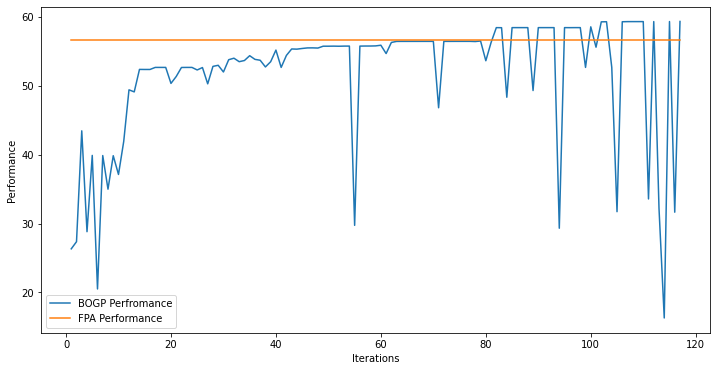

x_next is [ 25.23834631  29.99999991  29.99999976  20.77114928  29.99999993
  29.99996084  29.99999997  29.99999987  29.99999989  20.03996209
 -23.28127427  29.99999991  29.99999985 -29.99920596 -21.08690974
  24.30413398 -30.99995819  29.99999997  24.21748705  29.99989478]
f()=59.311900, actual=59.315
116


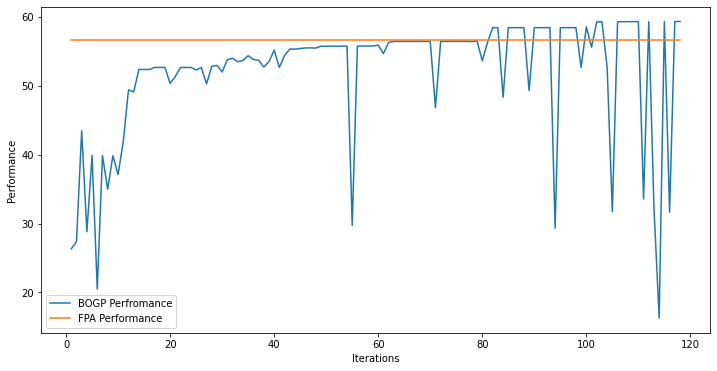

x_next is [ 25.39464987  29.99999996  29.99999969  20.25401786  29.99999997
  29.9999484   29.99999997  29.99991348  29.99999993  19.96231238
 -23.2731982   29.99999994  29.99999996 -30.09382812 -21.21823373
  24.28155697 -30.99999973  29.99999998  23.85440959  29.99994371]
f()=59.328658, actual=59.347
117


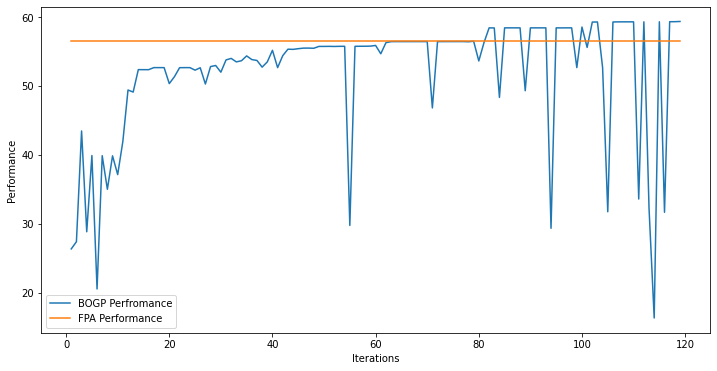

x_next is [ 25.45004564  30.          29.99985488  19.79838168  30.
  29.99999996  30.          29.99999995  29.99999998  19.95163588
 -23.17878029  29.99999999  29.99999999 -30.08715079 -21.36379365
  24.08334308 -30.99999972  30.          23.560639    29.99999997]
f()=59.355221, actual=59.354
118


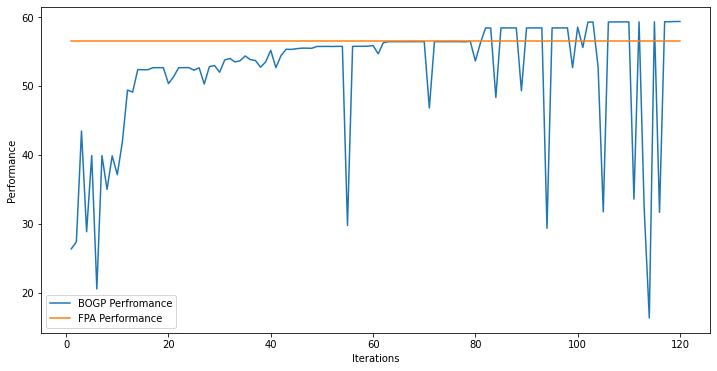

x_next is [ 25.46017862  29.99999938  29.99995323  19.82878519  29.99999998
  29.99999982  29.99978577  29.99999985  29.99999     19.93828172
 -23.19525701  29.99992256  29.99957048 -30.10187917 -21.3322786
  24.11290767 -30.99981734  29.99999998  23.59615664  29.99999996]
f()=59.354054, actual=59.355
119


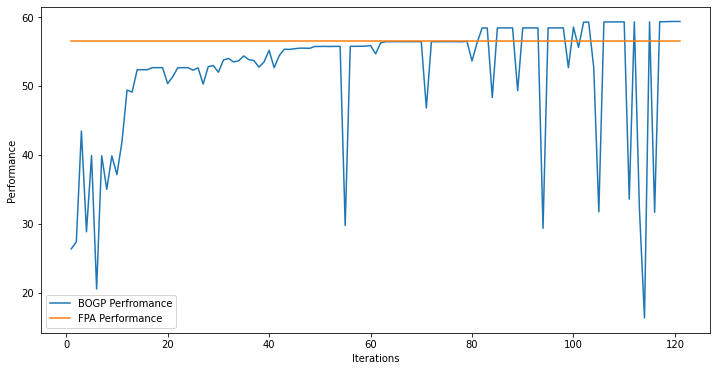

x_next is [ 17.15792371 -12.50325097  14.57079292   8.4105675   26.53585512
  28.50318029  -2.38943495 -22.72015811  27.57784894 -20.23389309
  21.99914827 -22.20151056  20.89046672  25.32064095   3.95704419
 -21.70680611  -1.79116534  13.71306392  -0.96941423   2.93655148]
f()=52.027218, actual=36.524
120


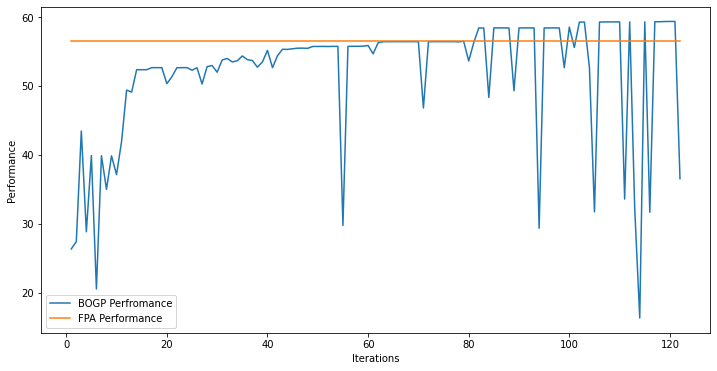

x_next is [ 25.57979564  29.99999995  29.99997909  19.75849269  29.99999998
  29.99999998  29.99999995  29.99999992  29.99994907  19.81971132
 -23.19705933  29.99999989  29.99999994 -30.25169548 -21.22928773
  24.09734116 -30.9996319   29.99999999  23.71802063  29.99999992]
f()=59.356641, actual=59.358
121


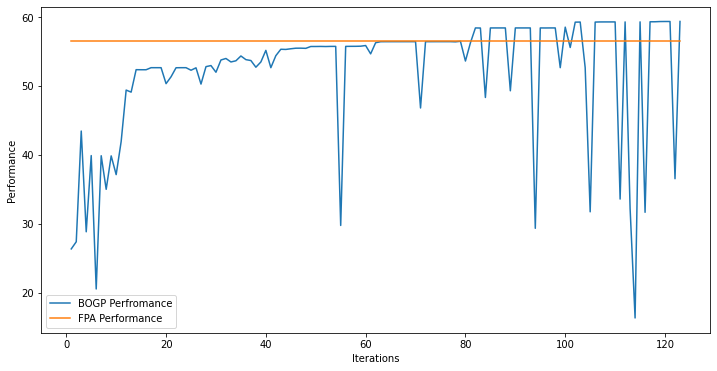

x_next is [ 25.62263033  29.99999995  29.99999993  19.7109946   29.99999998
  29.99999996  29.99999997  29.99999989  29.99999808  19.77648614
 -23.14670458  29.99999993  29.99999994 -30.33821097 -21.21548562
  24.04363114 -30.99997334  29.99994539  23.76906114  29.99999996]
f()=59.358603, actual=59.358
122


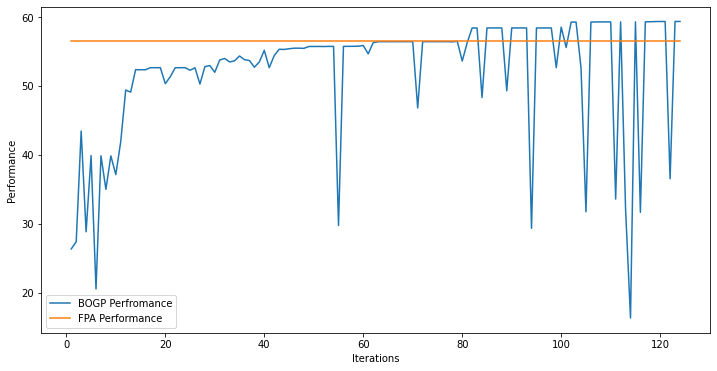

x_next is [ 25.63226945  29.99999996  29.99999987  19.70841276  29.99999998
  29.99999997  29.99999998  29.99999972  29.99994433  19.76869556
 -23.19546655  29.99999993  29.99999998 -30.29842141 -21.22545974
  24.05509842 -30.99982688  29.99999998  23.77150332  29.99996645]
f()=59.358481, actual=59.359
123


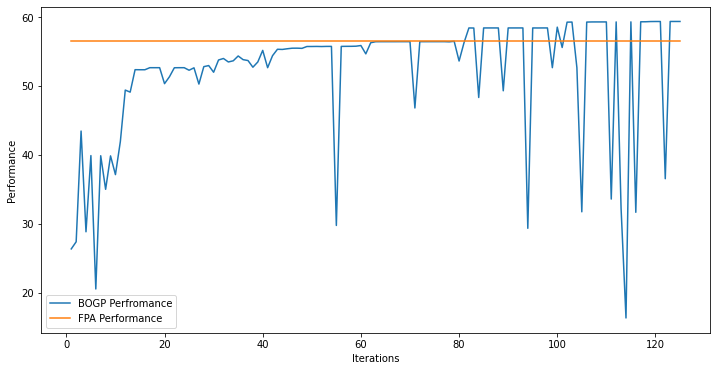

x_next is [ 25.65519004  29.99999999  29.99999991  19.68818446  29.99999999
  29.99999998  29.99999997  29.99999996  29.99999994  19.74546282
 -23.23431361  29.99999995  29.99999999 -30.26526257 -21.26855504
  24.03911404 -30.99999967  30.          23.80830279  29.99999995]
f()=59.358850, actual=59.359
124


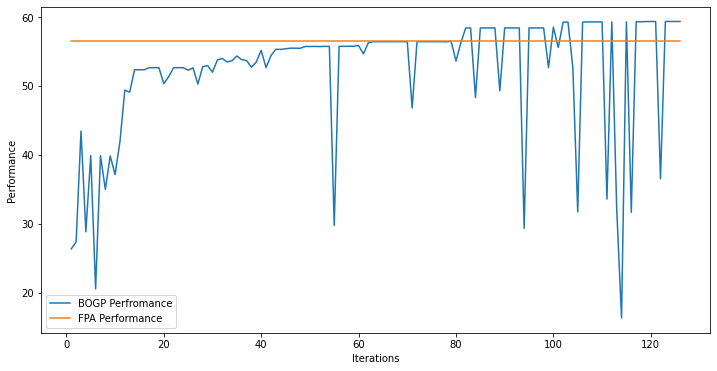

x_next is [ 25.65578096  29.99999998  29.99997532  19.68993469  29.99999996
  29.99999997  29.99999996  29.99979715  29.99999996  19.74668703
 -23.24554336  29.99999996  29.99976033 -30.27979619 -21.21121844
  24.04714392 -30.99995032  30.          23.77802932  29.99995617]
f()=59.358757, actual=59.359
125


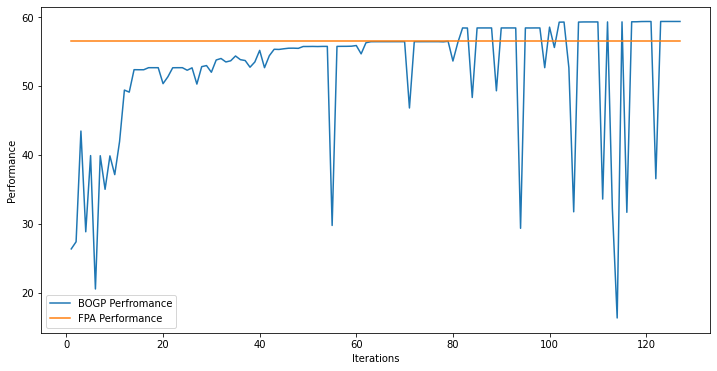

x_next is [ 25.65966401  29.99999997  29.99999988  19.66362661  29.99999998
  29.99999999  29.99999999  29.99999995  29.99999997  19.73162059
 -23.29898689  29.99999998  29.99999997 -30.27923669 -21.13581337
  24.01661674 -30.99999979  29.99999999  23.75746043  29.99999998]
f()=59.359217, actual=59.359
126


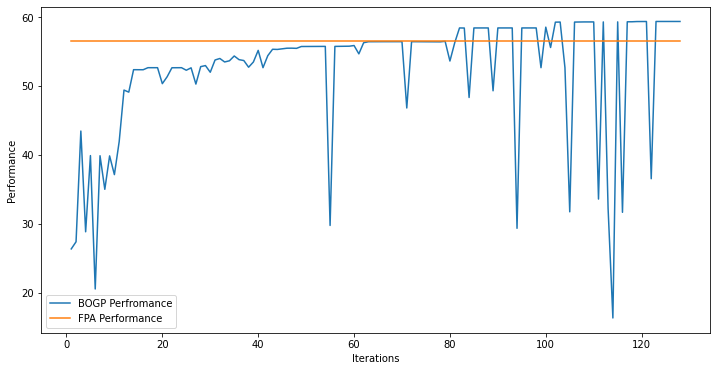

x_next is [ 25.74471608  29.99999998  29.99999997  19.70032628  29.99999999
  29.99999999  29.99999999  29.99999997  29.9999709   19.7237156
 -23.25722431  29.99999992  29.99999999 -30.28428856 -21.19211085
  24.08674625 -30.99987759  30.          23.73841823  29.99999991]
f()=59.359306, actual=59.360
127


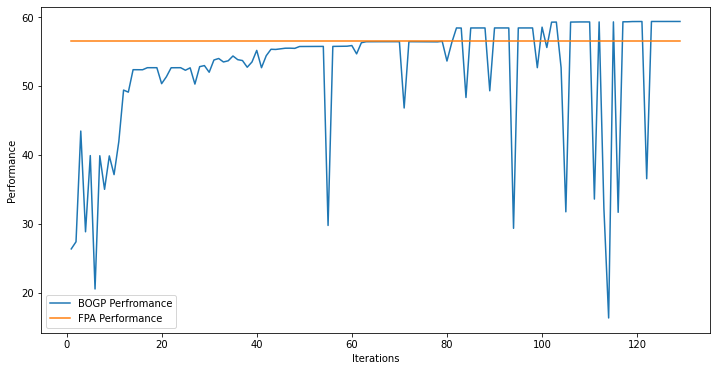

x_next is [ 22.11667881  29.99975838  29.99983058 -11.65733367  29.99996021
  29.9998976   29.99990221 -30.99989256  29.99969111  -9.52588633
 -30.99967473 -30.99973609  29.99997861 -30.99973365  29.99992923
  -0.57422029 -30.99971399  29.99988936  29.99946283  29.99999053]
f()=56.836089, actual=43.566
128


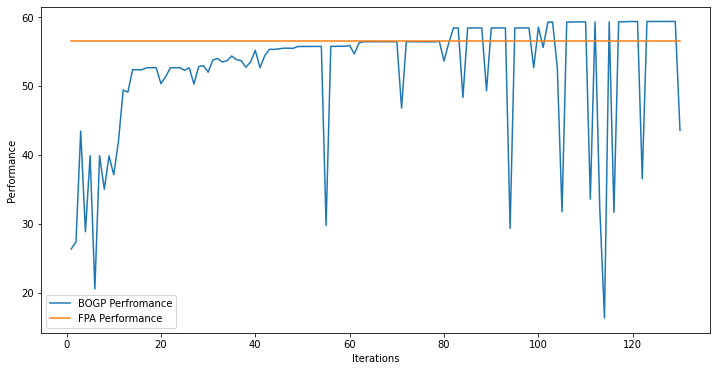

x_next is [ 25.89385881  29.99999999  29.99999997  19.71336029  29.99999999
  29.99999996  29.99999999  29.99999995  29.99999995  19.70989906
 -23.21733292  29.99999997  29.99999997 -30.27030361 -21.20104001
  24.11384424 -30.99999986  29.99999999  23.67296153  29.99999999]
f()=59.360970, actual=59.361
129


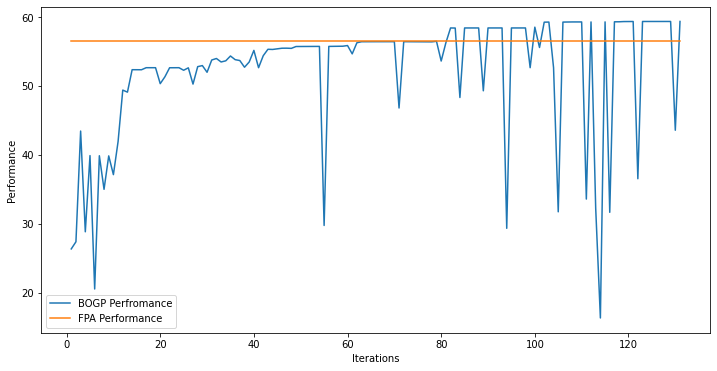

x_next is [ 25.86099515  29.99999998  29.99919933  19.71863254  29.99999998
  29.99999992  29.99999999  29.99999989  29.99985021  19.70151915
 -23.24315062  29.99999996  29.9999223  -30.29172679 -21.20540572
  24.12578491 -30.99974141  30.          23.68018803  29.99999992]
f()=59.360718, actual=59.361
130


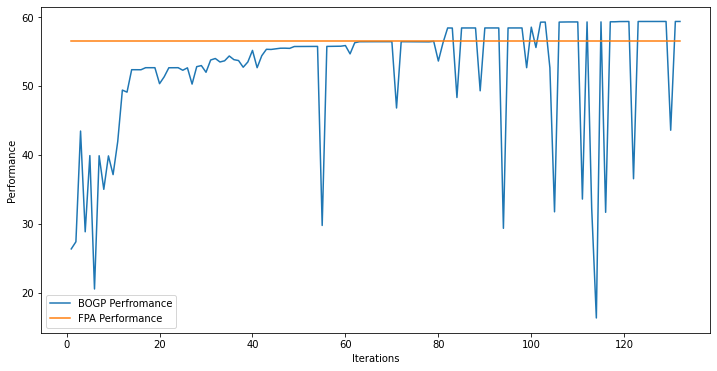

x_next is [ 25.85791419  29.99999997  29.99999994  19.72491814  29.99994563
  29.99999996  29.99999996  29.99997879  29.99987113  19.68530951
 -23.26507077  29.99997912  29.99999987 -30.32127754 -21.22426513
  24.13508134 -30.99986332  29.99999999  23.66290775  29.99999989]
f()=59.360876, actual=59.361
131


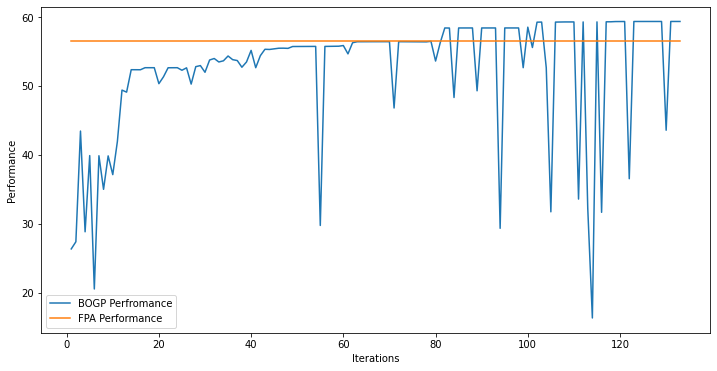

x_next is [ 25.86410155  29.99999997  29.9999999   19.72188208  29.99999999
  29.99999999  29.99999998  29.99999997  29.99984397  19.66322947
 -23.28664777  29.99999993  29.99993901 -30.37056874 -21.28494007
  24.10110151 -30.99999989  30.          23.60438018  29.99999997]
f()=59.361340, actual=59.361
132


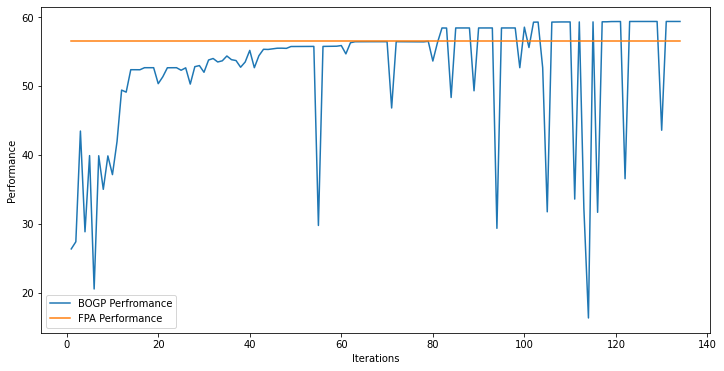

x_next is [ 29.9996646   29.99995638  29.99991856 -30.99961142  29.99988358
  29.99993532  29.99996782  29.99998077  29.99984277 -30.99999825
 -30.99959036  29.9997333   29.99953461  29.99988016 -30.99995326
  24.42494988 -30.99987073  29.99999924  29.99961299  29.99993466]
f()=56.362381, actual=54.119
133


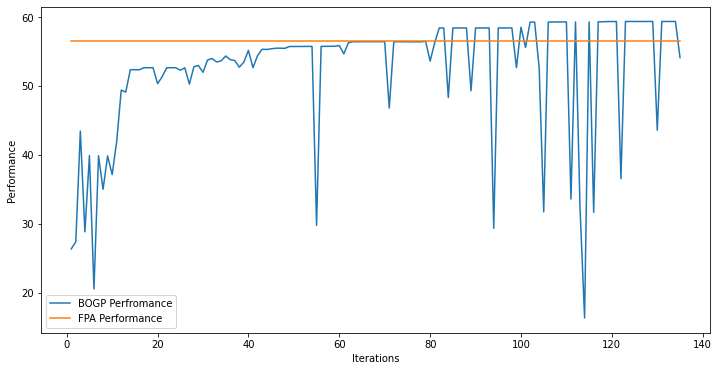

x_next is [ 25.86111036  29.99999998  29.99989939  19.73160324  29.99999995
  29.99995578  29.99999997  29.99999994  29.99993257  19.64952745
 -23.28405411  29.99999389  29.99999997 -30.34992102 -21.22938046
  24.17480204 -30.99985326  29.99999999  23.65353438  29.99999995]
f()=59.361200, actual=59.361
134


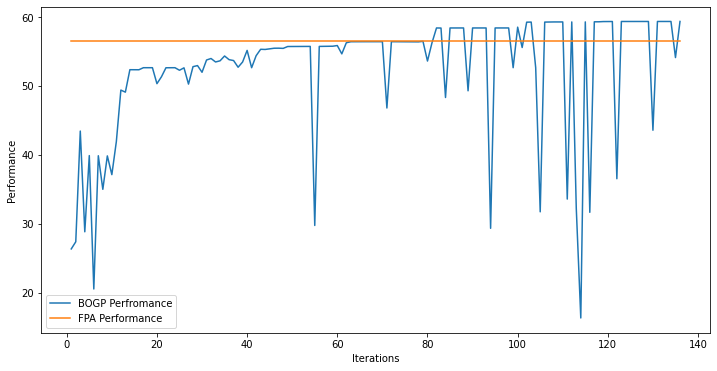

x_next is [ 25.85346094  29.99999999  29.99999979  19.72518541  29.99999998
  29.99999998  29.99999998  29.99999996  29.99999993  19.58815287
 -23.27118409  29.99999995  29.99999996 -30.3445422  -21.21981905
  24.2045766  -30.99999976  29.99999999  23.64923086  29.99999998]
f()=59.361560, actual=59.362
135


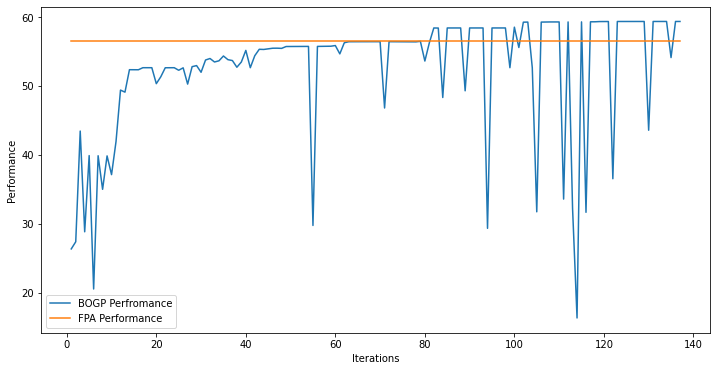

x_next is [ 25.85512365  29.99999998  29.99999993  19.72530893  29.99999997
  29.99997274  30.          29.99999996  29.99999997  19.59363653
 -23.27420354  29.99999994  29.99999999 -30.34757025 -21.22035954
  24.20590046 -30.99980418  30.          23.65036999  29.99996063]
f()=59.361522, actual=59.362
136


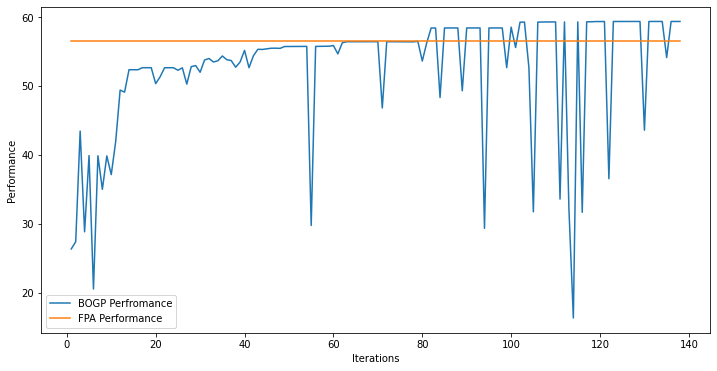

x_next is [ 25.87573645  29.99999995  29.99995237  19.65411081  29.99999996
  29.99999992  29.99999997  29.99999995  29.99999992  19.62618959
 -23.28815871  29.99996842  29.99993257 -30.39415083 -21.22909953
  24.25198147 -30.99999968  29.99999999  23.66300646  29.9999999 ]
f()=59.361975, actual=59.361
137


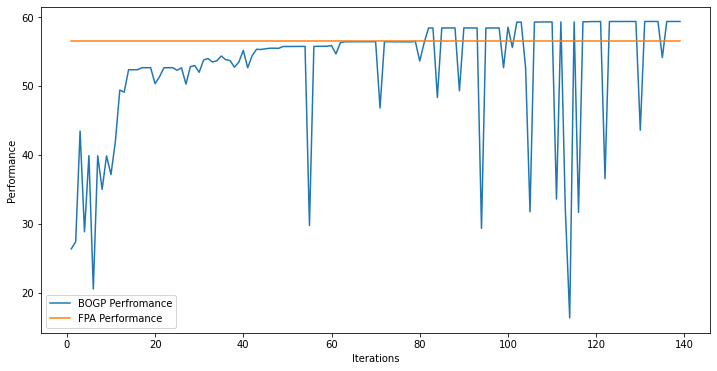

x_next is [ 26.24729475  29.99999997  29.99999999  19.787216    30.
  30.          30.          30.          30.          19.80507058
 -22.64035965  30.          30.         -30.14784894 -22.2552048
  22.94781913 -31.          30.          24.07315978  30.        ]
f()=59.400592, actual=59.310
138


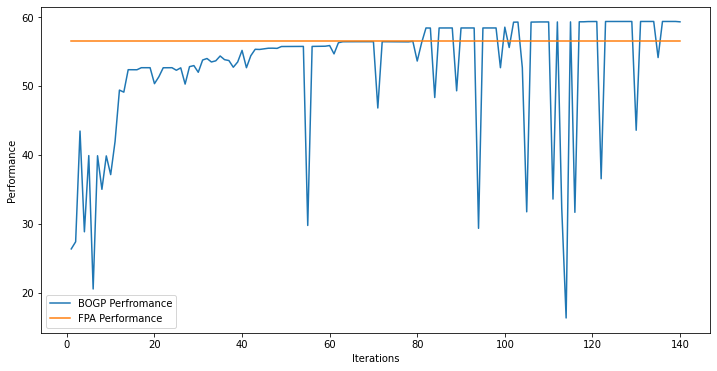

x_next is [ 25.87206654  29.99999995  29.99999996  19.74536112  29.99999998
  29.99999995  29.99999998  29.99999994  29.99999994  19.59742405
 -23.304849    29.99999996  29.99999997 -30.37836795 -21.20711473
  24.24061721 -30.99999957  29.99999999  23.66922942  29.99999995]
f()=59.361716, actual=59.362
139


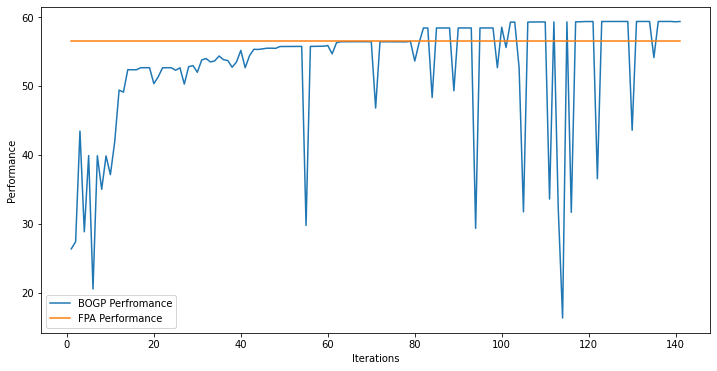

x_next is [ 26.2628068   28.60394295  26.85260065  24.29468202  23.60855836
  26.85703632  27.43113792  26.76052038  27.5123493   18.78507586
 -19.12467695  24.76398666  29.59325102 -30.19022456 -27.84260838
  25.79106848 -24.46711314  29.65085655  21.67506668  26.53369958]
f()=52.756477, actual=56.960
140


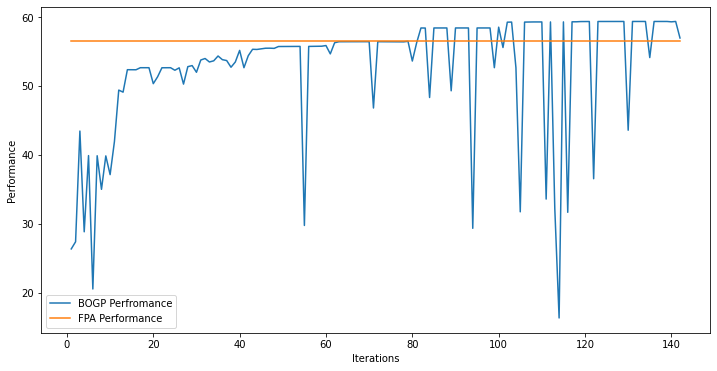

x_next is [ 29.9997409  -30.99152858  29.99803115 -30.99721087  29.99824743
  29.99991293  29.99922017  29.99913544  29.99601438  29.99923165
  29.99935933  29.99931999  29.99993226 -30.99813805 -30.99627722
  29.99991589 -30.99803605  29.9981978  -30.99940083  29.99903026]
f()=69.061722, actual=45.902
141


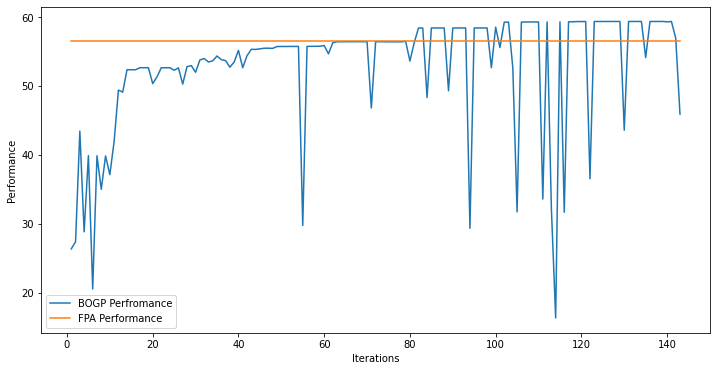

x_next is [ 28.13610144  29.99933239  29.99977174  15.49158889  10.79899436
  16.61814589  29.99919169  29.99929117  29.99865921  18.96318356
 -18.28292366  29.99984163  29.9994419  -30.99538684 -30.98571787
  19.37574119 -30.99997724  29.99993911  25.25884186  29.99882102]
f()=60.068557, actual=54.362
142


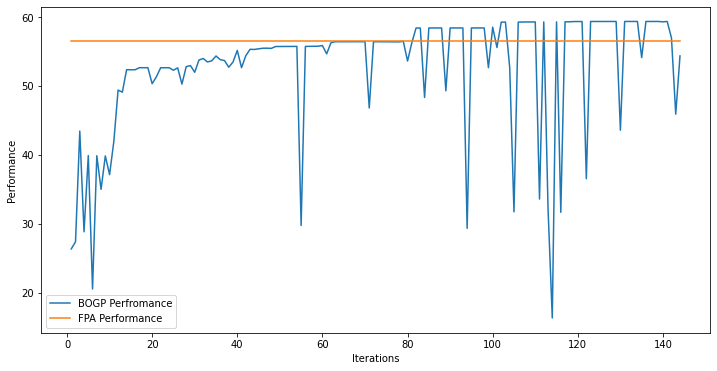

x_next is [ 25.90471599  29.99999989  29.99976904  19.66032467  29.77922381
  29.99999989  29.99999984  29.99999966  29.99999976  19.60965202
 -22.94455314  29.99999929  29.99999984 -30.28402795 -21.5772083
  23.83809385 -30.28988434  29.99999997  23.58766562  27.48814901]
f()=59.456590, actual=59.741
143


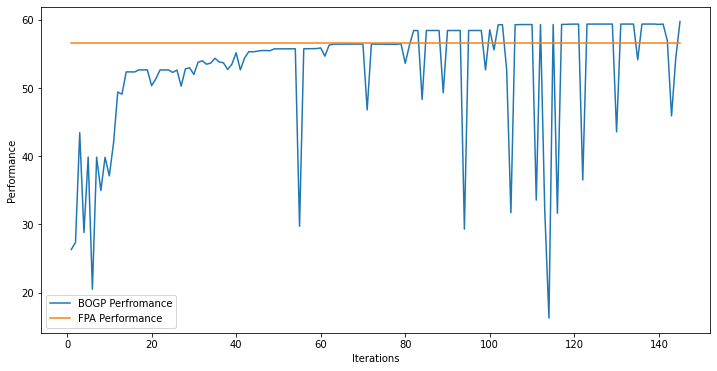

x_next is [ 26.18524966  29.99997873  29.99983891  18.87240528  29.99973782
  29.99989361  29.99998166  29.99991001  29.99985818  19.35609478
 -22.00170317  29.99996621  29.99999991 -30.11184605 -22.83718314
  22.48651893 -29.73072345  29.99999999  23.39322709  21.40839192]
f()=60.028421, actual=59.407
144


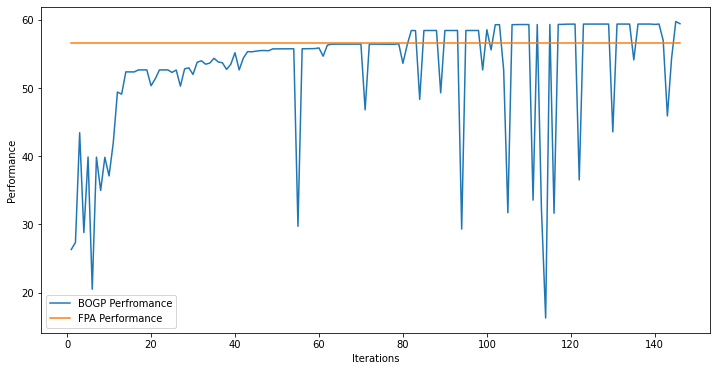

x_next is [ 25.89492843  29.99999994  29.99999986  19.72064397  28.6298613
  29.99999994  29.99999999  29.9999998   29.9999998   19.58028402
 -22.96632518  29.99999988  29.99999987 -30.29099497 -21.42463575
  23.75765634 -29.48494137  29.99999999  23.51593052  25.94006314]
f()=59.831239, actual=59.860
145


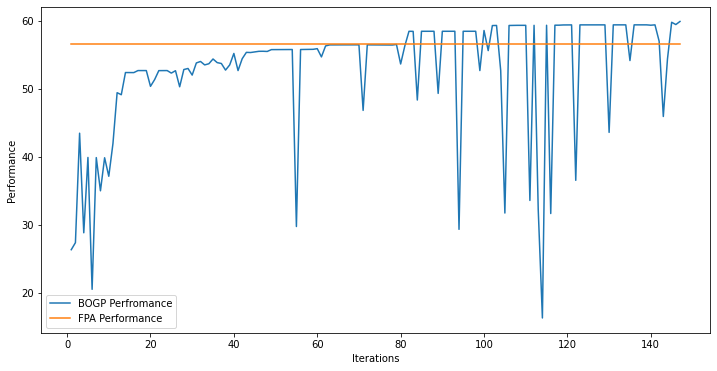

x_next is [ 25.89960101  29.99999994  29.99999981  19.70786916  28.0256108
  29.99999992  29.99999996  29.9999999   29.99999981  19.57433128
 -22.94009539  29.99995385  29.99999994 -30.29342335 -21.41964122
  23.7029485  -29.31998604  29.99999999  23.48512318  25.85467234]
f()=59.866142, actual=59.883
146


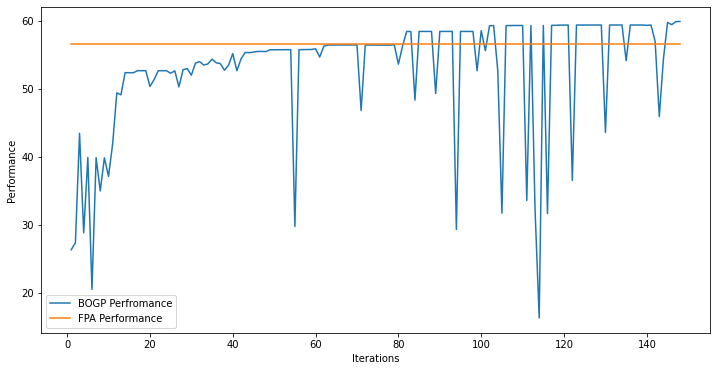

x_next is [ 25.90771474  29.99999991  29.99999984  19.6396844   27.02870996
  29.99999993  29.99999996  29.99999973  29.99999997  19.54800161
 -22.82517784  29.99992194  29.99989055 -30.28282583 -21.54604136
  23.57163875 -29.5746299   29.99999999  23.44119925  25.81534041]
f()=59.901822, actual=59.890
147


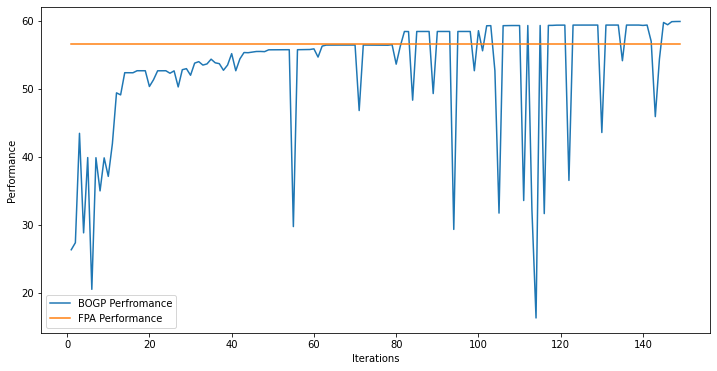

x_next is [ 25.93204115  29.99999976  29.99996602  19.60862375  27.20990471
  29.99999981  29.99996192  29.99987625  29.9998301   19.54227413
 -22.80484786  29.99993069  29.99999985 -30.28440454 -21.54524507
  23.55009734 -29.03728404  29.99999994  23.41944959  25.88052417]
f()=59.895710, actual=59.898
148


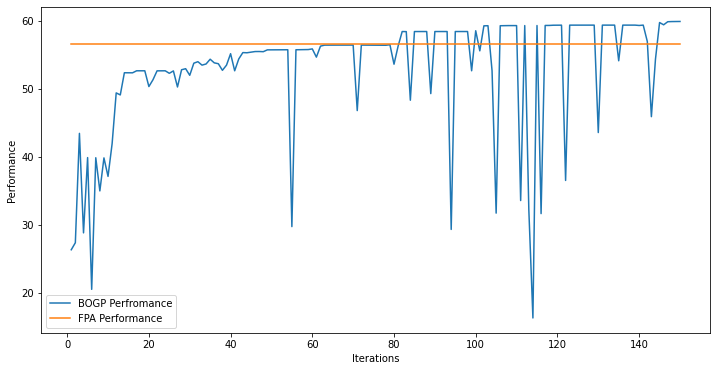

x_next is [ 25.95969046  29.99999987  29.9999893   19.55030606  27.14539116
  29.99989557  29.99997555  29.99999976  29.99999969  19.5287768
 -22.72581712  29.99998011  29.99999991 -30.27029035 -21.61148926
  23.47940069 -28.86492053  29.99999997  23.3938984   25.88931375]
f()=59.899156, actual=59.904
149


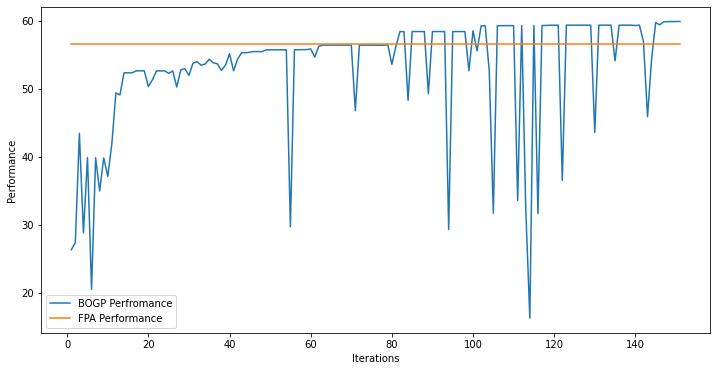

x_next is [-18.78157802  27.56036236   0.714538   -12.2414278   -8.30708481
 -27.86697302  -3.54796659 -13.04318721  20.94852626   3.85838104
   9.21199854 -28.51431581  28.12350412   3.78377662  -0.77842089
   2.22852786  26.55721711 -20.96225008 -10.3803281   23.7630526 ]
f()=53.076345, actual=28.967
150


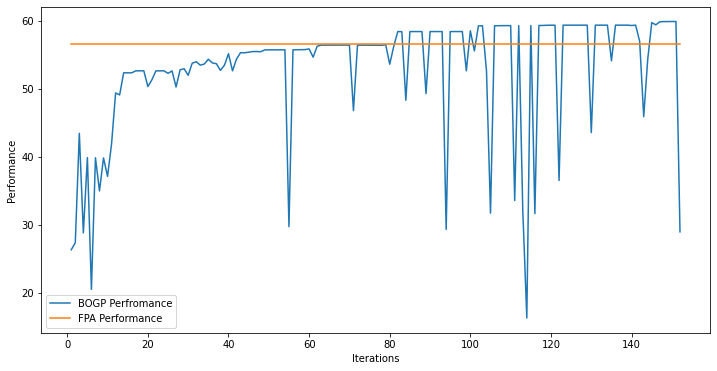

x_next is [ 26.13381783  29.99999999  29.99996582  19.23530175  26.9437205
  29.99999993  29.99999993  29.9999997   29.99999977  19.48145966
 -22.17886185  29.99985392  29.99999996 -30.13803118 -22.06424334
  23.10536324 -28.51679086  29.99999997  23.27160855  25.76117394]
f()=59.915604, actual=59.919
151


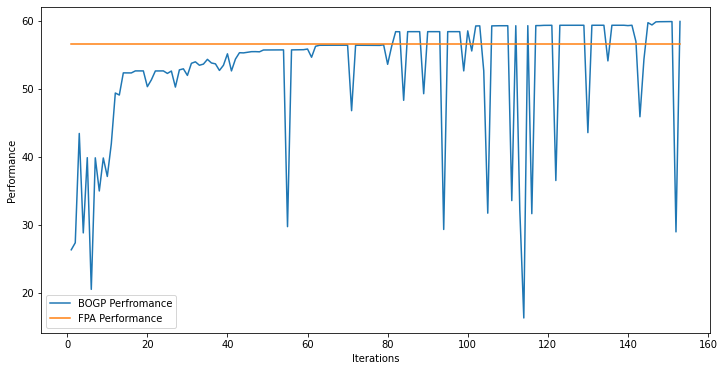

x_next is [ 26.17005265  29.99999989  29.99999983  19.19162245  26.90413068
  29.99999991  29.99999983  29.99995945  29.99993265  19.48244367
 -22.0601227   29.99997525  29.99983705 -30.10357052 -22.15686501
  23.05705444 -28.47268424  29.99999997  23.25290386  25.72241949]
f()=59.919358, actual=59.918
152


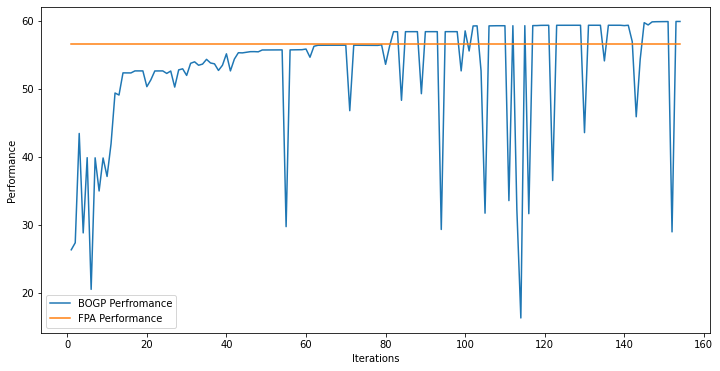

x_next is [ 26.11624535  29.99999995  29.99999984  19.17420308  27.0119646
  29.99999995  29.99999994  29.99999991  29.9999999   19.44490115
 -22.25758014  29.99993733  29.99999995 -30.18898365 -22.04204922
  23.0262557  -28.56433804  29.99999998  23.25381231  25.78026298]
f()=59.919610, actual=59.931
153


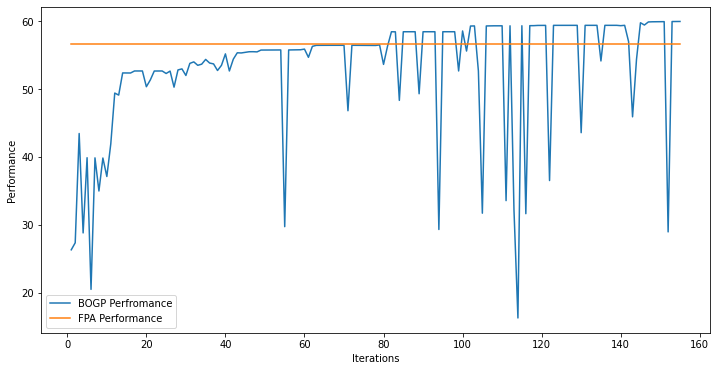

x_next is [ 26.05304848  29.99999992  29.99999986  18.41915748  26.966621
  29.99999992  29.99999993  29.99970468  29.99999972  18.99006939
 -22.73657609  29.99981232  29.99999994 -30.73590344 -22.23197644
  22.11530717 -28.53522004  29.99999999  22.89189266  25.62761151]
f()=59.979855, actual=59.984
154


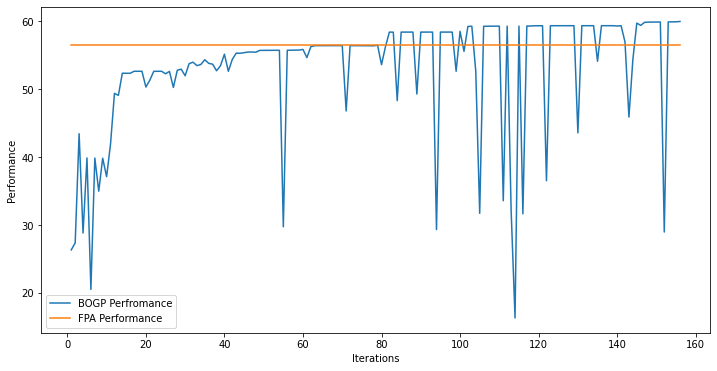

x_next is [ 26.05226436  29.99999994  29.99999979  18.37904486  26.91581549
  29.99999995  29.99988846  29.9999999   29.99983851  18.95728131
 -22.7691763   29.99988936  29.99999992 -30.78410612 -22.26412773
  22.06807367 -28.48878078  29.99999998  22.85656511  25.59354475]
f()=59.983750, actual=59.982
155


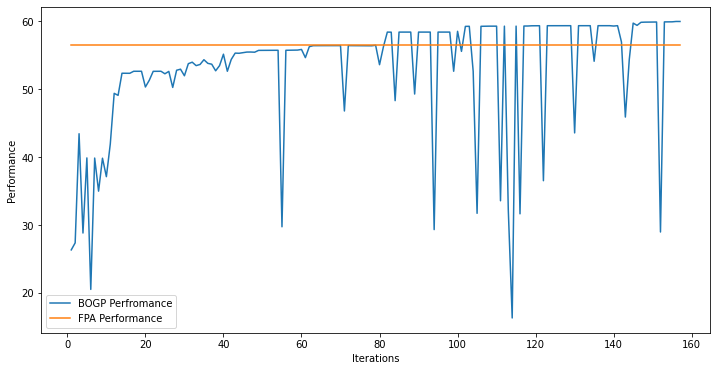

x_next is [ 26.01155844  29.99999824  29.99999764  18.40363803  27.07170835
  29.99999835  29.99999821  29.99999745  29.99982191  19.03187709
 -22.72457142  29.99995331  29.99998125 -30.65629676 -22.11763405
  22.1113156  -28.63770122  29.99973644  22.9758567   25.7142518 ]
f()=59.984736, actual=59.993
156


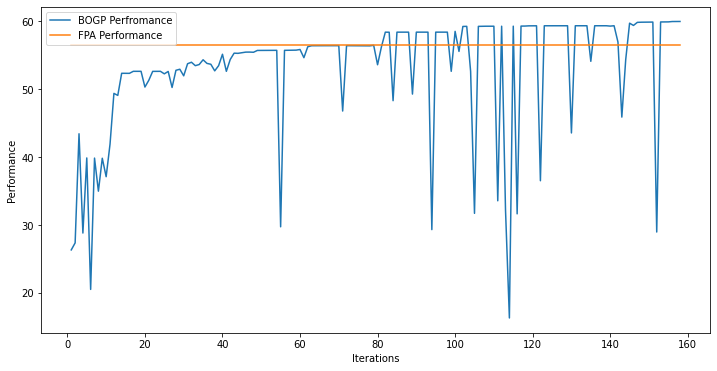

x_next is [ 25.68939187  29.99999989  29.99982131  17.85866148  26.89293215
  29.99999994  29.99999998  29.99998863  29.99995116  19.07491822
 -22.64456827  29.99999993  29.99998839 -30.32193694 -21.4832208
  21.59661537 -28.53469433  29.99999994  23.3670785   25.63090843]
f()=60.021339, actual=60.027
157


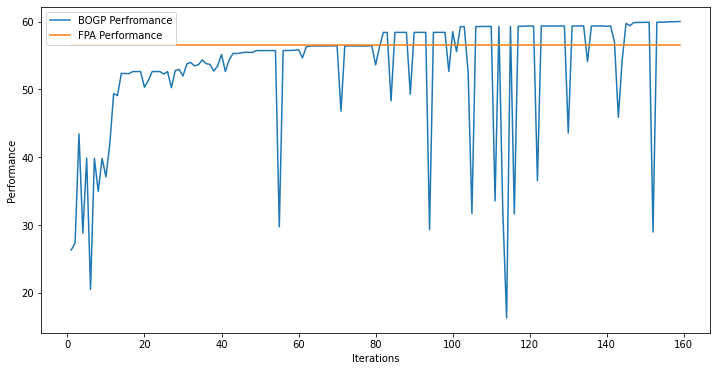

x_next is [ 25.66358929  29.99995474  29.99999988  17.79865356  26.81867512
  29.99994201  29.99999992  29.99999981  29.9998121   19.07294871
 -22.60928462  29.99990428  29.99999993 -30.27977217 -21.39487093
  21.5279485  -28.47076431  29.99999996  23.40812132  25.56584372]
f()=60.027144, actual=60.027
158


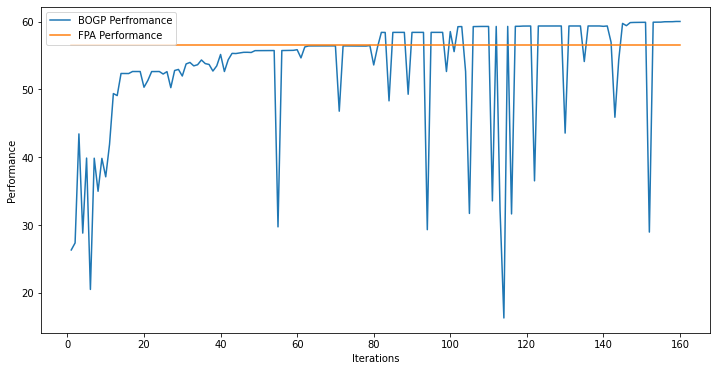

x_next is [ 25.65026059  29.99995661  29.99999963  17.82014346  26.87101708
  29.99999993  29.99999992  29.99999952  29.99999988  19.09336992
 -22.64543049  29.99991362  29.99999997 -30.28506535 -21.45908536
  21.57101148 -28.51741692  29.99999999  23.41044689  25.61329845]
f()=60.026832, actual=60.029
159


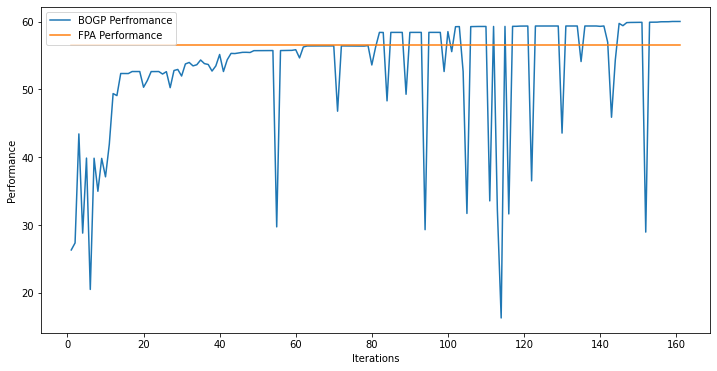

x_next is [ 25.11443771  29.99999977  29.99999991  17.54425398  26.71459963
  29.99999994  29.99999984  29.99999985  29.99999982  19.37594824
 -23.0036787   29.99999989  29.99999995 -29.93837122 -22.14748736
  21.481864   -28.35810928  29.99999998  23.79759283  25.48683001]
f()=60.057225, actual=60.057
160


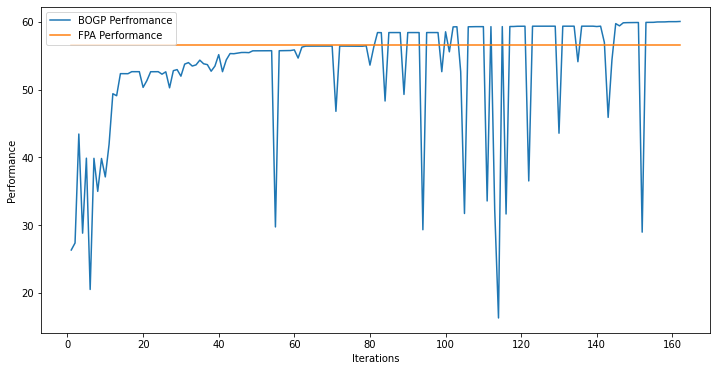

x_next is [ 25.12012458  29.99999988  29.99999974  17.54876933  26.7218821
  29.99999987  29.9999899   29.99994471  29.99996924  19.37646767
 -22.99856153  29.99997     29.99999986 -29.94646472 -22.13393634
  21.48836526 -28.36505947  29.99999997  23.79438452  25.4928904 ]
f()=60.056644, actual=60.057
161


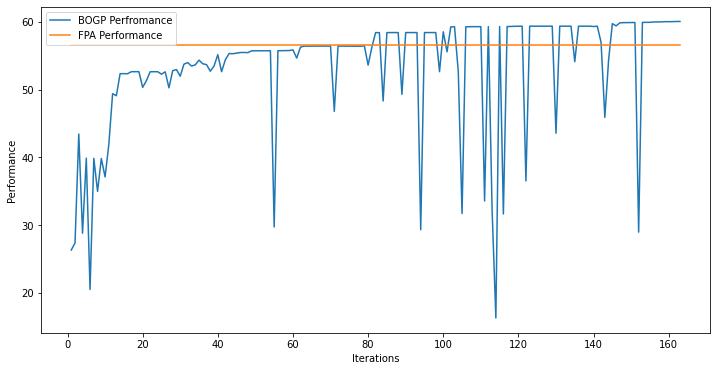

x_next is [ 25.11588592  29.99999992  29.99999987  17.55555136  26.74086048
  29.99999996  29.99999991  29.99999969  29.99984549  19.4121217
 -22.9851792   29.99985387  29.99999995 -29.99423487 -22.10685595
  21.50798152 -28.37767853  29.99999999  23.79936533  25.50237461]
f()=60.056784, actual=60.057
162


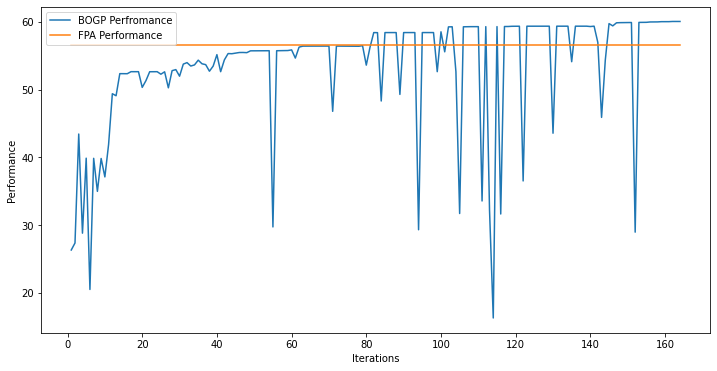

x_next is [ 25.04156798  29.99997075  29.99999979  17.52529747  26.70860822
  29.99999981  29.99999936  29.99999874  29.99987064  19.5534646
 -22.9212633   29.99989429  29.99999997 -30.15598307 -22.13173857
  21.46317149 -28.3318502   29.99999995  23.84026351  25.46198079]
f()=60.058652, actual=60.057
163


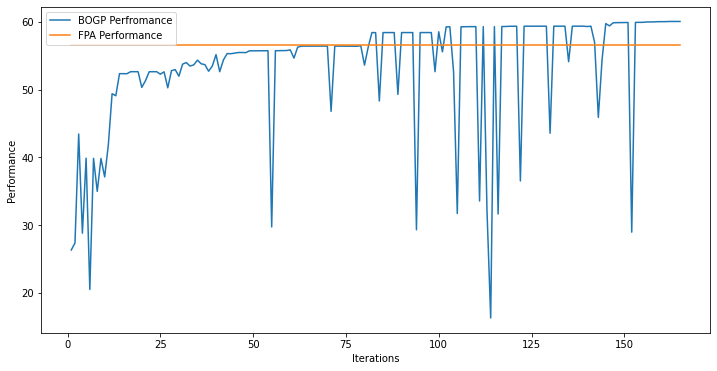

x_next is [ 25.12203258  29.99999992  29.9999114   17.53408895  26.78717895
  29.99999996  29.9999999   29.99999991  29.99985041  19.56482188
 -23.12419404  29.99944325  29.99999992 -30.04585808 -22.05137695
  21.61082439 -28.375601    29.99999998  23.8349318   25.45927862]
f()=60.058957, actual=60.059
164


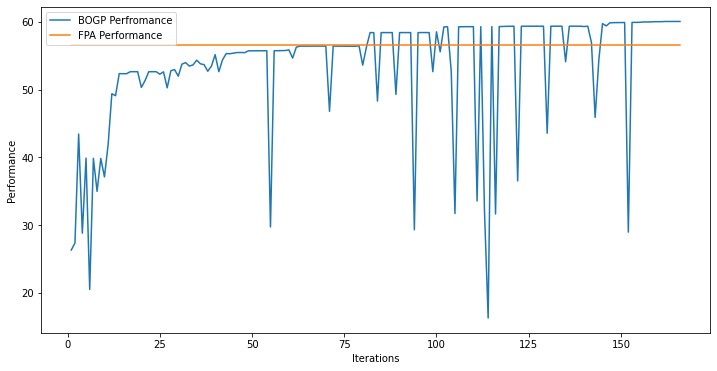

x_next is [ 25.11205482  29.99999993  29.99993251  17.53779342  26.78633036
  29.9999999   29.99999984  29.9999999   29.99999983  19.55426396
 -23.11149584  29.99991913  29.99999992 -30.04921974 -22.05585789
  21.60986299 -28.37907299  29.99999999  23.83659356  25.46338702]
f()=60.058794, actual=60.059
165


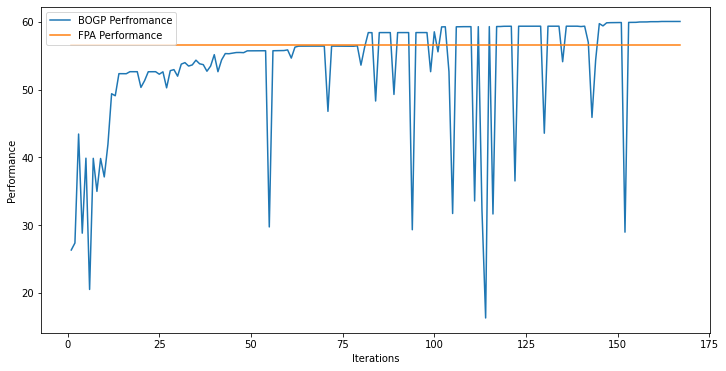

x_next is [ 29.999874    29.99981451  29.99976303 -14.4758454   29.99994763
  29.9998001   29.9999939   29.99984508  29.99971324  28.64120738
  29.99986263 -30.99999084  29.99997284 -22.82707076 -30.99991802
  -2.77191166  29.99985965  29.99974066  29.99919413  -7.7981336 ]
f()=60.337730, actual=45.537
166


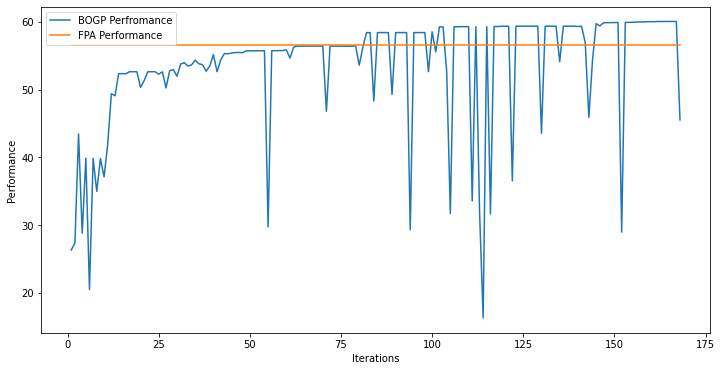

x_next is [ 24.59859224  29.99999823  29.99952687  17.52458995  26.73638154
  29.99993426  29.9999112   29.99934758  29.9999139   19.13288036
 -23.18113907  29.99994418  29.99993523 -30.27516881 -22.00488113
  21.88561681 -28.43292501  29.99990933  24.01680824  25.28454639]
f()=60.075289, actual=60.076
167


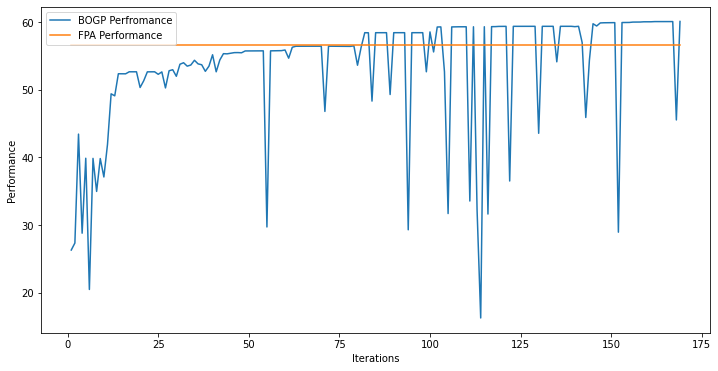

x_next is [ 24.60134428  29.99999995  29.99999992  17.51373941  26.75276741
  29.99999997  29.99999996  29.99999994  29.99986133  19.11177817
 -23.16245452  29.99995619  29.99999993 -30.27608914 -21.99736631
  21.89794444 -28.42619285  29.99999999  24.03400886  25.25228034]
f()=60.076552, actual=60.076
168


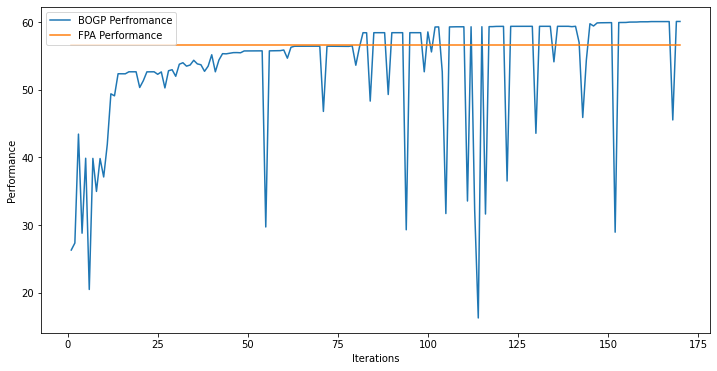

x_next is [ 24.46371674  29.99999991  29.9999999   17.58931255  26.63794748
  29.99999994  29.99999993  29.9999999   29.99999984  19.17098276
 -23.28290205  29.99999978  29.99999992 -30.27249382 -21.95290872
  21.8609348  -28.4679131   29.99999997  23.88016748  25.34966585]
f()=60.078166, actual=60.080
169


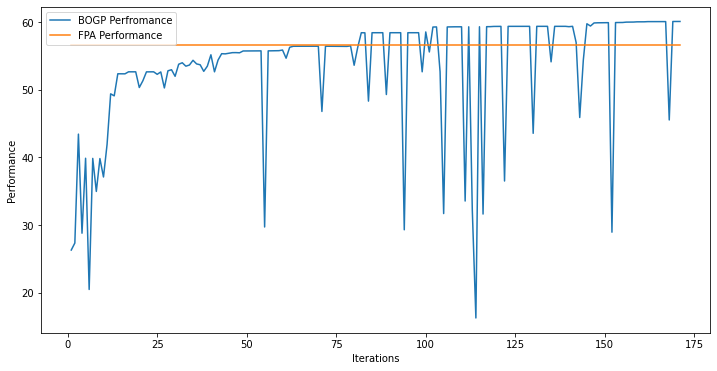

x_next is [ 30.  30.  30.  30.  30.  30.  30.  30.  30.  30. -31.  30.  30. -31.
 -31.  30. -31.  30.  30.  30.]
f()=56.291828, actual=52.646
170


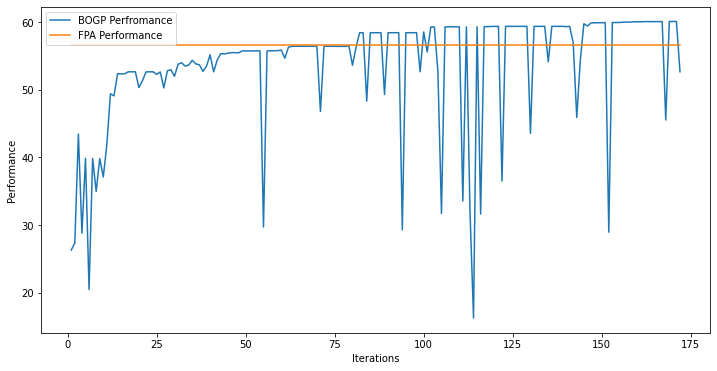

x_next is [ 29.98001614  26.76201469  30.         -17.47268579  28.73195808
  29.99999999  29.99999998  28.50228163  29.99999992 -12.42676763
 -22.53274383  18.26625174  29.99999997   5.1096856  -25.15014945
  18.81434087 -25.17359966  30.          26.0360556   17.70431237]
f()=57.784067, actual=50.449
171


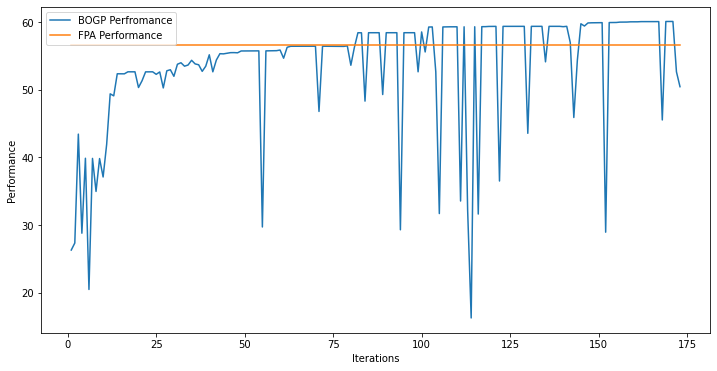

x_next is [ 29.99940941  29.9995698   29.99798054  29.99546454  29.99962684
  29.99677839  29.99971154  29.99892339  29.99940223  29.98576634
 -30.99389738  29.99987806  29.99835747 -30.99993939 -30.99747995
  29.98857841 -30.99705624  29.99521723  29.98846737  29.99722804]
f()=53.598560, actual=52.655
172


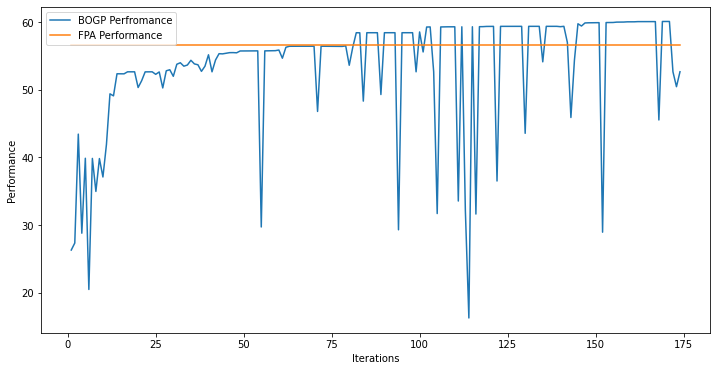

x_next is [ 24.97530475  30.          25.22297336  14.13318523  25.37041676
  26.49118646  30.          28.52349103  29.99999988  15.85766189
 -23.57000509  25.37254488  26.43080283 -28.53640269 -22.74816493
  19.22378421 -29.89650261  30.          23.27261426  26.2374452 ]
f()=61.044300, actual=59.312
173


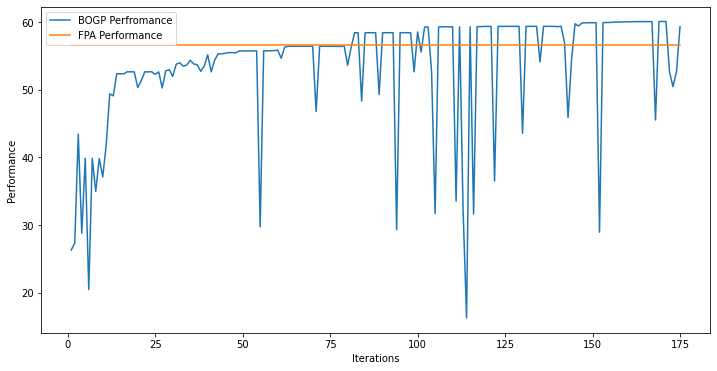

x_next is [ 24.09217161  29.99999942  28.68212408  17.0197249   26.28545485
  29.83399692  29.99999975  29.99995389  29.99982664  19.05703545
 -23.12762762  28.13425211  29.99986719 -30.11668164 -22.30804234
  21.31665257 -28.4336965   29.99999954  23.46210411  24.96992008]
f()=60.146171, actual=59.833
174


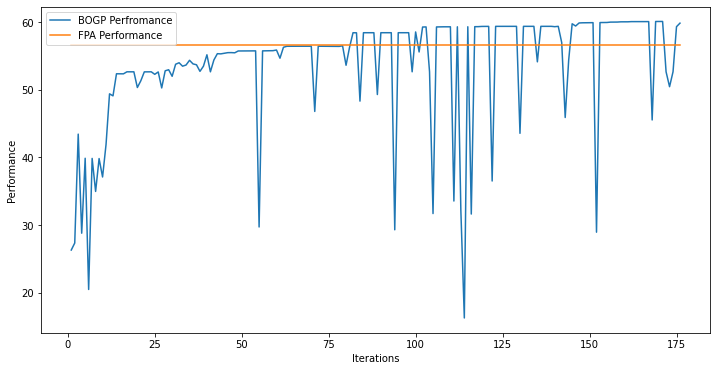

x_next is [ 29.99984445  29.9998661   29.99971747  29.9997325   29.99990362
  29.99989542  29.99997252  29.99998711  29.9993906   29.99997495
 -30.99996405  29.99992139  29.99991296 -30.99996239 -30.99980696
  29.99992007 -30.99981393  29.99993545  29.99993301  29.99998518]
f()=53.661195, actual=52.646
175


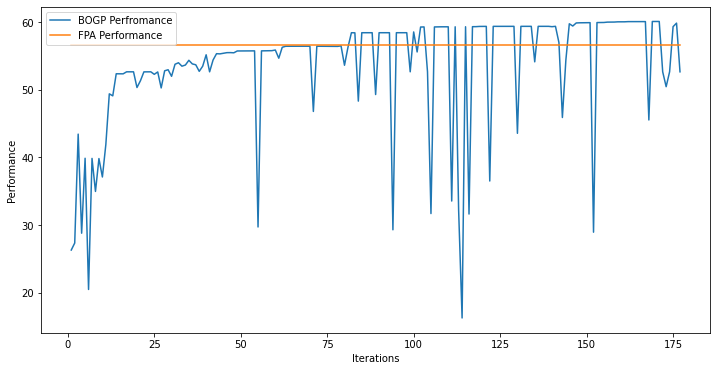

x_next is [ 24.2626827   29.99999994  29.99999934  17.33964828  26.60682161
  28.37800901  29.99999996  29.95180134  29.99985925  18.95109737
 -23.39082987  29.99999977  28.82984911 -30.12021397 -21.87833853
  21.5088556  -28.4429836   29.99999998  23.67428208  25.13295046]
f()=60.139334, actual=60.350
176


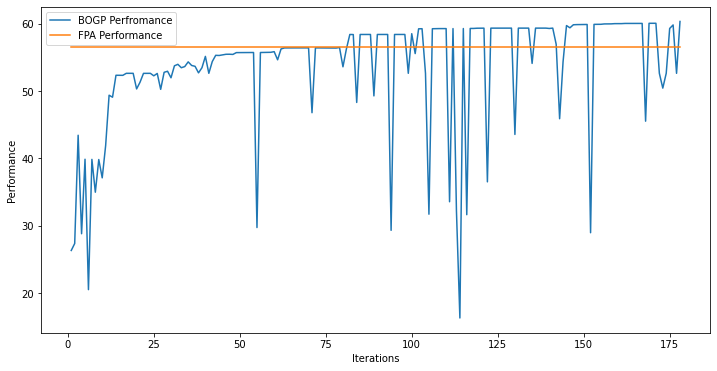

x_next is [ 24.00827505  29.99999955  29.99980828  16.90070794  26.82094358
  25.08027726  29.99980452  29.99993931  29.99972391  18.65059655
 -23.41876447  29.99993141  27.81074738 -30.00955044 -21.78653673
  21.04110172 -28.12976075  29.99999873  23.32699541  24.64456606]
f()=60.524499, actual=60.353
177


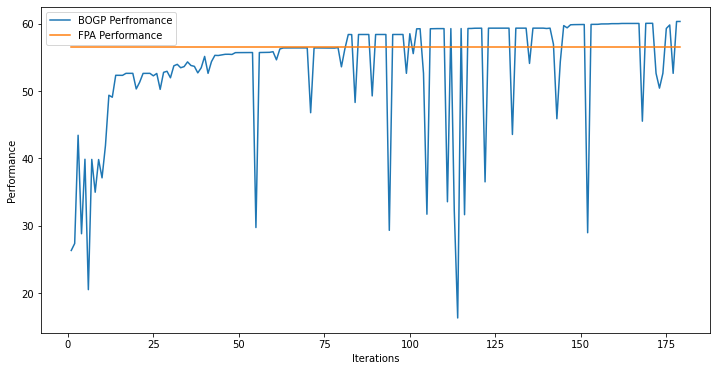

x_next is [ -3.45989638  29.99993174  29.99972236  29.99986481  29.9998563
 -30.99994343  29.9998148  -30.99945038  29.99993634  29.99754179
 -30.99917687 -30.99980804  29.99994379  29.9996765   29.9999037
  -6.32107716  29.9997726   29.99969464 -16.22865867  13.13760874]
f()=52.979059, actual=40.942
178


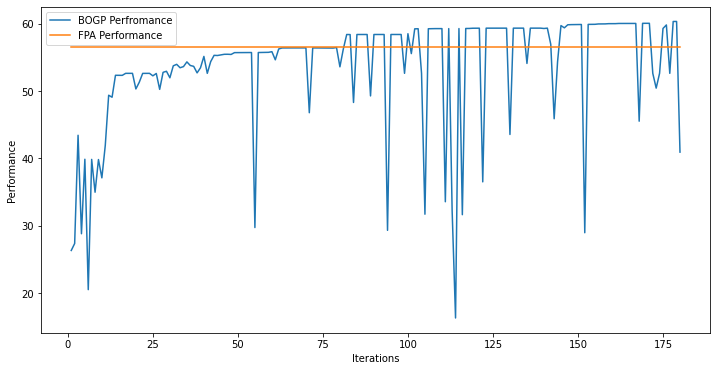

x_next is [ 24.3079343   30.          30.          17.47075927  26.48258895
  27.05775188  30.          29.51871758  30.          19.18686661
 -23.11959716  30.          25.60212666 -29.88555563 -21.94118679
  21.09073614 -28.63891289  30.          23.53601637  25.13211551]
f()=60.530978, actual=60.257
179


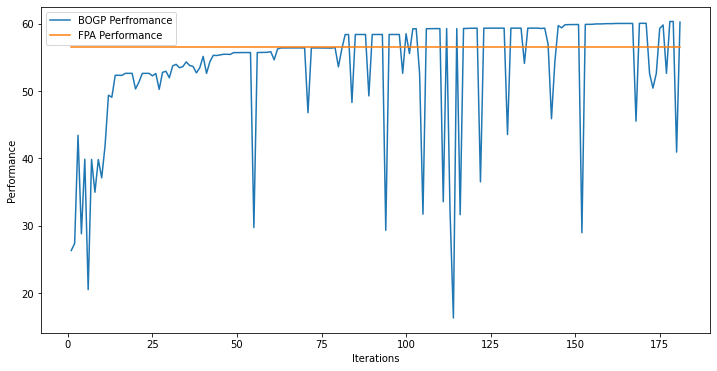

x_next is [ 11.42597813  10.05948438   9.89186362 -25.65280889   5.53126169
  -8.1422578  -16.40110453  14.99865935  27.40980058 -11.59977935
  23.36899897 -13.85279502 -29.90331553   1.25413084  23.60137728
  19.36361172  23.71209915   0.53556185  -3.91092111 -15.47505151]
f()=53.696588, actual=30.696
180


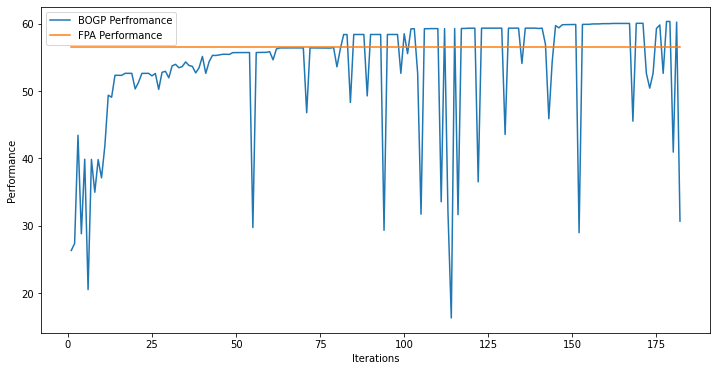

x_next is [ 24.22149631  29.99999999  29.99999994  17.17017522  26.65754226
  26.78751627  29.99999999  29.7736221   29.99999979  18.82338576
 -23.25428684  29.99999998  28.36443263 -30.06493571 -21.8000803
  21.37468739 -28.47667022  30.          23.4852383   25.02495466]
f()=60.418077, actual=60.479
181


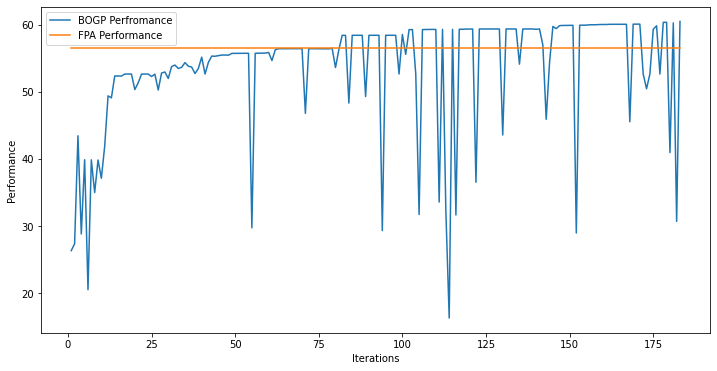

x_next is [ 29.99989862  29.99984674  29.99980286  29.99958527  29.99989705
  29.99990362  29.99980543  29.99994073  29.99988272  29.99988255
 -30.99975586  29.99995985  29.99992447 -30.99981867 -30.99996125
  29.99996448 -30.99991942  29.99995532  29.99998583  29.99992607]
f()=53.606854, actual=52.646
182


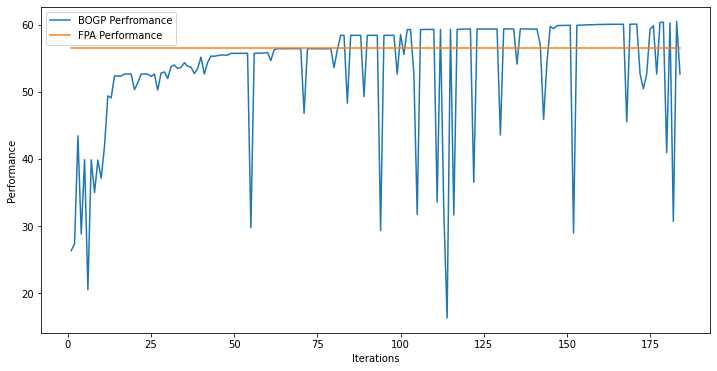

x_next is [ 24.33037177  29.99998659  29.99991916  17.18975613  26.58227184
  26.30382734  29.99999962  28.09924882  29.99983026  18.9253452
 -23.01791392  29.99949052  28.9145214  -30.04705915 -21.83128596
  21.52296266 -28.79696863  29.99998711  23.44126688  25.13942389]
f()=60.553284, actual=60.802
183


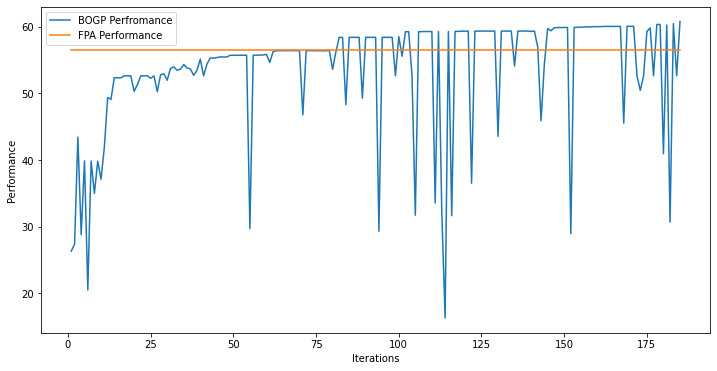

x_next is [ 24.01568014  29.99999991  29.99992728  16.6041055   26.54953476
  25.34552913  29.99999993  24.05220047  29.99998719  19.08702306
 -22.84974254  29.99999983  29.60765224 -30.02137651 -22.00414137
  20.8943235  -28.65293703  29.99999995  23.17660834  24.55438229]
f()=61.064564, actual=60.990
184


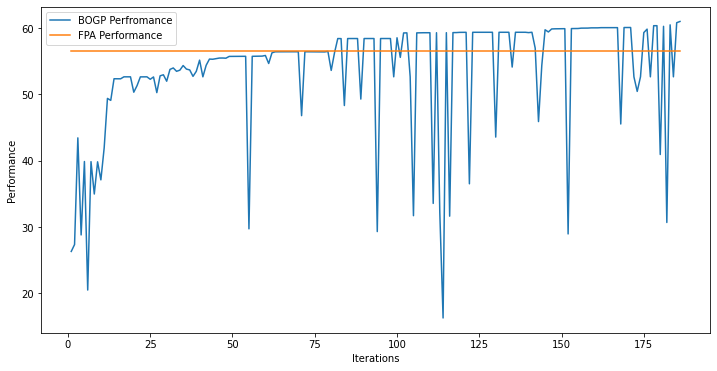

x_next is [ 24.08357276  30.          30.          16.55560171  26.23133208
  25.66985581  30.          24.82605878  29.99999979  18.75280634
 -22.71130044  30.          29.1488875  -29.69913045 -21.51931111
  20.69340215 -28.91601968  30.          23.1158816   24.99922142]
f()=61.034910, actual=61.053
185


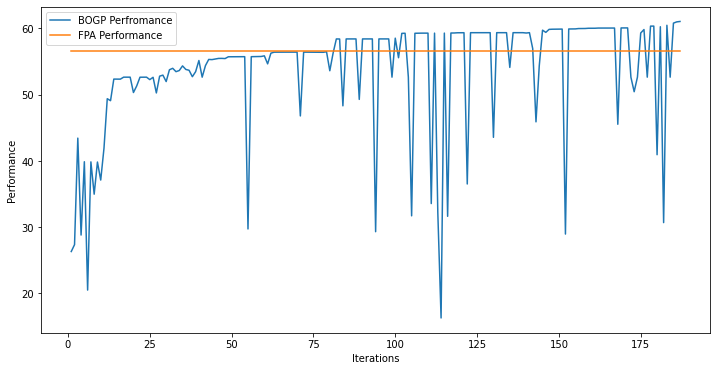

x_next is [ 24.0463536   29.99999975  29.99998881  16.47649298  26.00741184
  25.71189461  29.9999998   24.73780107  29.99993216  18.60900281
 -22.57822803  29.99982362  29.02167429 -29.50676829 -21.17926133
  20.67223351 -29.03589409  29.99999989  23.02893665  25.03661616]
f()=61.059451, actual=61.073
186


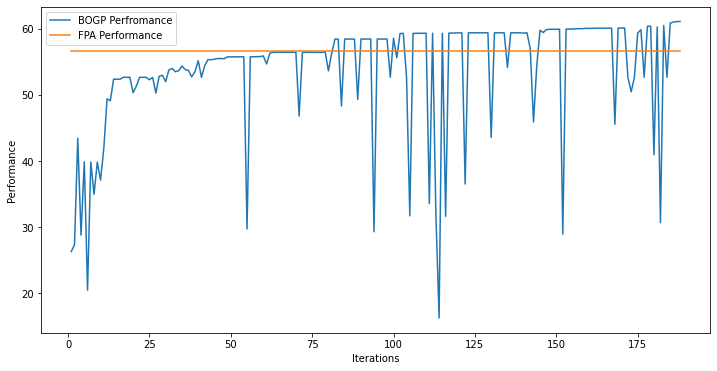

x_next is [ 29.85383312  29.93257002  29.93087026  29.47630004  29.71540345
  29.94322451  29.47125147  29.72921733  29.70741133  29.92791536
 -30.19213909  29.87436255  29.95156214 -30.76307251 -30.9039149
  29.70043932 -30.88559773  29.85659955  29.41442815  29.79192161]
f()=53.758720, actual=52.786
187


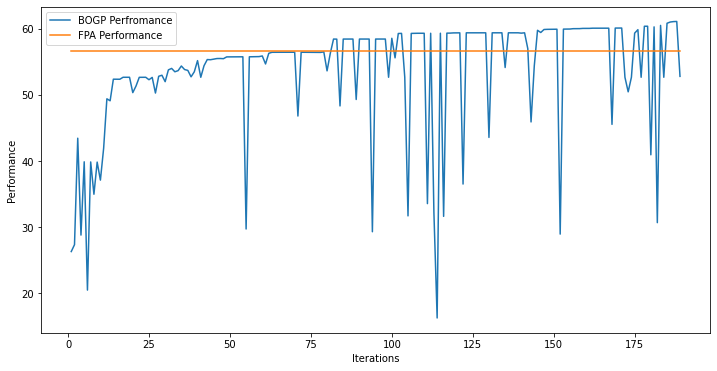

x_next is [ 23.94183808  29.99985635  29.9997418   16.56296734  25.70342398
  25.51390137  29.99996604  24.34426238  29.99957853  18.31646815
 -22.50313007  29.99992827  29.09598928 -29.28068635 -20.63145343
  20.65688689 -29.14055638  29.99987635  23.00234432  24.87353755]
f()=61.083586, actual=61.089
188


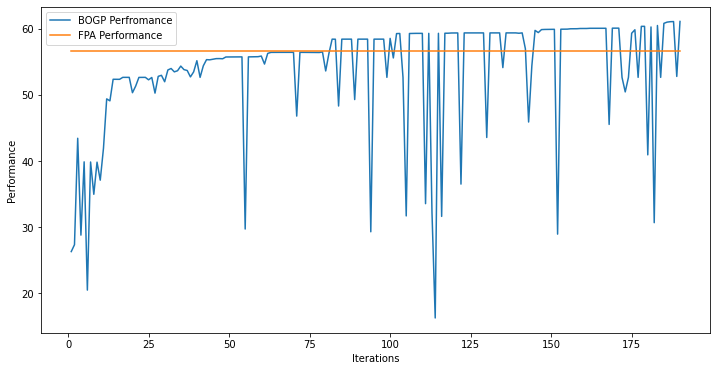

x_next is [ 23.93684734  29.99999994  29.99995358  16.47704167  25.67577472
  25.42155221  29.99999995  24.30242155  29.99999561  18.43892115
 -22.37355364  29.99999982  29.08171429 -29.22290807 -20.45429327
  20.70052151 -29.1392387   29.99999999  22.93258248  24.84011857]
f()=61.090406, actual=61.086
189


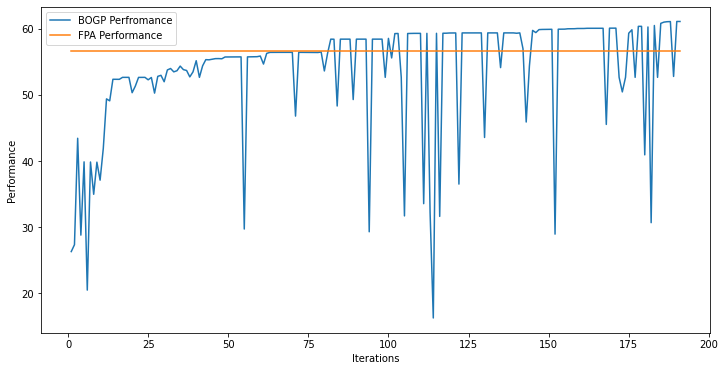

x_next is [ 23.91859497  29.99999984  29.9999992   16.55423927  25.64253823
  25.55390153  29.99999991  24.3253854   29.99988729  18.23149922
 -22.55835073  29.99999985  29.07341607 -29.27083925 -20.65700442
  20.670015   -29.17517958  29.99999997  23.01101454  24.85847278]
f()=61.089101, actual=61.095
190


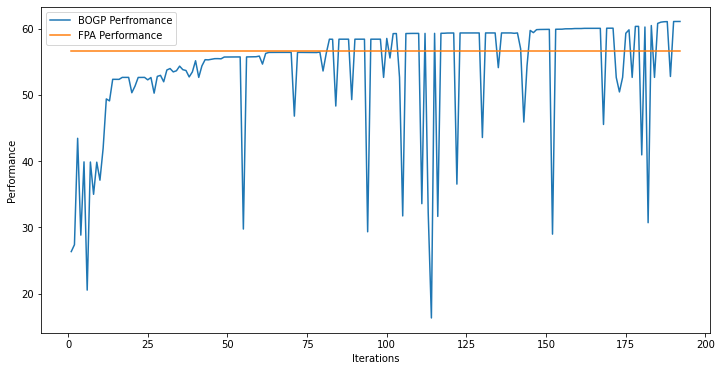

x_next is [ 4.77682000e-06 -1.47525632e-04 -6.77984645e-04 -1.63456741e-03
  7.07251020e-04 -7.27525085e-04  2.73837928e-04  1.12643197e-03
  2.96175177e-04  1.04418012e-03  1.27395021e-03 -1.60161172e-03
 -2.47530122e-04  1.16959555e-05  1.17314091e-03 -1.21029504e-03
  3.41650747e-04  1.60566239e-03  1.21527913e-03  4.20198089e-04]
f()=26.331298, actual=26.332
191


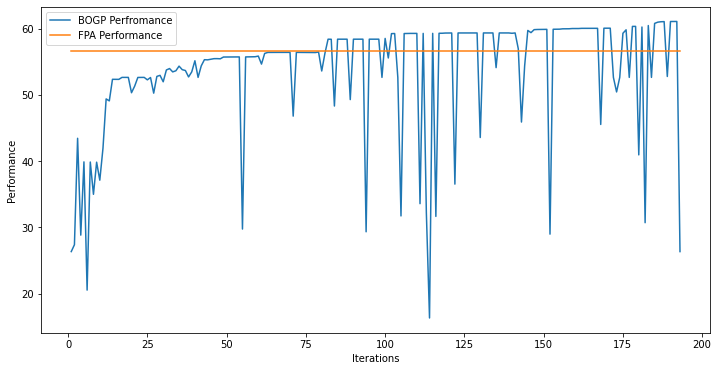

x_next is [ 23.50434838  29.99997022  29.99972161  15.84357285  24.92981882
  25.63933847  29.99999968  23.91516459  29.99999556  17.88382694
 -22.96120737  29.99996955  28.75667547 -29.17448987 -20.9424378
  20.79968666 -29.5362515   29.99999987  22.79997249  24.34214704]
f()=61.136902, actual=61.166
192


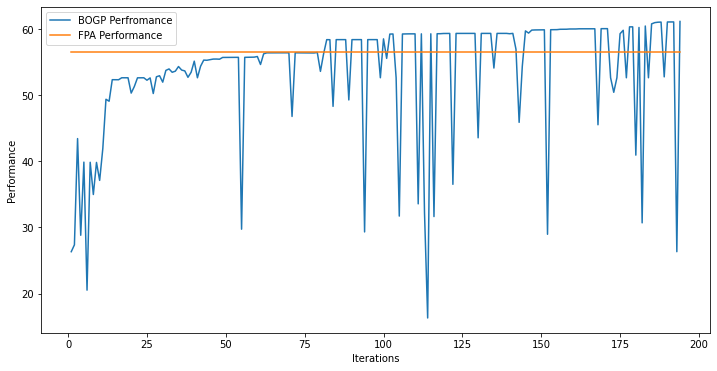

x_next is [ 23.09740674  29.99996532  29.99979945  15.25652239  24.43420518
  25.48885213  29.9999376   23.3097051   29.9999452   17.77698452
 -23.33535524  29.99998609  28.67887365 -29.16693943 -20.90875939
  20.36435475 -29.80942233  29.99993288  22.58334995  23.71519028]
f()=61.185382, actual=61.201
193


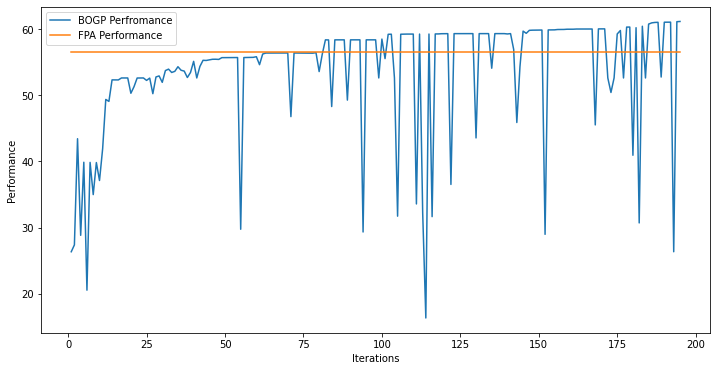

x_next is [ 22.88025649  29.99958672  29.99980213  15.01377093  24.32976286
  25.36688353  29.99973035  23.02334329  29.99993038  17.71743865
 -23.39792504  29.99999939  28.6233763  -29.14107443 -20.87610348
  20.02129702 -29.91608436  29.99999988  22.47531266  23.48742381]
f()=61.205740, actual=61.216
194


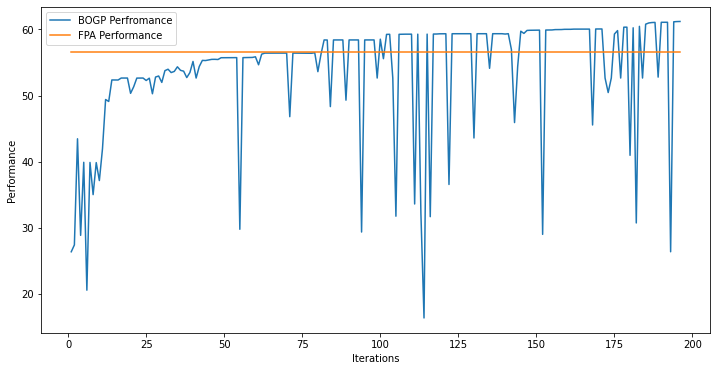

x_next is [ 22.46785844  29.99999994  29.99992995  14.68517375  24.32453017
  25.14010062  29.99999994  22.47265408  29.99999994  17.53323929
 -23.27135769  29.99989967  28.46087631 -29.01686777 -20.83709913
  19.54648774 -30.02814335  29.99999997  22.31382939  23.21362769]
f()=61.227196, actual=61.228
195


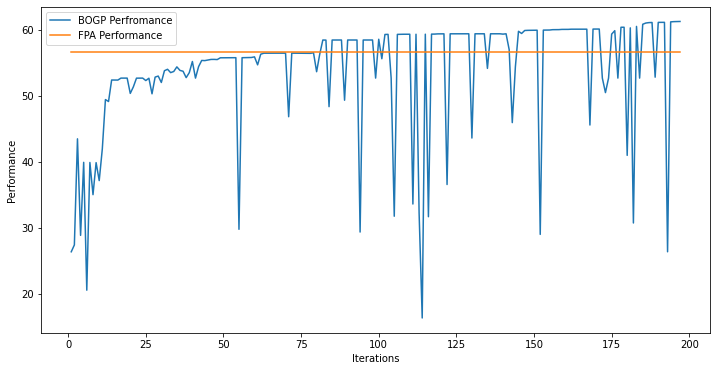

x_next is [ 22.45132768  29.99999995  29.9999999   14.67430601  24.32569149
  25.13359706  29.99999993  22.44671413  29.99993735  17.52264104
 -23.26004844  29.99997669  28.45186932 -29.00859793 -20.83782033
  19.53817068 -30.02870932  29.99999998  22.30892063  23.20426346]
f()=61.227823, actual=61.228
196


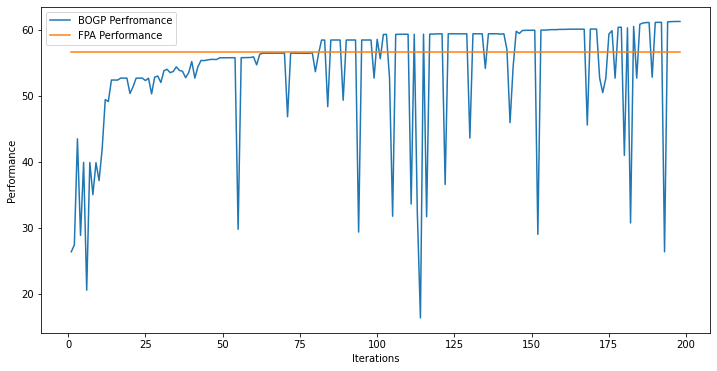

x_next is [ 22.48907459  29.99999989  29.9999812   14.70466867  24.35333298
  25.10401347  29.99999993  22.57292282  29.99999977  17.58721456
 -23.35574999  29.99999989  28.51199428 -29.07734001 -20.78958801
  19.47837204 -30.11189214  29.99999998  22.31053655  23.24415695]
f()=61.228636, actual=61.228
197


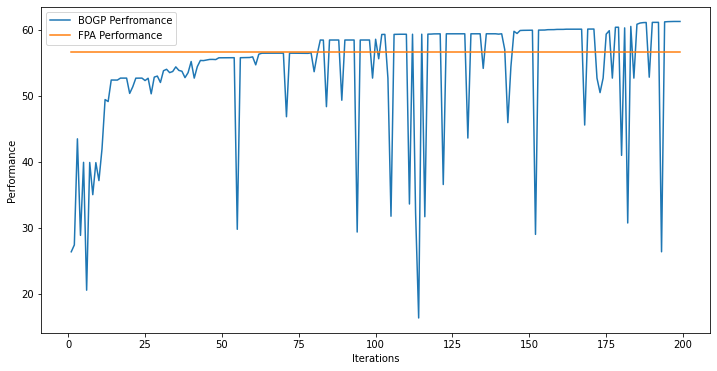

x_next is [ 22.49746909  29.99999995  29.99983549  14.70446167  24.34229363
  25.11854415  29.99999988  22.57135172  29.99985221  17.58411535
 -23.34316357  29.99999981  28.5065689  -29.06828148 -20.80161943
  19.48542545 -30.08118263  29.99999998  22.31281882  23.24190698]
f()=61.228434, actual=61.229
198


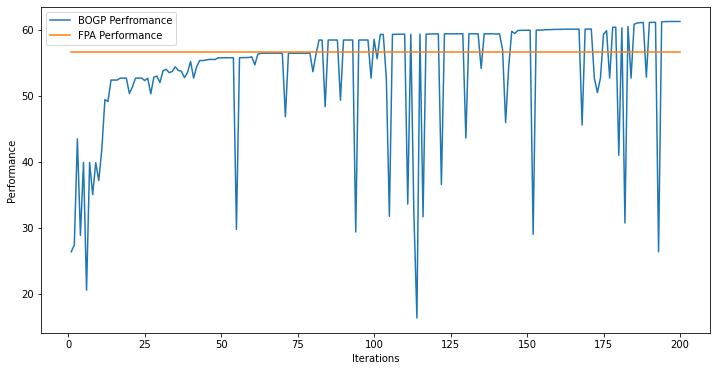

x_next is [ 22.52364978  29.99999996  29.99978558  14.61830661  24.23483416
  25.16295665  29.99999995  22.59345817  29.9999925   17.61353714
 -23.32648378  29.99994085  28.51932775 -29.04626241 -20.80832626
  19.24665183 -29.77765949  29.99999998  22.25929592  23.19929122]
f()=61.232017, actual=61.231
199


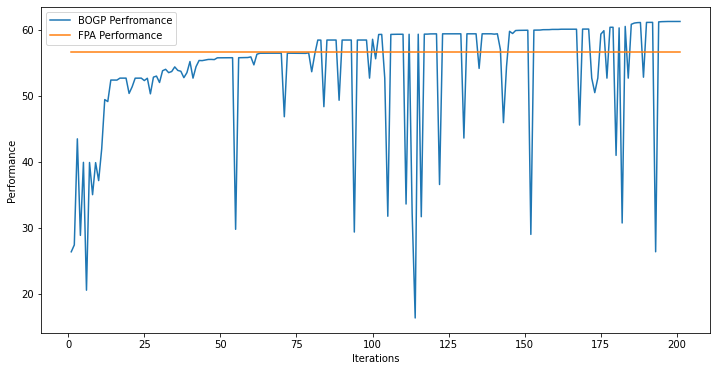

In [15]:
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel

X = 0 * np.ones([1,var], dtype = "float")
y = np.array([[objective_FPA(X[0].reshape((int)(var/number_of_cells), number_of_cells))]])

tr_FPA = objective_FPA(P_max * np.ones([1,var], dtype = "float").reshape((int)(var/number_of_cells), number_of_cells))
y_FPA = np.array([[tr_FPA]])

kernels =  ConstantKernel(constant_value=200, constant_value_bounds = (1e-20, 1e20)) * Matern(length_scale=1, length_scale_bounds=(1e-20,1e20), nu=1.5) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-20, 1e20)) 
model = GaussianProcessRegressor(kernel = kernels, n_restarts_optimizer=30)

model.fit(X, y)

for i in range(200):
  x_next = opt_acquisition(X, y, model, X.shape[0]+1)

  np.save("/content/drive/MyDrive/trainingx_BOGP_5.npy",X)
  np.save("/content/drive/MyDrive/trainingy_BOGP_5.npy",y)
  np.save("/content/drive/MyDrive/grad_trainingyFPA_BOGP_5.npy",y_FPA)
  
  tr = 0
  for l in range(1):
    tr = tr + objective_FPA(x_next.reshape((int)(var/number_of_cells), number_of_cells))
  tr = tr/1.0  
  actual = tr

  tr_FPA = objective_FPA(P_max * np.ones([1,var], dtype = "float").reshape((int)(var/number_of_cells), number_of_cells))
  
  est, _ = surrogate(model, [x_next])
  print("x_next is", x_next)
  print('f()=%3f, actual=%.3f' % (est, actual))
  
  X = vstack((X, [x_next]))
  y = vstack((y, [[actual]]))
  y_FPA = vstack((y_FPA, [[tr_FPA]]))
  
  model.fit(X, y)
  
  print(i)
  pyplot.figure(figsize = (12, 6))

  pyplot.xlabel("Iterations")
  pyplot.ylabel("Performance")
  pyplot.plot(np.arange(1,X.shape[0]+1),y[:])
  pyplot.plot(np.arange(1,X.shape[0]+1), y_FPA[:])
  pyplot.legend(["BOGP Perfromance","FPA Performance"])
  pyplot.show()


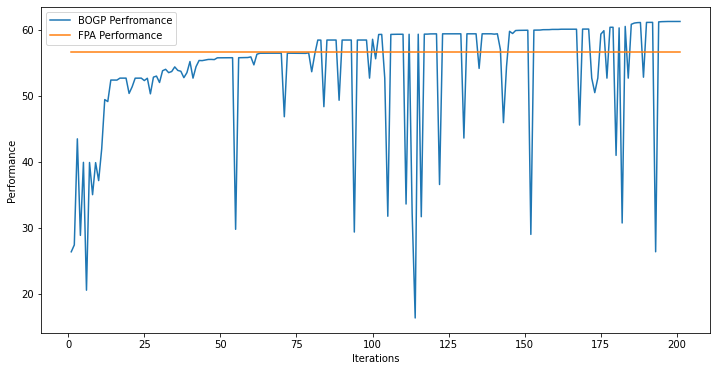

P_max = 30.000, Optimal_SE = 61.231
P_max = 30.000, Optimal_SE_FPA = 56.571


In [16]:
pyplot.figure(figsize = (12, 6))   
pyplot.xlabel("Iterations")
pyplot.ylabel("Performance")
pyplot.plot(np.arange(1,X.shape[0]+1),y[:])
pyplot.plot(np.arange(1,X.shape[0]+1), y_FPA[:])
pyplot.legend(["BOGP Perfromance","FPA Performance"])
pyplot.show() 
ix = 0
ix = argmax(y)
print('P_max = %.3f, Optimal_SE = %.3f' % (P_max, y[ix]))

ix_FPA=0
ix_FPA=argmax(y_FPA)
print('P_max = %.3f, Optimal_SE_FPA = %.3f' % (P_max, y_FPA[ix_FPA]))

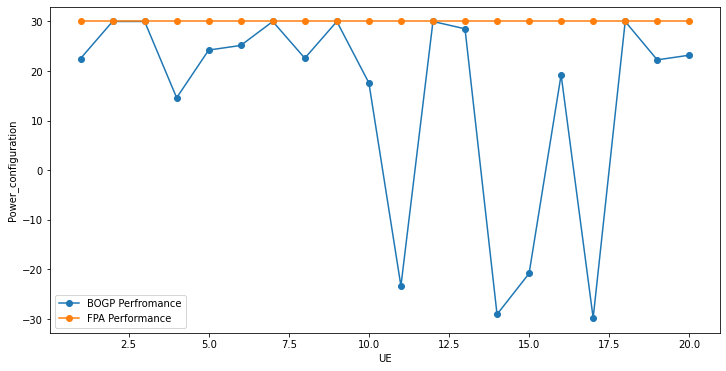

Power_configuration_BOGP is [ 22.52364978  29.99999996  29.99978558  14.61830661  24.23483416
  25.16295665  29.99999995  22.59345817  29.9999925   17.61353714
 -23.32648378  29.99994085  28.51932775 -29.04626241 -20.80832626
  19.24665183 -29.77765949  29.99999998  22.25929592  23.19929122]


In [17]:
X_FPA = P_max * np.ones([1,var], dtype = "float").reshape((int)(20), 1)
pyplot.figure(figsize = (12, 6))   
pyplot.xlabel("UE")
pyplot.ylabel("Power_configuration")
pyplot.plot(np.arange(1,21),X[ix][:], '-o')
pyplot.plot(np.arange(1,21),X_FPA[:], '-o')
pyplot.legend(["BOGP Perfromance","FPA Performance"])
pyplot.show()
print("Power_configuration_BOGP is", X[ix])

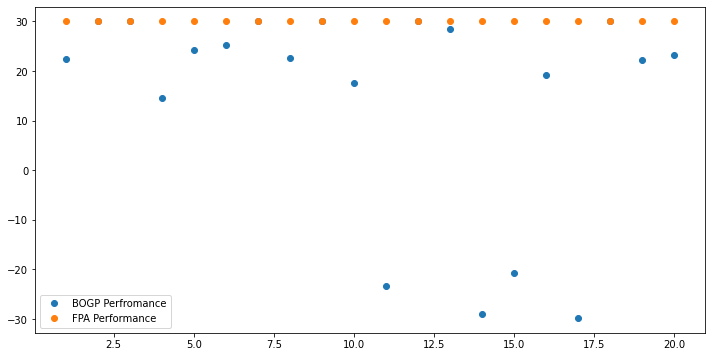

Power_configuration_BOGP is [ 22.52364978  29.99999996  29.99978558  14.61830661  24.23483416
  25.16295665  29.99999995  22.59345817  29.9999925   17.61353714
 -23.32648378  29.99994085  28.51932775 -29.04626241 -20.80832626
  19.24665183 -29.77765949  29.99999998  22.25929592  23.19929122]


In [18]:
import matplotlib.pyplot as plt
X_FPA=np.linspace(P_max,P_max,20)
plt.figure(figsize = (12, 6)) 
plt.plot(np.arange(1,21),X[ix][:], 'o')
plt.plot(np.arange(1,21),X_FPA[:], 'o')
plt.legend(["BOGP Perfromance","FPA Performance"])
plt.show()
print("Power_configuration_BOGP is", X[ix])